Time series forecasting methods include >>
simple exponential smoothing, 
Holt-Winters exponential smoothing, and 
autoregressive integrated moving average (ARIMA) models.
Regression
LSTM

clean the data - null /group if needed for duplicate
data stationary - transform  data by taking differences or logarithms
Data Smoothing - Simple moving average (SMA)/Weighted moving average (WMA)/Exponential smoothing
Explore the data - trends, seasonality and patterns, ACF(MA),PACF(AR)
Select a forecasting method - Statistical(SARIMA), Regression(Linear relation), LSTM
Forecast horizon: The forecast horizon is the number of periods ahead

Imp Steps>>
select/convert date field - pd.to_datetime(data['period_end'])
set date as index - data.set_index('period_end', drop = True, inplace = True)
select relevant column - data = data['followers_total']
set the frequency of index if required - data = data.asfreq('M')
check data index after all changes - data.index

In [1]:
x = 1
if x:
    print('yes')

yes


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1899-12-31 -> 2023-06-30)')



<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       0 non-null      float64
 1   High       0 non-null      float64
 2   Low        0 non-null      float64
 3   Close      0 non-null      float64
 4   Adj Close  0 non-null      float64
 5   Volume     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0+ bytes


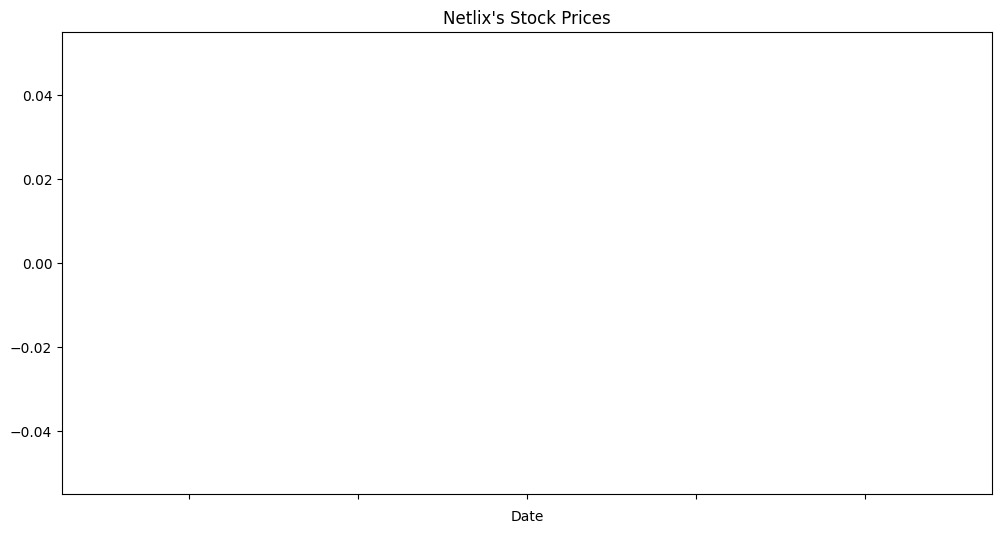

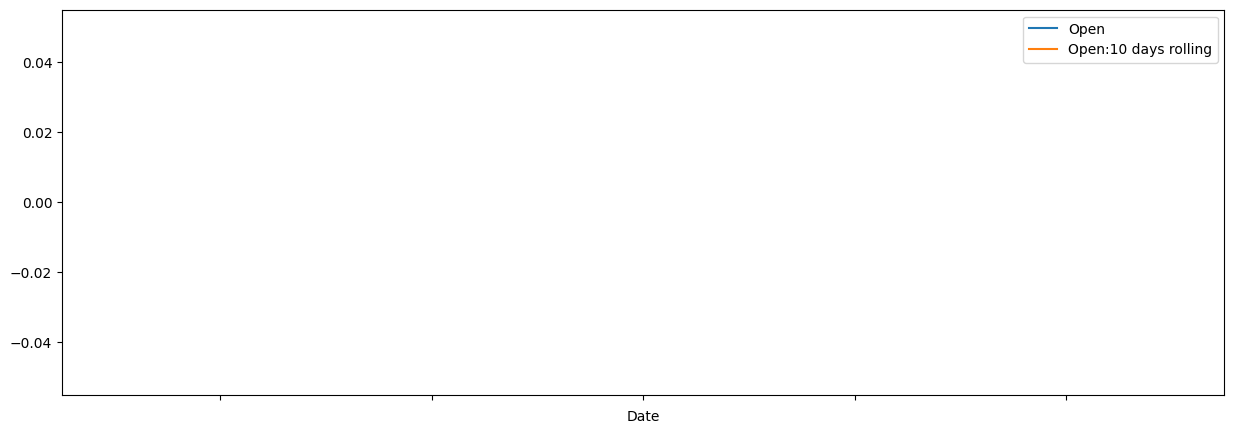

KeyError: "['Open:10'] not in index"

In [1]:
#Working with yfinance in Python
#https://www.analyticsvidhya.com/blog/2023/06/time-series-analysis-of-netflix-stocks-with-pandas/

#!pip install yfinance

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

df =  yf.download(tickers = "NFLX")
df
    
# print the metadata of the dataset
df.info()

# data description
df.describe()

#Visualizing the Time Series data
df['Open'].plot(figsize=(12,6),c='g')
plt.title("Netlix's Stock Prices")
plt.show()

#1.1 Forward Shifting(Positive Lag)
df.shift(1)

#1.2 Backward Shifting(Negative Lag)
df.shift(-1)

#2. Rolling Windows
df['Open:10 days rolling'] = df['Open'].rolling(10).mean()
df[['Open','Open:10 days rolling']].head(20)
df[['Open','Open:10 days rolling']].plot(figsize=(15,5))
plt.show()

df['Open:20'] = df['Open'].rolling(window=20,min_periods=1).mean()
df['Open:50'] = df['Open'].rolling(window=50,min_periods=1).mean()
df['Open:100'] = df['Open'].rolling(window=100,min_periods=1).mean()

#visualization
df[['Open','Open:10','Open:20','Open:50','Open:100']].plot(xlim=['2015-01-01','2024-01-01'])
plt.show()

#3. Time Resampling

#year end frequency
df.resample(rule='A').max()

df['Adj Close'].resample(rule='3Y').mean().plot(kind='bar',figsize=(10,4))
plt.title('3 Year End Mean Adj Close Price for Netflix')
plt.show()



In [1]:
# updated on Feb03,2023 / added TimeSeries

import nbimporter

from Common_Functions_L import *

from PP_Pipeline_Functions_L import *
%store -r feature_create_dict
%store -r pp_dict
%store -r model
%store -r params
%store -r feature_drop_dict
%store -r feature_discretisation_dict
%store -r feature_transformer_dict
%store -r feature_outlier_dict
%store -r feature_lagfreqwindow_dict
%store -r feature_datetime_dict
%store -r feature_datetime_list
%store -r feature_lagfreqwindow_list
%store -r feature_selection_dict
%store -r imputer_dict
%store -r imputaion_data_type_dict
%store -r encoder_dict
%store -r simple_encoder_dict
%store -r scaler_dict
%store -r sample_type_dict
%store -r reduction_type_dict

%store -r DropDupRows_fs
%store -r DropNullRows_fs
%store -r DropDupRows_ft
%store -r DropNullRows_ft

%store -r GroupFeatures_ft
%store -r GroupFeatures_fs

%store -r text_features_ft
%store -r text_features_fs

%store -r text_pp_steps_list
%store -r text_pp_steps_dict
%store -r text_feat_list
%store -r text_feat_options_list
%store -r text_feat_dict

%store -r SparseDropDupRows_ft
%store -r SparseDropDupCols_ft
%store -r SparseDropDupRows_fs
%store -r SparseDropDupCols_fs

%store -r data_pp_steps_list
%store -r data_pp_steps_dict
%store -r data_pp_steps_dict_dflt_list
%store -r data_pp_steps_dict_cust_list

ts_pp_steps_dict = {}

from Models_Functions_L import *
%store -r ensemble_sdictR
%store -r models_fname_listR
%store -r models_sname_listR
%store -r models_fdictR
%store -r models_sdictR
%store -r params_pipeline_fdictR
%store -r params_pipeline_sdictR

%store -r ensemble_sdictC
%store -r models_fname_listC
%store -r models_sname_listC
%store -r models_fdictC
%store -r models_sdictC
%store -r params_pipeline_fdictC
%store -r params_pipeline_sdictC

%store -r tt_cv_pt_dict

%store -r ts_models_dict

from NN_Functions_L import *
%store -r keras_metrics_flistR
%store -r keras_metrics_slistR
%store -r keras_metrics_flistC
%store -r keras_metrics_slistC
%store -r contractions_dict

from TimeSeries_Functions_L import *
%store -r ts_data_pp_steps_list
%store -r ts_data_pp_steps_dict

from NLP_Functions_L import *
#%store  -r text_clean_chk_list
%store -r text_cleaning_list
%store -r text_cleaning_dict
%store -r text_extract_feat_list
%store -r text_extract_feat_dict

#display pipeline diagram
from sklearn import set_config
set_config(display="diagram")

#import common ib
from scipy import sparse
import numpy as np
import pandas as pd

'''
from sktime.classification.deep_learning.cnn import CNNClassifier
from sktime.classification.deep_learning.fcn import FCNClassifier
from sktime.classification.deep_learning.lstmfcn import LSTMFCNClassifier

TBV
https://github.com/sktime/sktime/blob/main/sktime/forecasting/base/_base.py

#dataset
#https://www.timeseriesclassification.com/dataset.php
'''



no stored variable or alias text_features_ft
no stored variable or alias text_features_fs
no stored variable or alias ts_data_pp_steps_list
no stored variable or alias ts_data_pp_steps_dict


C:\Users\ajverma\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


'\nfrom sktime.classification.deep_learning.cnn import CNNClassifier\nfrom sktime.classification.deep_learning.fcn import FCNClassifier\nfrom sktime.classification.deep_learning.lstmfcn import LSTMFCNClassifier\n\nTBV\nhttps://github.com/sktime/sktime/blob/main/sktime/forecasting/base/_base.py\n\n#dataset\n#https://www.timeseriesclassification.com/dataset.php\n'

In [3]:
#v1.4 testing ts_forecast_models with ForecastingPipeline /Apr10,2023

def create_ts_pipeline(data, pp_steps_dict, pp_steps_list):
    '''
    1.2 Apr05,2023 : updated for
    1.1 Jan29,2023 added index chk,multi index
    1.0 Jan23,2023 initial ver
    
    TBA
    TransformedTargetForecaster-takes a chain of transformers and forecasters
    MultiplexForecaster
    TSFreshFeatureExtractor
    WindowSummarizer: mean/stdev/n_legs features
    DateTimeFeatures: date features
    
    TBC
    diff between TransformedTargetForecaster and ForecastingPipeline
    
    Ref
    https://towardsdatascience.com/why-start-using-sktime-for-forecasting-8d6881c0a518
    '''
    
    from sktime.forecasting.compose import ForecastingPipeline
    from sktime.transformations.series.outlier_detection import HampelFilter
    from sktime.transformations.series.boxcox import LogTransformer, BoxCoxTransformer
    from sktime.transformations.series.adapt import TabularToSeriesAdaptor
    from sktime.transformations.series.impute import Imputer
    from sklearn.preprocessing import MinMaxScaler
    from sktime.forecasting.theta import ThetaForecaster
    from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor
    
    print('Entry create_ts_pipeline')
    #mandetory check
    if len(df1.index.levels) >=3:
        ts_type = 'HierarchicalIndex_TS'
    elif len(df1.index.levels) ==3:
        pass
    elif len(df1.index.levels) ==2:
        pass
    elif len(df1.index.levels) ==1:
        pass
    
    if ts_type == 'HierarchicalIndex_TS':
        from sktime.transformations.hierarchical.aggregate import Aggregator
        aggregator = Aggregator()
    else:
        aggregator = 'passthrough'
        
    
    if pp_steps_dict:
        #2.1 ImputerCat/ImputerNum
        if 'Outlier' in pp_steps_dict:
            if pp_steps_dict['Outlier'] == 'HampelFilter':
                outlier = HampelFilter()
            else:
                pass
        else:
            outlier = 'passthrough'
            
        
        if 'Transformer' in pp_steps_dict:
            if pp_steps_dict['Transformer'] == 'LogTransformer':
                transformer = LogTransformer()
            elif pp_steps_dict['Transformer'] == 'BoxCoxTransformer':
                transformer = BoxCoxTransformer(sp=4)
            else:
                transformer = 'passthrough'
    
    #5 optional pp_steps_list
    print('\n ##5 pp_steps_list: setup flags MatchFeat, DropNullRows, DropDupRows, DropDupCols, DropQuasiConstCols')
    if pp_steps_list:
        if 'FeatureExtraction' in pp_steps_list:
            from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
            FeatureExtraction1 = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
            #FeatureExtraction2 = RandomIntervalFeatureExtractor(n_intervals="sqrt", features=[np.mean, np.std, _slope]),
        else:
            FeatureExtraction = 'passthrough'
            
            
            
    pipeline = ForecastingPipeline(
    [
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ('aggregator', aggregator), # for Hierarchical TS
    ("outlier", outlier),
    ("transformer", transformer),
    ("model", ThetaForecaster(sp=4)) #defaut otherwise error
    ])
    
    print('Exit create_ts_pipeline')
    return pipeline


def tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline, index_cols_list=[],
        nested_params=None, train_type='TrainTest', forecast_type = 'regression',
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type=None, 
        aggregation_transformer=True, PlotSeries=False):
    '''
    
    v1.6 Apr10,2023: Added model types and model list
    v1.5 Mar24,2023: Added MutliIndex Creation
    v1.4 Mar15,2023: Added forecast_type
    v1.3 Jan26,2023: Updated for new model_type/ added probabilistic predictions support
    v1.2 Jan23,2023: Updated for pipeline
    v1.1 Jan20,2023: added regression_window, cv_type, pt_type, forecasting score/CrossValidation
    v1.0 Jan18,2023: initial version
    
    Note: Important
    index type(uni/multi-panel/Hier) / y-target (uni/multi variate) / X-feat (with/without features)
    
    forecast_type: regression/binary_classification/multi_classification
    freq: M/Q/Y
    
    pipeline:if pipeline true then model_type (model) will update in pipeline that will be fitted else model_type will be fitted
    train_type: TrainTest/CrossValidation/GridSearch/RandomizedSearch
    freq: used to set index whern data is as df with date col
    regression_window: when regression models are used
    cv_type: used in cross_validation/GridSerach - ExpandingWindowSplitter/SlidingWindowSplitter
    pt_type: used in parameter tuning - ForecastingGridSearch/ForecastingRandomizedSearch
    PlotSeries: does not support for MultiIndex & Cross Validation
    aggregation_transformer : for multi index
    
    On Memory testing dataset:
    from sktime.datasets import load_airline
    series_PeriodIndex_UV = load_airline()

    from sktime.datatypes import get_examples
    array_1D = get_examples(mtype="np.ndarray", as_scitype="Series")[0]
    array_2D = get_examples(mtype="np.ndarray", as_scitype="Series")[1]
    array_3D = get_examples(mtype="numpy3D", as_scitype="Panel")[0]
    
    series_NormalIndex_UV = get_examples(mtype="pd.Series", as_scitype="Series")[0]
    
    df_UniIndex_UV = get_examples(mtype="pd.DataFrame")[0] #ok
    df_UniIndex_MV = get_examples(mtype="pd.DataFrame")[1]
    
    df_MultiIndex_MV = get_examples(mtype="pd-multiindex")[0]
    df_MultiIndexHier_MV = get_examples(mtype="pd_multiindex_hier")[0]
    df_MultiIndexHier_UV = get_examples(mtype="pd_multiindex_hier")[1]
    
    from sktime.utils._testing.hierarchical import _make_hierarchical
    #Multi Variate dynamic
    df_MultiIndexHier_MV_FeatDynamic = _make_hierarchical(n_columns=2) #ok
    
    from sktime.utils._testing.hierarchical import _bottom_hier_datagen
    #Multi index level Dynamic
    df_MultiIndexHier_UV_IndexDynamic = _bottom_hier_datagen(no_levels=2)
    
    
    
    Known issues:
    Auto_Arima with cross_validation TypeError
    TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'float'>
    transformer_type : fails for MultiIndex
    TBA:
    MultiOutputRegressor
    '''
    print('entry tt_cv_pt_models_ts')
    
    #import libs
    import pandas as pd
    import numpy as np
    from sktime.forecasting.base import ForecastingHorizon
    from sktime.utils.plotting import plot_series
    from sktime.forecasting.compose import make_reduction
    from sktime.forecasting.model_selection import temporal_train_test_split
    
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import accuracy_score
        
    print('\n ##1 index set single/multi/hierarchical')
    print(f'data-typ:{type(data)}, data-shape:{data.shape}')
    if len(index_cols_list) ==1: # single level index
        print('executing single index')
        if isinstance(data, pd.DataFrame):
            if freq:
                #Note1: convert partial str date(yyyy-mm or yy-q) to complete date format(yyyy-mm-dd)
                data[index_col] = pd.PeriodIndex(data[index_col], freq=freq).to_timestamp()
                #Note2: convert complete date format(yyyy-mm-dd) to date index w.r.t freq (yyyyqq)
                data = data.set_index(index_col, drop=True).to_period(freq) #set index of 
            else:
                data.set_index(index_col, drop=True, inplace=True) # convert to series
    else: # multi level index for series/df
        print('executing MultiLeval index')
        #data = set_index(data, index_cols_list) #set hierarchical index/multi_index
        index = pd.MultiIndex.from_frame(data[index_cols_list])
        data.set_index(index, drop=True, inplace=True)
        data.drop(index_cols_list, axis=1, inplace=True)
          
    print('#1.1 index_type check PeriodIndex/RangeIndex/MultiIndex')
    #Note: pandas index types: Int64Index, RangeIndex, DatetimeIndex, PeriodIndex;
    #Note: if DatetimeIndex, the freq attribute must be set.
    
    import pandas
    if isinstance(data.index, pandas.core.indexes.period.PeriodIndex):
        index_type = 'PeriodIndex'
    elif isinstance(data.index, pandas.core.indexes.range.RangeIndex):
        index_type = 'RangeIndex'
    elif isinstance(data.index, pandas.core.indexes.multi.MultiIndex):
        index_type = 'MultiIndex'
        #check index level eg. no of features in index
        if len(data.index.levels)==1:
            index_type = 'MultiIndex'
        elif len(data.index.levels)==2:
            index_type = 'MultiIndexPanel'
        elif len(data.index.levels)>=3:
            index_type = 'MultiIndexHier'
            
        #note: pd_multiindex_hier format to store node-wise aggregates.add __total @ each node
        if aggregation_transformer:
            from sktime.transformations.hierarchical.aggregate import Aggregator
            data = Aggregator().fit_transform(data)
            
    elif isinstance(data.index, pandas.core.indexes.base.Index): #TBC
        index_type = 'NormalIndex'
    print('index_type:', index_type)
        
    print('#1.2 ts_type check UniVariate vs MultiVariate')
    if isinstance(target_col, str):
        ts_type = 'UniVariate'
    elif isinstance(data, pd.Series):
        ts_type = 'UniVariate'
    elif isinstance(target_col, list):
        if len(target_col) == 1:
            ts_type = 'UniVariate'
        elif len(target_col) > 1:
            ts_type = 'MultiVariate'
    
    print('ts_type:', ts_type)
        
        
    print('\n ##2 data chk, split train/valid, chk UniVariate/MultiVariate:', type(data))
    if isinstance(data, pd.DataFrame):
        all_feat_list = data.columns.tolist()
        sel_feat_list = feat_list #passed thr function
        print(f'all_feat_list:{all_feat_list}, sel_feat_list:{sel_feat_list}')
        
        #if len(sel_feat_list) > 1: # when external feat_list passed
        if (len(all_feat_list) > 1) or (len(sel_feat_list) > 1):
            print('executing: if len(sel_feat_list) > 1')
            X = data[sel_feat_list]
            
            #note: bug fix for MultiIndex, Univariate target y with input features X, y should in df/Mar24,2023
            if ('Multi' in index_type) & (ts_type == 'UniVariate'):
                y = data[[target_col]] #MultiIndex fails if y is series
            else:
                y = data[target_col] 
                
            y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=0.2) 
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, X_train:{X_train.shape}, X_valid:{X_valid.shape}')
        
        elif (len(all_feat_list) == 1) or (len(sel_feat_list) == 1):
            print('executing: (len(all_feat_list) == 1) or (len(sel_feat_list) == 1)')
            X = None
            y = data
            y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
            
        else:
            print('executing else for train/test')
            X = None
            y = data[target_col]
            y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
            print(f'df-srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
            
    elif isinstance(data, pd.Series):
        X = None
        y = data
        y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
        print(f'srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
       
    print('\n ##3 set target transformer') #Not needed if pipeline is passed
    if transformer_type:
        if ('Multi' not in index_type):
            #Series transformers:DTrend, Adapt, box-cox, AutoCorrelation, Cosine
            if transformer_type == 'BoxCoxTransformer':
                from sktime.transformations.series.boxcox import BoxCoxTransformer
                transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
            elif transformer_type == 'LogTransformer':
                from sktime.transformations.series.boxcox import LogTransformer
                transformer = LogTransformer()
        elif index_type == 'MultiIndexPanel':
            pass
            #Panel transformers:Shapelet, Segment, Reduce, Rocket, PCA, Matrix profile, Compose, Summarize, tsfresh
    y_train = transformer.fit_transform(y_train)
        
    print('\n ##4 create score dict')
    score_dict = {}
    score_dict['ts_type'] = ts_type
    score_dict['model_type'] = model_type
    score_dict['index_type'] = index_type
    score_dict['forecast_type'] = forecast_type
    
    print('\n ##5 get ForecastingHorizon w.r.t y_valid:', len(y_valid))
    #fh_abs = ForecastingHorizon(y_valid.index, is_relative=False)
    #print('fh_abs:',fh_abs) # y_valid index
    
    #note: fh_re list should same size of y_valid so pred/y_valid will be same size/calculate score
    #note: Multi index split will have record from each first index, chk split y_train/y_valid/y/pred to undersatnd
    #eg.  df_MultiIndex_MV: if from first level index of 4 window will be 4 records but actual will be 1 record from each window to predict
    if 'Multi' in index_type:
        fh_re = [1] #quick fix/TBC
    else:
        fh_re = [a for a in range(1, len(y_valid)+1)]
    
    print(f'y_valid-len:{len(y_valid)}, fh_re-len:{len(fh_re)}, fh_re:{fh_re}')
    
    print(f'\n ##6 executing model:{model_type},  forecast_type:{forecast_type}')
    if forecast_type == 'regression':
        if model_type == 'NaiveForecaster':
            #Forecast based on naive assumptions about past trends continuing, supports univariate/multivariate
            from sktime.forecasting.naive import NaiveForecaster, NaiveVariance
            forecaster = NaiveForecaster()

            #NaiveVariance adds to a `forecaster` the ability to compute the prediction variance based on naive assumptions about ts.
            #forecaster = NaiveForecaster(strategy="drift")
            #forecaster = NaiveVariance(forecaster)
        elif model_type == 'PolynomialTrend':
            #linear regression model with a 1st degree polynomial transformation of the feature.
            from sktime.forecasting.trend import PolynomialTrendForecaster
            forecaster = PolynomialTrendForecaster(degree=1)
        elif model_type == 'ThetaForecaster':
            #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
            from sktime.forecasting.theta import ThetaForecaster
            forecaster = ThetaForecaster(sp=12)

        elif model_type == 'ExponentialSmoothing':
            from sktime.forecasting.exp_smoothing import ExponentialSmoothing
            forecaster = ExponentialSmoothing(trend="add", sp=12)
            
        elif model_type == 'BATS':
            from sktime.forecasting.bats import BATS
            forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
        elif model_type == 'TBATS':
            from sktime.forecasting.tbats import TBATS
            forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
        elif model_type == 'Prophet':
            from sktime.forecasting.fbprophet import Prophet
            forecaster = Prophet(
                seasonality_mode="multiplicative",
                n_changepoints=int(len(y_train) / 12),
                add_country_holidays={"country_name": "Germany"},
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                ) 
        elif model_type == 'UnobservedComponents':
            from sktime.forecasting.structural import UnobservedComponents
            forecaster = UnobservedComponents(
                level="local linear trend", freq_seasonal=[{"period": 12, "harmonics": 10}])
        elif model_type == 'StatsForecastAutoARIMA':
            from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
            forecaster = StatsForecastAutoARIMA(sp=12)
            
        elif model_type == 'AutoArima':
            #univariate only / TBC
            from sktime.forecasting.arima import AutoARIMA
            forecaster = AutoARIMA(sp=4)
        #elif (model_type == 'Arima') & (ts_type = 'UniVariate'):
        elif model_type == 'Arima':
            #univariate only
            from sktime.forecasting.arima import ARIMA
            forecaster = ARIMA()
        elif (model_type == 'VAR') & (ts_type == 'MultiVariate'):
            #MultiVariate only
            from sktime.forecasting.var import VAR
            forecaster = VAR()
        elif model_type == 'AutoETS':
            from sktime.forecasting.ets import AutoETS
            forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
            
        
    
        else:
            print(f'#executing Regression:{model_type}')
            if regression_window:
                '''
                strategy=
                Direct:create a separate model for each period we are forecasting.
                Recursive:fit a single one-step ahead model,previous time step’s output for the following input
                Multiple outputs: one model is used to predict the entire time series horizon in a single forecast.
                '''
                forecaster = make_reduction(model_type, strategy="recursive", window_length= regression_window)
                #forecaster = ReducedRegressionForecaster(regressor, window_length=12)

    elif forecast_type in ['binary_classification', 'multi_classification']:   
        if model_type == 'TimeSeriesForestClassifier': 
            #from sktime.classification.compose import TimeSeriesForestClassifier
            from sktime.classification.interval_based import TimeSeriesForestClassifier
            forecaster = TimeSeriesForestClassifier()
        elif model_type == 'HIVECOTEV2': #TBC
            from sktime.classification.hybrid import HIVECOTEV2
            forecaster = HIVECOTEV2()
            #forecaster.fit(X_sk, pd.Series(y))
        elif model_type == 'RandomIntervalSpectralForest': #TBC
            pass
        elif model_type == 'IndividualBOSS': #TBC
            from sktime.classification.dictionary_based import IndividualBOSS
            forecaster = IndividualBOSS()
        elif model_type == 'BaggingForecaster': #TBC
            from sktime.forecasting.compose import BaggingForecaster
            forecaster = BaggingForecaster()
        
   
    
    print('Executing pipeline:', pipeline)
    #cls = make_pipeline(TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier())
    if pipeline:
        print('\n ##7 add model last step of pipeline')    
        model_name = forecaster.__class__.__name__

        if pipeline.steps[-1][0] == 'model':
            pipeline.steps.pop(-1)
            pipeline.steps.append(('model', forecaster))
        else:
            pipeline.steps.append(('model', forecaster))
            
        from copy import deepcopy
        forecaster = deepcopy(pipeline)
    print('forecaster:', forecaster)
    
    print('\n ##8 setup cv w.r.t cv_type:', cv_type)
    from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter
    from sktime.forecasting.model_selection import SingleWindowSplitter
    
    ##X_train = None if ts_type == 'UniVariate' else X_train # multivarite X_train will be used
    
    window_size = round(y_train.size/4) #TBC
    if cv_type == 'ExpandingWindowSplitter':
         #note: initial_window + fh shold be smaller than the length of y
        cv = ExpandingWindowSplitter(step_length=window_size, fh=list(range(1, window_size)), initial_window=window_size)
    elif cv_type == 'SlidingWindowSplitter':
        #note: initial_window must greater than `window_length`
        cv = SlidingWindowSplitter(initial_window=window_size*2, window_length=window_size)
    elif cv_type == 'SingleWindowSplitter':
        #note: initial_window must greater than `window_length`
        #validation_size = 26
        validation_size = y_train.size
        cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)
        
        
    print('\n ##9 forecaster fit and predict w.r.t train_type:', train_type, ts_type)
    print(f'shape y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    print(f'type y_train:{type(y_train)}, y_valid:{type(y_valid)}')
    print(f'len y_train:{len(y_train)}, y_valid:{len(y_valid)}, fh_re:{len(fh_re)}')
    
    
    if train_type == 'TrainTest':
        #Note1: for MultiIndex with X features, y should be DataFrame
        #if len(sel_feat_list) > 1: #when features X there
        if len(sel_feat_list) >= 1: #when features X there
            print('executing train_type with X')
            if ('Multi' in index_type) & (ts_type == 'UniVariate'): #quick fix/Mar24,2023
                y_train = y_train.squeeze()
                y_valid = y_valid.squeeze()
            
            print(f'y_train:{type(y_train)}, y_valid:{type(y_valid)}')
            forecaster.fit(y_train, X_train)
            #forecaster.fit(y=pd.DataFrame(y_train), X=X_train) #TBC as per Note1
            y_pred = forecaster.predict(X=X_valid, fh=fh_re)
        else:
            print('executing train_type without X')
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_re)
            
        print('\ny_pred:', y_pred)
        print('\n\ny_valid:', y_valid)
        print(f'y_pred-shp:{y_pred.shape}, y_valid:{y_valid.shape}')
            
    elif train_type == 'CrossValidation':
        from sktime.forecasting.model_evaluation import evaluate
        pred_df = evaluate(forecaster=forecaster, X=X_train, y=y_train, cv=cv, strategy="refit", return_data=True)
        
    elif train_type in ['GridSearch', 'RandomizedSearch']:
        from sktime.forecasting.model_selection import ForecastingGridSearchCV, ForecastingRandomizedSearchCV
        if train_type == 'GridSearch':
            forecaster = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=nested_params)
        elif train_type == 'RandomizedSearch':
            forecaster = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
                        param_distributions=nested_params, n_iter=1, random_state=42)
            
        if len(sel_feat_list) > 1: #when features X there 
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_re)
        else:
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_re)
            
    print('\n ##10 performance_metrics - forecasting score w.r.t:', train_type)
    from sktime.performance_metrics.forecasting import make_forecasting_scorer
    if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
        print(f'y_valid:{len(y_valid)}, y_pred:{len(y_pred)} ')
        
        if forecast_type in ['binary_classification', 'multi_classification']:
            acc = accuracy_score(y_valid, y_pred)
            score_dict['acc'] = acc
            
        if forecast_type in ['regression']:     
            mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
            score_dict['mape'] = mape
        
        score_dict['y_pred'] = y_pred
        score_dict['pipeline'] = pipeline
        
    elif train_type in ['CrossValidation']:
        score_dict['pred_df'] = pred_df
    print('score_dict:', score_dict)
    
    print ('\n ##11 check probabilistic predictions support')
    #Probabilistic forecasting: prediction intervals, quantile, variance, and distributional forecasts
    if forecaster.get_tag("capability:pred_int"):
        
        if forecast_type in ['regression']:
            pred_intervals = forecaster.predict_interval(coverage=0.9)
            pred_quantiles = forecaster.predict_quantiles(fh=None, X=None, alpha=[0.05, 0.95])
            pred_variance = forecaster.predict_var(fh=None, X=None, cov=False)
            score_dict['pred_intervals'] = pred_intervals
            score_dict['pred_quantiles'] = pred_quantiles
            score_dict['pred_variance'] = pred_variance
        
        if forecast_type in ['binary_classification', 'multi_classification']:
            pred_proba = forecaster.predict_proba(fh=None, X=None, marginal=True)
            score_dict['pred_proba'] = pred_proba
        
    #PlotSeries = False # temp dueto train_type == 'CrossValidation' /MultiIndex
    if PlotSeries:
        print(f'\n ##12 PlotSeries w.r.t :{train_type}')
        if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
            plot_series(y_train, y_valid, y_pred, labels=["y_train", "y_valid", "y_pred"]);
        elif train_type == 'CrossValidation':
            n_cv = pred_df.shape[0]
            plot_series(
                y, *[pred_df["y_pred"].iloc[x] for x in range(n_cv)],
                markers=["o", *["."]*n_cv],
                labels=["y_true"] + [f"cv: {x}" for x in range(n_cv)]
            );
        
    print('exit tt_cv_pt_models_ts')
    return score_dict

train_type = 'TrainTest'
forecast_type = 'regression'
index_cols_list = ['state', 'drug', 'ndc', 'pharmacy_id', 'time']

feat_list = ['volume']
model_type = 'NaiveForecaster'
pipeline = None
target_col = 'volume'

data = df1.copy()
score_dict = tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline,
        index_cols_list=index_cols_list,
        nested_params=None, train_type=train_type, forecast_type = forecast_type,
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type=None, 
        PlotSeries=False)

score_dict

NameError: name 'df1' is not defined

In [1]:
from sktime.classification.compose import TimeSeriesForestClassifier
forecaster = TimeSeriesForestClassifier()

ImportError: cannot import name 'TimeSeriesForestClassifier' from 'sktime.classification.compose' (C:\Users\ajverma\AppData\Local\anaconda3\envs\ts310\lib\site-packages\sktime\classification\compose\__init__.py)

In [3]:
#reading dataset
url = 'https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/food_delivery.txt'
data = pd.read_csv(url)
data.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
17281,D52B,ALHRES010DEL03,28,4.7,0.000000,0.000000,0.090000,0.090000,Snack,motorcycle,24
32188,162B,BANGRES15DEL03,37,4.3,12.975377,77.696664,13.005377,77.726664,Drinks,motorcycle,23
20791,B7EC,COIMBRES14DEL01,38,4.5,11.003681,76.975525,11.013681,76.985525,Meal,scooter,21
17948,95B9,COIMBRES17DEL01,34,4.7,11.026117,76.944652,11.136117,77.054652,Snack,motorcycle,25
21726,DC41,AURGRES07DEL01,26,4.5,19.875908,75.358888,19.985908,75.468888,Buffet,scooter,28


In [ ]:
import pandas as pd

time_series_dataframe = pd.DataFrame({
    "feature_0": [0., 0., 0., 1., 2., 3.],
    "feature_1": [10., 20., 30., 40., 50., 60.],
    "feature_2": [-4., -5., -6., -7., -8., -9.]
    },
    index=[
        "2022-01-01 00:00:00",
        "2022-01-01 01:00:00",
        "2022-01-01 02:00:00",
        "2022-01-01 03:00:00",
        "2022-01-01 04:00:00",
        "2022-01-01 05:00:00",
    ]
)
time_series_dataframe

In [ ]:
windowed_chunk_time_series_dataframe = pd.DataFrame({
    "dim_0": [
        pd.Series([0., 0., 0.]),
        pd.Series([1., 2., 3.])
    ],
    "dim_1": [
        pd.Series([10., 20., 30.]),
        pd.Series([40., 50., 60.])
    ],
    "dim_2": [
        pd.Series([-4., -5., -6.]),
        pd.Series([-7., -8., -9.])
    ],
},
    index=["frame_0", "frame_1"]
)
windowed_chunk_time_series_dataframe_label = pd.DataFrame({
        "y": [0, 1]
    },
    index=["frame_0", "frame_1"]
)

windowed_chunk_time_series_dataframe

In [ ]:
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.pipeline import Pipeline

steps = [
  ('concatenate', ColumnConcatenator()),
  ('classify', TimeSeriesForestClassifier(**config['model_params']))
]
clf = Pipeline(steps)

input_dataframe = pd.DataFrame({
    "dim_0": [
        pd.Series([0., 0., 0.]),
        pd.Series([1., 2., 3.])
    ],
    "dim_1": [
        pd.Series([10., 20., 30.]),
        pd.Series([40., 50., 60.])
    ],
    "dim_2": [
        pd.Series([-4., -5., -6.]),
        pd.Series([-7., -8., -9.])
    ],
},
    index=["frame_0", "frame_1"]
)

concatenator = ColumnConcatenator()

output_dataframe = concatenator.fit_transform(input_dataframe)

expected_output_dataframe = pd.DataFrame({
    0: [
        pd.Series([0., 0., 0., 10., 20., 30., -4., -5., -6.]),
        pd.Series([1., 2., 3., 40., 50., 60., -7., -8., -9.])
    ]
},
    index=["frame_0", "frame_1"]
)
expected_output_dataframe.index.names = ["instances"]

pd.testing.assert_frame_equal(output_dataframe, expected_output_dataframe)


In [4]:
#v1.3 testing ts_forecast_models with ForecastingPipeline /Mar15,2023

import numpy as np
import pandas as pd

def create_ts_pipeline(data, pp_steps_dict, pp_steps_list):
    '''
    1.1 Jan 29,2023 added index chk,multi index
    1.0 Jan 23,2023 initial ver
    
    TBA
    TransformedTargetForecaster-takes a chain of transformers and forecasters
    MultiplexForecaster
    TSFreshFeatureExtractor
    WindowSummarizer: mean/stdev/n_legs features
    DateTimeFeatures: date features
    
    TBC
    diff between TransformedTargetForecaster and ForecastingPipeline
    
    Ref
    https://towardsdatascience.com/why-start-using-sktime-for-forecasting-8d6881c0a518
    '''
    
    from sktime.forecasting.compose import ForecastingPipeline
    from sktime.transformations.series.outlier_detection import HampelFilter
    from sktime.transformations.series.boxcox import LogTransformer, BoxCoxTransformer
    from sktime.transformations.series.adapt import TabularToSeriesAdaptor
    from sktime.transformations.series.impute import Imputer
    from sklearn.preprocessing import MinMaxScaler
    from sktime.forecasting.theta import ThetaForecaster
    
    print('Entry create_ts_pipeline')
    #mandetory check
    if len(df1.index.levels) >=3:
        ts_type = 'HierarchicalIndex_TS'
    elif len(df1.index.levels) ==3:
        pass
    elif len(df1.index.levels) ==2:
        pass
    elif len(df1.index.levels) ==1:
        pass
    
    if ts_type == 'HierarchicalIndex_TS':
        from sktime.transformations.hierarchical.aggregate import Aggregator
        aggregator = Aggregator()
    else:
        aggregator = 'passthrough'
        
    
    from sktime.forecasting.arima import ARIMA
    from sktime.forecasting.compose import TransformedTargetForecaster
    from sktime.transformations.series.detrend import Deseasonalizer
#     forecaster = TransformedTargetForecaster(
#     [
#         ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
#         ("forecast", ARIMA()),
#     ]
#     )

    
    if pp_steps_dict:
        #2.1 ImputerCat/ImputerNum
        if 'Outlier' in pp_steps_dict:
            if pp_steps_dict['Outlier'] == 'HampelFilter':
                outlier = HampelFilter()
            else:
                pass
        else:
            outlier = 'passthrough'
            
        
        if 'Transformer' in pp_steps_dict:
            if pp_steps_dict['Transformer'] == 'LogTransformer':
                transformer = LogTransformer()
            elif pp_steps_dict['Transformer'] == 'BoxCoxTransformer':
                transformer = BoxCoxTransformer(sp=4)
            else:
                transformer = 'passthrough'
    
    #5 optional pp_steps_list
    print('\n ##5 pp_steps_list: setup flags MatchFeat, DropNullRows, DropDupRows, DropDupCols, DropQuasiConstCols')
    if pp_steps_list:
        if 'FeatureExtraction' in pp_steps_list:
            from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
            FeatureExtraction = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
        else:
            FeatureExtraction = 'passthrough'
            
            
            
    pipeline = ForecastingPipeline(
    [
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ('aggregator', aggregator), # for Hierarchical TS
    ("outlier", outlier),
    ("transformer", transformer),
    ("model", ThetaForecaster(sp=4)) #defaut otherwise error
    ])
    
    print('Exit create_ts_pipeline')
    return pipeline
     
def custom_mape(y: np.array, y_pred: np.array):
    import numpy as np
    metrics_dict = {'score_mean': np.mean(np.abs((y - np.ceil(y_pred)) / y)),
                    'score_row': np.abs((y - np.ceil(y_pred)) / y)}
    return metrics_dict

def set_index(data, index_cols_list=[]):
    '''
    index_type = Int64Index, RangeIndex, DatetimeIndex, PeriodIndex
    '''
    import pandas as pd
    
    df = data.copy()
    index = pd.MultiIndex.from_frame(df[index_cols_list])
    df.set_index(index, drop=True, inplace=True)
    df.drop(index_cols_list, axis=1, inplace=True)
    
    #check duplicate values
    if df.index.has_duplicates:
        pass
    
    #check index level eg. no of features in index
    if len(index.levels)==1:
        ts_type = 'NormalIndex_TS'
    elif len(index.levels)==2:
        ts_type = 'MultiIndex_TS'
    elif len(index.levels)>=3:
        ts_type = 'HierarchicalIndex_TS'
    print('ts_type:', ts_type)
    return df

#TBA
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.linear_model import Ridge
# X, y = load_linnerud(return_X_y=True)
# regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
# regr.predict(X[[0]])

def tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline, index_cols_list=[],
        nested_params=None, train_type='TrainTest', forecast_type = 'regression',
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', 
        aggregation_transformer=True, PlotSeries=False):
    '''
    v1.4 Mar15,2023: Added forecast_type
    v1.3 Jan26,2023: Updated for new model_type/ added probabilistic predictions support
    v1.2 Jan23,2023: Updated for pipeline
    v1.1 Jan20,2023: added regression_window, cv_type, pt_type, forecasting score/CrossValidation
    v1.0 Jan18,2023: initial version
    
    ts_type: UniVariate/MultiVariate
    forecast_type: regression/binary_classification/multi_classification
    
    pipeline:if pipeline true then model_type (model) will update in pipeline that will be fitted else model_type will be fitted
    train_type: TrainTest/CrossValidation/GridSearch/RandomizedSearch
    freq: used to set index whern data is as df with date col
    regression_window: when regression models are used
    cv_type: used in cross_validation/GridSerach - ExpandingWindowSplitter/SlidingWindowSplitter
    pt_type: used in parameter tuning - ForecastingGridSearch/ForecastingRandomizedSearch
    PlotSeries: does not support for MultiIndex & Cross Validation
    aggregation_transformer : for multi index
    
    #On Memory testing dataset:
    from sktime.datasets import load_airline
    series_PeriodIndex_UV = load_airline()

    from sktime.datatypes import get_examples
    array_1D = get_examples(mtype="np.ndarray", as_scitype="Series")[0]
    array_2D = get_examples(mtype="np.ndarray", as_scitype="Series")[1]
    array_3D = get_examples(mtype="numpy3D", as_scitype="Panel")[0]
    series_NormalIndex_UV = get_examples(mtype="pd.Series", as_scitype="Series")[0]
    df_UniIndex_UV = get_examples(mtype="pd.DataFrame")[0] #ok
    df_UniIndex_MV = get_examples(mtype="pd.DataFrame")[1]
    df_MultiIndex_MV = get_examples(mtype="pd-multiindex")[0]
    df_MultiIndexHier_MV = get_examples(mtype="pd_multiindex_hier")[0]
    df_MultiIndexHier_UV = get_examples(mtype="pd_multiindex_hier")[1]
    

    from sktime.utils._testing.hierarchical import _make_hierarchical
    df_MultiIndexHier_UV = _make_hierarchical() #ok
    
    Test issues
    Auto_Arima with cross_validation TypeError
    TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'float'>
    
    TBA:
    MultiOutputRegressor
    '''
    print('entry tt_cv_pt_models_ts')
    
    #import libs
    import pandas as pd
    import numpy as np
    from sktime.forecasting.base import ForecastingHorizon
    from sktime.utils.plotting import plot_series
    from sktime.forecasting.compose import make_reduction
    from sktime.forecasting.model_selection import temporal_train_test_split
    
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import accuracy_score
        
    print('\n ##1 index set single/multi/hierarchical')
    print(f'data-typ:{type(data)}, data-shape:{data.shape}')
    if len(index_cols_list) ==1: # single level index
        print('executing single index')
        if isinstance(data, pd.DataFrame):
            if freq:
                #Note1: convert partial str date(yyyy-mm or yy-q) to complete date format(yyyy-mm-dd)
                data[index_col] = pd.PeriodIndex(data[index_col], freq=freq).to_timestamp()
                #Note2: convert complete date format(yyyy-mm-dd) to date index w.r.t freq (yyyyqq)
                data = data.set_index(index_col, drop=True).to_period(freq) #set index of 
            else:
                data.set_index(index_col, drop=True, inplace=True) # convert to series
    else: # multi level index for series/df
        print('executing MultiLeval index')
        #data = set_index(data, index_cols_list) #set hierarchical index/multi_index
        index = pd.MultiIndex.from_frame(data[index_cols_list])
        data.set_index(index, drop=True, inplace=True)
        data.drop(index_cols_list, axis=1, inplace=True)
          
    print('#1.1 index_type check PeriodIndex/RangeIndex/MultiIndex')
    #Note: pandas index types: Int64Index, RangeIndex, DatetimeIndex, PeriodIndex;
    #Note: if DatetimeIndex, the freq attribute must be set.
    
    import pandas
    if isinstance(data.index, pandas.core.indexes.period.PeriodIndex):
        index_type = 'PeriodIndex'
    elif isinstance(data.index, pandas.core.indexes.range.RangeIndex):
        index_type = 'RangeIndex'
    elif isinstance(data.index, pandas.core.indexes.multi.MultiIndex):
        index_type = 'MultiIndex'
        #check index level eg. no of features in index
        if len(data.index.levels)==1:
            index_type = 'MultiIndexUni'
        elif len(data.index.levels)==2:
            index_type = 'MultiIndexPanel'
        elif len(data.index.levels)>=3:
            index_type = 'MultiIndexHier'
            
        #note: pd_multiindex_hier format to store node-wise aggregates.add __total @ each node
        if aggregation_transformer:
            from sktime.transformations.hierarchical.aggregate import Aggregator
            data = Aggregator().fit_transform(data)
            
    elif isinstance(data.index, pandas.core.indexes.base.Index): #TBC
        index_type = 'NormalIndex'
    print('index_type:', index_type)
        
    print('#1.2 ts_type check UniVariate vs MultiVariate')
    if isinstance(target_col, str):
        ts_type = 'UniVariate'
    elif isinstance(data, pd.Series):
        ts_type = 'UniVariate'
    elif isinstance(target_col, list):
        if len(target_col) == 1:
            ts_type = 'UniVariate'
        elif len(target_col) > 1:
            ts_type = 'MultiVariate'
    
    print('ts_type:', ts_type)
        
        
    print('\n ##2 data chk, split train/valid, chk UniVariate/MultiVariate:', type(data))
    if isinstance(data, pd.DataFrame):
        all_feat_list = data.columns.tolist()
        sel_feat_list = feat_list #passed thr function
        print(f'all_feat_list:{all_feat_list}, sel_feat_list:{sel_feat_list}')
        
        if len(sel_feat_list) > 1: # when external feat_list passed
            print('executing: if len(sel_feat_list) > 1')
            X = data[sel_feat_list]
            y = data[target_col]
            y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=0.2)
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, X_train:{X_train.shape}, X_valid:{X_valid.shape}')
        
        elif (len(all_feat_list) == 1) or (len(sel_feat_list) == 1):
            print('executing: (len(all_feat_list) == 1) or (len(sel_feat_list) == 1)')
            X = None
            y = data
            y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
            
        else:
            print('executing else for train/test')
            X = None
            y = data[target_col]
            y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
            print(f'df-srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
            
    elif isinstance(data, pd.Series):
        X = None
        y = data
        y_train, y_valid = temporal_train_test_split(y, test_size=0.2)
        print(f'srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
       
    print('\n ##3 set target transformer') #Not needed if pipeline is passed
    if transformer_type:
        if transformer_type == 'BoxCoxTransformer':
            from sktime.transformations.series.boxcox import BoxCoxTransformer
            transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
        elif transformer_type == 'LogTransformer':
            from sktime.transformations.series.boxcox import LogTransformer
            transformer = LogTransformer()
        y_train = transformer.fit_transform(y_train)
        
    print('\n ##4 create score dict')
    score_dict = {}
    score_dict['ts_type'] = ts_type
    score_dict['model_type'] = model_type
    score_dict['index_type'] = index_type
    score_dict['forecast_type'] = forecast_type
    
    print('\n ##5 get ForecastingHorizon w.r.t y_valid:', len(y_valid))
    #fh_abs = ForecastingHorizon(y_valid.index, is_relative=False)
    #print('fh_abs:',fh_abs) # y_valid index
    
    #note: fh_re list should same size of y_valid so pred/y_valid will be same size/calculate score
    #note: Multi index split will have record from each first index, chk split y_train/y_valid/y/pred to undersatnd
    #eg.  df_MultiIndex_MV: if from first level index of 4 window will be 4 records but actual will be 1 record from each window to predict
    if 'Multi' in index_type:
        fh_re = [1] #quick fix/TBC
    else:
        fh_re = [a for a in range(1, len(y_valid)+1)]
    
    print(f'y_valid-len:{len(y_valid)}, fh_re-len:{len(fh_re)}, fh_re:{fh_re}')
    
    print(f'\n ##6 executing model:{model_type},  forecast_type:{forecast_type}')
    if forecast_type == 'regression':
        if model_type == 'NaiveForecaster':
            #Forecast based on naive assumptions about past trends continuing, supports univariate/multivariate
            from sktime.forecasting.naive import NaiveForecaster, NaiveVariance
            forecaster = NaiveForecaster()

            #NaiveVariance adds to a `forecaster` the ability to compute the prediction variance based on naive assumptions about ts.
            #forecaster = NaiveForecaster(strategy="drift")
            #forecaster = NaiveVariance(forecaster)
        elif model_type == 'PolynomialTrend':
            #linear regression model with a 1st degree polynomial transformation of the feature.
            from sktime.forecasting.trend import PolynomialTrendForecaster
            forecaster = PolynomialTrendForecaster(degree=1)
        elif model_type == 'AutoArima':
            from sktime.forecasting.arima import AutoARIMA
            forecaster = AutoARIMA(sp=4)
            #forecaster = AutoARIMA(sp=12, suppress_warnings=True)
        elif model_type == 'ThetaForecaster':
            #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
            from sktime.forecasting.theta import ThetaForecaster
            forecaster = ThetaForecaster(sp=12)

        elif model_type == 'ExponentialSmoothing':
            from sktime.forecasting.exp_smoothing import ExponentialSmoothing
            forecaster = ExponentialSmoothing(trend="add", sp=12)
            
        elif model_type == 'BATS':
            from sktime.forecasting.bats import BATS
            forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
        elif model_type == 'TBATS':
            from sktime.forecasting.tbats import TBATS
            forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
        elif model_type == 'UnobservedComponents':
            from sktime.forecasting.structural import UnobservedComponents
            forecaster = UnobservedComponents(
                level="local linear trend", freq_seasonal=[{"period": 12, "harmonics": 10}])
        elif model_type == 'StatsForecastAutoARIMA':
            from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
            forecaster = StatsForecastAutoARIMA(sp=12)
    
        else:
            print(f'#executing Regression:{model_type}')
            if regression_window:
                '''
                strategy=
                Direct:create a separate model for each period we are forecasting.
                Recursive:fit a single one-step ahead model,previous time step’s output for the following input
                Multiple outputs: one model is used to predict the entire time series horizon in a single forecast.
                '''
                forecaster = make_reduction(model_type, strategy="recursive", window_length= regression_window)
                #forecaster = ReducedRegressionForecaster(regressor, window_length=12)

    elif forecast_type in ['binary_classification', 'multi_classification']:   
        if model_type == 'TimeSeriesForestClassifier': 
            from sktime.classification.compose import TimeSeriesForestClassifier
            forecaster = TimeSeriesForestClassifier()
        
   
    
    print('Executing pipeline:', pipeline)
    if pipeline:
        print('\n ##7 add model last step of pipeline')    
        model_name = forecaster.__class__.__name__

        if pipeline.steps[-1][0] == 'model':
            pipeline.steps.pop(-1)
            pipeline.steps.append(('model', forecaster))
        else:
            pipeline.steps.append(('model', forecaster))
            
        from copy import deepcopy
        forecaster = deepcopy(pipeline)
    print('forecaster:', forecaster)
    
    print('\n ##8 setup cv w.r.t cv_type:', cv_type)
    from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter
    from sktime.forecasting.model_selection import SingleWindowSplitter
    
    ##X_train = None if ts_type == 'UniVariate' else X_train # multivarite X_train will be used
    
    window_size = round(y_train.size/4) #TBC
    if cv_type == 'ExpandingWindowSplitter':
         #note: initial_window + fh shold be smaller than the length of y
        cv = ExpandingWindowSplitter(step_length=window_size, fh=list(range(1, window_size)), initial_window=window_size)
    elif cv_type == 'SlidingWindowSplitter':
        #note: initial_window must greater than `window_length`
        cv = SlidingWindowSplitter(initial_window=window_size*2, window_length=window_size)
    elif cv_type == 'SingleWindowSplitter':
        #note: initial_window must greater than `window_length`
        #validation_size = 26
        validation_size = y_train.size
        cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)
        
        
    print('\n ##9 forecaster fit and predict w.r.t train_type:', train_type, ts_type)
    print(f'shape y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    print(f'type y_train:{type(y_train)}, y_valid:{type(y_valid)}')
    print(f'len y_train:{len(y_train)}, y_valid:{len(y_valid)}, fh_re:{len(fh_re)}')
    
    
    if train_type == 'TrainTest':
        if len(sel_feat_list) > 1: #when features X there 
            forecaster.fit(y_train, X_train)
            #y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
            y_pred = forecaster.predict(X=X_valid, fh=fh_re)
            #print(f'y_pred-shp:{y_pred.shape}')
        else:
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_re)
            
        print('\ny_pred:', y_pred)
        print('\n\ny_valid:', y_valid)
        print(f'y_pred-shp:{y_pred.shape}, y_valid:{y_valid.shape}')
        
#     if train_type == 'TrainTest':
#         if ts_type == 'UniVariate':
#             forecaster.fit(y_train)
#             y_pred = forecaster.predict(fh=fh_re)
#         elif ts_type == 'MultiVariate':
#             print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
#             forecaster.fit(y_train, X_train)
#             #y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
#             y_pred = forecaster.predict(X=X_valid, fh=fh_re)
            
    elif train_type == 'CrossValidation':
        from sktime.forecasting.model_evaluation import evaluate
        pred_df = evaluate(forecaster=forecaster, X=X_train, y=y_train, cv=cv, strategy="refit", return_data=True)
        
    elif train_type in ['GridSearch', 'RandomizedSearch']:
        from sktime.forecasting.model_selection import ForecastingGridSearchCV, ForecastingRandomizedSearchCV
        if train_type == 'GridSearch':
            forecaster = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=nested_params)
        elif train_type == 'RandomizedSearch':
            forecaster = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
                        param_distributions=nested_params, n_iter=1, random_state=42)
            
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_re)
            #y_pred = forecaster.predict(np.arange(1, y_valid.size+1))
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_re)
            
    print('\n ##10 performance_metrics - forecasting score w.r.t:', train_type)
    from sktime.performance_metrics.forecasting import make_forecasting_scorer
    if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
        print(f'y_valid:{len(y_valid)}, y_pred:{len(y_pred)} ')
        
        if forecast_type in ['binary_classification', 'multi_classification']:
            acc = accuracy_score(y_valid, y_pred)
            score_dict['acc'] = acc
            
        if forecast_type in ['regression']:     
            mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
            score_dict['mape'] = mape
        
        score_dict['y_pred'] = y_pred
        score_dict['pipeline'] = pipeline
        
    elif train_type in ['CrossValidation']:
        score_dict['pred_df'] = pred_df
    print('score_dict:', score_dict)
    
    print ('\n ##11 check probabilistic predictions support')
    if forecaster.get_tag("capability:pred_int"):
        forecast_intervals = forecaster.predict_interval(coverage=0.9)
        forecast_quantiles = forecaster.predict_quantiles(fh=None, X=None, alpha=[0.05, 0.95])
        forecast_variance = forecaster.predict_var(fh=None, X=None, cov=False)
        #forecast_proba = forecaster.predict_proba(fh=None, X=None, marginal=True)
        score_dict['forecast_intervals'] = forecast_intervals
        score_dict['forecast_quantiles'] = forecast_quantiles
        score_dict['forecast_variance'] = forecast_variance
        #score_dict['forecast_proba'] = forecast_proba #TBC
        
    #PlotSeries = False # temp dueto train_type == 'CrossValidation' /MultiIndex
    if PlotSeries:
        print(f'\n ##12 PlotSeries w.r.t :{train_type}')
        if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
            plot_series(y_train, y_valid, y_pred, labels=["y_train", "y_valid", "y_pred"]);
        elif train_type == 'CrossValidation':
            n_cv = pred_df.shape[0]
            plot_series(
                y, *[pred_df["y_pred"].iloc[x] for x in range(n_cv)],
                markers=["o", *["."]*n_cv],
                labels=["y_true"] + [f"cv: {x}" for x in range(n_cv)]
            );
        
    print('exit tt_cv_pt_models_ts')
    return score_dict

#tt_cv_pt_models_ts
ts_model_dict = function_parser(function_name=tt_cv_pt_models_ts, search_string='model_type ==')
print('ts_model_dict:', ts_model_dict)


#1 koad data
from sktime.datasets import load_airline
series_UniIndex_UV = load_airline()#ok

#2
from sktime.datatypes import get_examples
df_UniIndex_UV = get_examples(mtype="pd.DataFrame")[0] #ok
df_UniIndex_MV = get_examples(mtype="pd.DataFrame")[1]#ok
df_MultiIndex_MV = get_examples(mtype="pd-multiindex")[0]#ok
df_MultiIndexHier_MV = get_examples(mtype="pd_multiindex_hier")[0]#ok
df_MultiIndexHier_UV = get_examples(mtype="pd_multiindex_hier")[1]
    
from sktime.utils._testing.hierarchical import _make_hierarchical
df_MultiIndexHier_UV = _make_hierarchical() #ok

#3
# from sktime.datasets import load_longley
# from sktime.forecasting.var import VAR
# _, y = load_longley()
# y = y.drop(columns=["UNEMP", "ARMED", "POP"]) #ok
# data = y
# target_col = ['GNPDEFL', 'GNP']

train_type = 'TrainTest'
forecast_type = 'regression'
index_cols_list = []

data = df_MultiIndexHier_UV
print(f'data-typ:{type(data)}, data-sz:{data.shape}, data-cols:{data.columns.tolist()}')
target_col =['var_0', 'var_1']

print(f'data-typ:{type(data)}, data-sz:{data.shape}')

#target_col = 'var_1'
#feat_list = ['var_0']

#target_col = 'a'

feat_list = []
model_type = 'NaiveForecaster'
pipeline = None

score_dict = tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline,
        index_cols_list=index_cols_list,
        nested_params=None, train_type=train_type, forecast_type = forecast_type,
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', 
        PlotSeries=False)

score_dict

NameError: name 'function_parser' is not defined

In [ ]:
from sktime.datasets import load_longley
#from sktime.forecasting.compose import ReducedRegressionForecaster
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
#from sktime.pipeline import Pipeline
# from sktime.transformers.series_as_features.compose import FeatureUnion
# from sktime.transformers.series_as_features.reduce import Tabularizer
# from sktime.transformers.series_as_features.segment import RandomIntervalSegmenter
# from sktime.transformers.single_series.adapt import SingleSeriesTransformAdaptor
# from sktime.transformers.single_series.detrend import Deseasonalizer, Detrender
from sklearn.ensemble import RandomForestRegressor

y, X = load_longley(y_name ='TOTEMP')
X_train, X_test, y_train, y_test = temporal_train_test_split(X, y, test_size=10)

X_train

In [5]:
#validation

import numpy as np

y = np.array([1, 6, 3, 7, 2])
y

# check_raise
from sktime.datatypes import check_raise

#check_raise(y, mtype="np.ndarray")
check_raise(y.reshape(-1, 1), mtype="np.ndarray")

# check_is_mtype
from sktime.datatypes import check_is_mtype

metadata_tuple = check_is_mtype(y, mtype="np.ndarray", return_metadata=True)
#check_is_mtype(y, mtype="np.ndarray", return_metadata=False)
#check_is_mtype(y.reshape(-1, 1), mtype="np.ndarray", return_metadata=True)

metadata_dict = metadata_tuple[2]
if not metadata_dict['is_empty']:
    print('empty')
if metadata_dict['is_univariate']:
    print('univariate')
if metadata_dict['is_equally_spaced']:
    print('equally_spaced')
if not metadata_dict['has_nans']:
    print('no null')

#if mtype(X, as_scitype="Panel"):
#    pass

metadata_dict

check_is_mtype(y, mtype="np.ndarray", scitype="Series", return_metadata=True)

from sktime.datatypes import mtype
#mtype(y, as_scitype="Panel")

empty
univariate
equally_spaced
no null


In [ ]:
import pandas as pd

cols = ["instances", "time points"] + [f"var_{i}" for i in range(2)]
X = pd.concat(
    [
        pd.DataFrame([[0, 0, 1, 4], [0, 1, 2, 5], [0, 2, 3, 6]], columns=cols),
        pd.DataFrame([[1, 0, 1, 4], [1, 1, 2, 55], [1, 2, 3, 6]], columns=cols),
        pd.DataFrame([[2, 0, 1, 42], [2, 1, 2, 5], [2, 2, 3, 6]], columns=cols),
    ]
).set_index(["instances", "time points"])

X
check_raise(X, mtype="pd-multiindex")

from sktime.datatypes import mtype

mtype(X, as_scitype="Panel")

In [ ]:
from sktime.datatypes import get_examples

X = get_examples(mtype="numpy3D", as_scitype="Panel")[0]
X

from sktime.datatypes import convert, convert_to

X1 = convert(X, from_type="numpy3D", to_type="pd-multiindex")
X2 = convert_to(X, to_type="pd-multiindex")

X1

In [ ]:
from sktime.datatypes import convert_to

X2 = convert_to(X, to_type="pd-multiindex")
X2

In [ ]:
metadata_dict['is_empty']

#type(metadata_dict)

len(metadata_tuple)

type(metadata_tuple[2])
metadata_dict['is_empty']

metadata_dict

In [ ]:
x = get_examples(mtype="pd.DataFrame", as_scitype="Series")[0]
x = get_examples(mtype="pd.DataFrame", as_scitype="Series")[1]
x = get_examples(mtype="pd.Series", as_scitype="Series")[0]
x = get_examples(mtype="np.ndarray", as_scitype="Series")[0]
x = get_examples(mtype="np.ndarray", as_scitype="Series")[1]
x = get_examples(mtype="pd-multiindex", as_scitype="Panel")[0]
x = get_examples(mtype="numpy3D", as_scitype="Panel")[0]
x = get_examples(mtype="df-list", as_scitype="Panel")[0]
x = get_examples(mtype="pd_multiindex_hier", as_scitype="Hierarchical")[0]
print('x:', type(x))
print(f'x-typ: {type(x)}, x-shp: {len(x)}')
x

In [ ]:
#Panel forecasts and hierarchical forecasts testing - HierIndex UniVariate with dynamic index level

from sktime.utils._testing.hierarchical import _bottom_hier_datagen
y = _bottom_hier_datagen(no_levels=2)

from sktime.forecasting.arima import ARIMA
fh = [1, 2, 3]

forecaster = ARIMA()
forecaster.fit(y, fh=fh)
y_pred = forecaster.predict()
print(y_pred)

forecaster.forecasters_

In [ ]:
#Panel forecasts and hierarchical forecasts testing - HierIndex MultiVariate with dynamic columns

from sktime.utils._testing.hierarchical import _make_hierarchical
from sktime.forecasting.arima import ARIMA

y = _make_hierarchical(n_columns=3)
fh = [1, 2, 3]

forecaster = ARIMA()
forecaster.fit(y, fh=fh)

y_pred = forecaster.predict()
print(y_pred)

forecaster.forecasters_

In [ ]:
#Panel forecasts and hierarchical forecasts testing - HierIndex MultiVariate with dynamic columns

from sktime.utils._testing.hierarchical import _make_hierarchical
from sktime.forecasting.var import VAR

y = _make_hierarchical(n_columns=3)
fh = [1, 2, 3]

forecaster = VAR()
forecaster.fit(y, fh=fh)

y_pred = forecaster.predict()
print(y_pred)

forecaster.forecasters_

In [ ]:
#MultiVariate
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = VAR()
forecaster.fit(y, fh=[1, 2, 3])

y_pred = forecaster.predict()
y_pred

In [ ]:
def _check_X_y(self, X=None, y=None):
        """Check and coerce X/y for fit/predict/update functions.

        Parameters
        ----------
        y : pd.Series, pd.DataFrame, or np.ndarray (1D or 2D), optional (default=None)
            Time series to check.
        X : pd.DataFrame, or 2D np.array, optional (default=None)
            Exogeneous time series.

        Returns
        -------
        y_inner : Series, Panel, or Hierarchical object, or VectorizedDF
                compatible with self.get_tag("y_inner_mtype") format
            Case 1: self.get_tag("y_inner_mtype") supports scitype of y, then
                converted/coerced version of y, mtype determined by "y_inner_mtype" tag
            Case 2: self.get_tag("y_inner_mtype") does not support scitype of y, then
                VectorizedDF of y, iterated as the most complex supported scitype
                    (complexity order: Hierarchical > Panel > Series)
            Case 3: None if y was None
        X_inner :  Series, Panel, or Hierarchical object, or VectorizedDF
                compatible with self.get_tag("X_inner_mtype") format
            Case 1: self.get_tag("X_inner_mtype") supports scitype of X, then
                converted/coerced version of X, mtype determined by "X_inner_mtype" tag
            Case 2: self.get_tag("X_inner_mtype") does not support scitype of X, then
                VectorizedDF of X, iterated as the most complex supported scitype
            Case 3: None if X was None

        Raises
        ------
        TypeError if y or X is not one of the permissible Series mtypes
        TypeError if y is not compatible with self.get_tag("scitype:y")
            if tag value is "univariate", y must be univariate
            if tag value is "multivariate", y must be bi- or higher-variate
            if tag value is "both", y can be either
        TypeError if self.get_tag("X-y-must-have-same-index") is True
            and the index set of X is not a super-set of the index set of y

        Writes to self
        --------------
        _y_mtype_last_seen : str, mtype of y
        _converter_store_y : dict, metadata from conversion for back-conversion
        """
        if X is None and y is None:
            return None, None

        def _most_complex_scitype(scitypes):
            """Return most complex scitype in a list of str."""
            if "Hierarchical" in scitypes:
                return "Hierarchical"
            elif "Panel" in scitypes:
                return "Panel"
            elif "Series" in scitypes:
                return "Series"
            else:
                raise ValueError("no series scitypes supported, bug in estimator")

        # retrieve supported mtypes
        y_inner_mtype = _coerce_to_list(self.get_tag("y_inner_mtype"))
        X_inner_mtype = _coerce_to_list(self.get_tag("X_inner_mtype"))
        y_inner_scitype = mtype_to_scitype(y_inner_mtype, return_unique=True)
        X_inner_scitype = mtype_to_scitype(X_inner_mtype, return_unique=True)

        ALLOWED_SCITYPES = ["Series", "Panel", "Hierarchical"]

        # checking y
        if y is not None:
            y_valid, _, y_metadata = check_is_scitype(
                y, scitype=ALLOWED_SCITYPES, return_metadata=True, var_name="y"
            )
            msg = (
                "y must be in an sktime compatible format, "
                "of scitype Series, Panel or Hierarchical, "
                "for instance a pandas.DataFrame with sktime compatible time indices, "
                "or with MultiIndex and lowest level a sktime compatible time index. "
                "See the forecasting tutorial examples/01_forecasting.ipynb, or"
                " the data format tutorial examples/AA_datatypes_and_datasets.ipynb"
            )
            if not y_valid:
                raise TypeError(msg)

            y_scitype = y_metadata["scitype"]
            self._y_mtype_last_seen = y_metadata["mtype"]

            requires_vectorization = y_scitype not in y_inner_scitype

            if (
                self.get_tag("scitype:y") == "univariate"
                and not y_metadata["is_univariate"]
            ):
                raise ValueError(
                    "y must be univariate, but found more than one variable"
                )
            if (
                self.get_tag("scitype:y") == "multivariate"
                and y_metadata["is_univariate"]
            ):
                raise ValueError(
                    "y must have two or more variables, but found only one"
                )
        else:
            # y_scitype is used below - set to None if y is None
            y_scitype = None
        # end checking y

        # checking X
        if X is not None:
            X_valid, _, X_metadata = check_is_scitype(
                X, scitype=ALLOWED_SCITYPES, return_metadata=True, var_name="X"
            )

            msg = (
                "X must be either None, or in an sktime compatible format, "
                "of scitype Series, Panel or Hierarchical, "
                "for instance a pandas.DataFrame with sktime compatible time indices, "
                "or with MultiIndex and lowest level a sktime compatible time index. "
                "See the forecasting tutorial examples/01_forecasting.ipynb, or"
                " the data format tutorial examples/AA_datatypes_and_datasets.ipynb"
            )
            if not X_valid:
                raise TypeError(msg)

            X_scitype = X_metadata["scitype"]
            requires_vectorization = X_scitype not in X_inner_scitype
        else:
            # X_scitype is used below - set to None if X is None
            X_scitype = None
        # end checking X

        # compatibility checks between X and y
        if X is not None and y is not None:
            if self.get_tag("X-y-must-have-same-index"):
                check_equal_time_index(X, y, mode="contains")

            if y_scitype != X_scitype:
                raise TypeError("X and y must have the same scitype")
        # end compatibility checking X and y

        # todo: add tests that :
        #   y_inner_scitype are same as X_inner_scitype
        #   y_inner_scitype always includes "less index" scitypes

        # convert X & y to supported inner type, if necessary
        #####################################################

        # convert X and y to a supported internal mtype
        #  it X/y mtype is already supported, no conversion takes place
        #  if X/y is None, then no conversion takes place (returns None)
        #  if vectorization is required, we wrap in Vect

        if not requires_vectorization:
            # converts y, skips conversion if already of right type
            y_inner = convert_to(
                y,
                to_type=y_inner_mtype,
                as_scitype=y_scitype,  # we are dealing with series
                store=self._converter_store_y,
                store_behaviour="reset",
            )

            # converts X, converts None to None if X is None
            X_inner = convert_to(
                X,
                to_type=X_inner_mtype,
                as_scitype=X_scitype,  # we are dealing with series
            )
        else:
            iterate_as = _most_complex_scitype(y_inner_scitype)
            if y is not None:
                y_inner = VectorizedDF(X=y, iterate_as=iterate_as, is_scitype=y_scitype)
            else:
                y_inner = None
            if X is not None:
                X_inner = VectorizedDF(X=X, iterate_as=iterate_as, is_scitype=X_scitype)
            else:
                X_inner = None

        return X_inner, y_inner

#def _check_X(self, X=None):

In [ ]:
# testing diff sktime usecase
# https://github.com/sktime/sktime/issues/3617

from sktime.datatypes import get_examples
from sktime.datasets import load_unit_test
from sktime.datatypes import convert_to
from sktime.datatypes import mtype, check_raise, check_is_scitype, check_is_mtype
from sktime.classification.dictionary_based import IndividualBOSS
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import BaggingForecaster

from sklearn.metrics import f1_score # classification

import pandas as pd
import numpy as np

#1 case 1- nested_univariate classification
def case_1():
    #Returns: F1 score
    st, mt ='Panel', 'nested_univ'
    X,y = load_unit_test(return_X_y=True)
    if mtype(X, as_scitype=st) == mt:
        print(f'\nCase_1 Scitype/mtype: {st}/{mt}')
    y_train, y_test, X_train, X_test = \
        temporal_train_test_split(y=y,X=X,test_size=12)
    clf = IndividualBOSS()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"From Case_1: F1 score {f1_score(y_test,y_pred, average='weighted'):0.4f}") 
#case_1()

#2a Case_2a and Case 2b: pd-multiindex classification
# 2a: Cannot load train/test pairs
def case_2a():
    #Returns: TypeError: as_index=False only valid with DataFrame
    st, mt = 'Panel', 'pd-multiindex'
    X = load_unit_test(return_X_y=False)
    X2 = convert_to(X,'pd-multiindex')
    if mtype(X2, as_scitype=st) == mt:
        print(f'\nCase_2a Scitype/mtype: {st}/{mt}')
    # separate X, y
    y2 = X2['class_val']
    X2.drop(columns=['class_val'], inplace=True)
    try:
        y_train2, y_test2, X_train2, X_test2 = \
            temporal_train_test_split(y=y2, X=X2,test_size=.25)
    except Exception as e:
        print(f'Error in Case_2a: {e}')
# 2a: Cannot fit pd-multiindex data

#2b
def case_2b():
    #Returns: ValueError: Mismatch in number of cases. Number in X = 42 nos in y = 1008
    st, mt = 'Panel', 'pd-multiindex'
    X = load_unit_test(return_X_y=False)
    X2 = convert_to(X,'pd-multiindex')
    if mtype(X2, as_scitype=st) == mt:
        print(f'\nCase_2b Scitype/mtype: {st}/{mt}')
    # separate X, y
    y2 = X2['class_val']
    X2.drop(columns=['class_val'], inplace=True)
    clf = IndividualBOSS()
    try:
        clf.fit(X=X2, y=y2)
    except Exception as e:
        print(f'Error in Case_2b: {e}')    
#case_2b()

#3
def case_3():
    #Example data from AA_Dataypes_and_Datasets NB
    fcstr = BaggingForecaster()
    st, mt = 'Panel', 'pd-multiindex'
    cols = ["instances", "timepoints"] + [f"var_{i}" for i in range(2)]
    X = pd.concat(
        [
            pd.DataFrame([[0, 0, 1, 4], [0, 1, 2, 5], [0, 2, 3, 6]], columns=cols),
            pd.DataFrame([[1, 0, 1, 4], [1, 1, 2, 55], [1, 2, 3, 6]], columns=cols),
            pd.DataFrame([[2, 0, 1, 42], [2, 1, 2, 5], [2, 2, 3, 6]], columns=cols),
        ]
    ).set_index(["instances", "timepoints"])
    if mtype(X, as_scitype=st) == mt:
        print(f'\nCase_3 Scitype/mtype: {st}/{mt}')
    # extract y
    col_y = 'var_1'
    y = X[col_y]
    X.drop(columns=[col_y], inplace=True)
    try:
        fcstr.fit(X=X, y=y)
    except Exception as e:
        print(f'Error in Case_3: {e}')
    #Get additional information on y
    try:
        mtype(y, as_scitype=st) == mt
    except Exception as e:
        print(f'Error in Case_3 re: y mtype: {e}')     
#case_3()

#4
def case_4():
    #Example data from AA_Dataypes_and_Datasets NB
    # Based on results of Case 3, the target values will be converted to a pandas DataFrame
    fcstr = BaggingForecaster()
    st, mt = 'Panel', 'pd-multiindex'
    cols = ["instances", "timepoints"] + [f"var_{i}" for i in range(2)]
    X = pd.concat(
        [
            pd.DataFrame([[0, 0, 1, 4], [0, 1, 2, 5], [0, 2, 3, 6]], columns=cols),
            pd.DataFrame([[1, 0, 1, 4], [1, 1, 2, 55], [1, 2, 3, 6]], columns=cols),
            pd.DataFrame([[2, 0, 1, 42], [2, 1, 2, 5], [2, 2, 3, 6]], columns=cols),
        ]
    ).set_index(["instances", "timepoints"])
    
    if mtype(X, as_scitype=st) == mt:
        print(f'\nCase_4 Scitype/mtype: {st}/{mt}')
    # extract y
    col_y = 'var_1'
    y = X[col_y]
    X.drop(columns=[col_y], inplace=True)
    
    y_train, y_test, X_train, X_test = temporal_train_test_split(y=pd.DataFrame(y), X=X)
    
    try:
        fcstr.fit(X=X, y=pd.DataFrame(y))
        #fcstr.fit(X=X, y=y)
    except Exception as e:
        print(f'Error in Case_4: {e}')
    #confirm the fitted forecaster can predict
    pred = fcstr.predict(fh=[1,2,3])
    print(f'Case 4: Predictions from fitted forecaster {pred}')
    
if __name__ == '__main__':
    case_1()
    case_2a()
    case_2b()
    case_3()
    case_4()

In [6]:
#X,y = load_unit_test(return_X_y=True)

X = load_unit_test(return_X_y=False)
X2 = convert_to(X,'pd-multiindex')

X2.shape, X.shape

cols = ["instances", "timepoints"] + [f"var_{i}" for i in range(2)]
cols

X = pd.concat(
        [
            pd.DataFrame([[0, 0, 1, 4], [0, 1, 2, 5], [0, 2, 3, 6]], columns=cols),
            pd.DataFrame([[1, 0, 1, 4], [1, 1, 2, 55], [1, 2, 3, 6]], columns=cols),
            pd.DataFrame([[2, 0, 1, 42], [2, 1, 2, 5], [2, 2, 3, 6]], columns=cols),
        ]
    ).set_index(["instances", "timepoints"])

X

NameError: name 'load_unit_test' is not defined

In [ ]:
X2

In [ ]:
#VAR
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

y = df_MultiIndex_MV

from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_valid = temporal_train_test_split(y, test_size=0.2)

forecaster = VAR()
forecaster.fit(y_train, fh=[1, 2, 3])

y_pred = forecaster.predict()

print(f'y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)

mape

In [ ]:
data
data.columns.tolist()

In [ ]:
x = 'MultiVariate'

if 'Multi' in x:
    print('tes')

In [ ]:
data.index

In [ ]:
df_MultiIndex_MV.index

In [ ]:
df_MultiIndex_MV
df_MultiIndex_MV.columns.tolist()
#df_MultiIndex_MV.info()

In [ ]:
df_MultiIndex_MV

In [ ]:
# import to retrieve examples

from sktime.datatypes import get_examples

s1 = get_examples(mtype="pd.DataFrame")[0]
#s1.index.levels
s2 = get_examples(mtype="pd.DataFrame")[1]
s3 = get_examples(mtype="pd-multiindex")[0]
s4 = get_examples(mtype="pd-multiindex")[1]

s3_1 = s3.reset_index()

index_col = ['instances', 'timepoints']
num_cols_list = ['var_0', 'var_1']

FEATURE = 'var_1'

df = s3_1.copy()

# for FEATURE in num_cols_list:
#     df[f'{FEATURE}_max'] = df.groupby(index_col)[FEATURE].transform('max')
#     df[f'{FEATURE}_min'] = df.groupby(index_col)[FEATURE].transform('min')
#     df[f'{FEATURE}_std'] = df.groupby(index_col)[FEATURE].transform('std')
#     df[f'{FEATURE}_mean'] = df.groupby(index_col)[FEATURE].transform('mean')
    
# df

def ts_features(data_df, index_col_list, num_feat_col_list, nlags, nwindow):
    '''
    v1.0 Mar20,2023 initial copy
    '''
    
    df = data_df.copy()
    if num_feat_col_list:
        for FEATURE in num_feat_col_list:
            
            #1 Aggregation features
            df[f'{FEATURE}_max'] = df.groupby(index_col_list)[FEATURE].transform('max')
            df[f'{FEATURE}_min'] = df.groupby(index_col_list)[FEATURE].transform('min')
            df[f'{FEATURE}_std'] = df.groupby(index_col_list)[FEATURE].transform('std')
            df[f'{FEATURE}_mean'] = df.groupby(index_col_list)[FEATURE].transform('mean')
            
            #2 lag features
            df[f"lag_{nlags}"] = df.groupby(index_col_list)[FEATURE].shift(nlags).fillna(0)
            
            #3 Rolling features
            df[f"rolling_mean_{nwindow}"] = df.groupby(index_col_list)[FEATURE].transform(lambda x : x.rolling(nwindow).mean()).fillna(0)
            
            #4 Normalization (min/max scaling)
            df[f'{FEATURE}_norm'] = df[FEATURE]/df[f'{FEATURE}_max']

            #5 Some items are can be inflation dependent and some items are very "stable"
            df[f'{FEATURE}_nunique'] = df.groupby(index_col_list)[FEATURE].transform('nunique')

            #6 Feature "momentum" 
            df[f'{FEATURE}_momentum'] = df[FEATURE]/df.groupby(index_col_list)[FEATURE].transform(lambda x: x.shift(1))
            
    #drop same value features
    
    return df
        
        
df = ts_features(data_df=s3, index_col_list=index_col, num_feat_col_list=num_cols_list, nlags=4, nwindow=5)

df

In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon

import numpy as np
import pandas as pd

# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)
#fh = np.array([2, 5])  # 2nd and 5th step ahead
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:

# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
# )

cutoff = pd.Period("1960-12", freq="M")
cutoff
fh.to_relative(cutoff)
#fh.to_absolute(cutoff)


from sktime.datasets import load_longley
from sktime.forecasting.arima import ARIMA

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = ARIMA()
forecaster.fit(y, fh=[1, 2, 3])

forecaster.forecasters_

In [ ]:
#https://medium.com/towards-data-science/a-step-by-step-guide-to-feature-engineering-for-multivariate-time-series-162ccf232e2f
#https://github.com/vcerqueira/blog/blob/main/src/tde.py
#https://github.com/vcerqueira/blog/tree/main/data

import pandas as pd

data_path = 'D:\\dataset\\TS\\MV\\'
# skipping second row, setting time column as a datetime column
# dataset available here: https://github.com/vcerqueira/blog/tree/main/data
buoy = pd.read_csv(data_path+'smart_buoy.csv', 
                   skiprows=[1], 
                   parse_dates=['time'])

# setting time as index
buoy.set_index('time', inplace=True)
# resampling to hourly data
buoy = buoy.resample('H').mean()
# simplifying column names
buoy.columns = [
    'PeakP', 'PeakD', 'Upcross',
    'SWH', 'SeaTemp', 'Hmax', 'THmax',
    'MCurDir', 'MCurSpd'
]

#1 Auto-regressive model
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# https://github.com/vcerqueira/blog/blob/main/src/tde.py
#from src.tde import time_delay_embedding

target_var = 'SWH'

colnames = buoy.columns.tolist()

# create data set with lagged features using time delay embedding
buoy_ds = []
for col in buoy:
    col_df = time_delay_embedding(buoy[col], n_lags=24, horizon=12)
    buoy_ds.append(col_df)

# concatenating all variables
buoy_df = pd.concat(buoy_ds, axis=1).dropna()

# defining target (Y) and explanatory variables (X)
predictor_variables = buoy_df.columns.str.contains('\(t\-')
target_variables = buoy_df.columns.str.contains(f'{target_var}\(t\+')
X = buoy_df.iloc[:, predictor_variables]
Y = buoy_df.iloc[:, target_variables]

# train/test split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.3, shuffle=False)

# fitting a lgbm model without feature engineering
model_wo_fe = MultiOutputRegressor(LGBMRegressor())
model_wo_fe.fit(X_tr, Y_tr)

# getting forecasts for the test set
preds_wo_fe = model_wo_fe.predict(X_ts)

# computing the MAPE error
mape(Y_ts, preds_wo_fe)

#2 Univariate Feature Extraction
import numpy as np

SUMMARY_STATS = {
    'mean': np.mean,
    'sdev': np.std,
}

univariate_features = {}
# for each column in the data
for col in colnames:
    # get lags for that column
    X_col = X.iloc[:, X.columns.str.startswith(col)]

    # for each summary stat
    for feat, func in SUMMARY_STATS.items():
        # compute that stat along the rows
        univariate_features[f'{col}_{feat}'] = X_col.apply(func, axis=1)

# concatenate features into a pd.DF
univariate_features_df = pd.concat(univariate_features, axis=1)

#3 Bivariate Feature Extraction
'''
Rolling binary statistics. Compute statistics that take pairs of variables as input.
For example, the rolling covariance or rolling correlation;
Rolling binary transformation followed by univariate statistics.
Transform a pair of variables into a single variable, and summarise this variable.
For example, computing the elementwise cross-correlation and then taking its average value.
'''
import itertools

import pandas as pd

from scipy.spatial.distance import jensenshannon
from scipy import signal
from scipy.special import rel_entr

#from src.feature_extraction import covariance, co_integration

BIVARIATE_STATS = {
    'covariance': covariance,
    'co_integration': co_integration,
    'js_div': jensenshannon,
}

BIVARIATE_TRANSFORMATIONS = {
    'corr': signal.correlate,
    'conv': signal.convolve,
    'rel_entr': rel_entr,
}

# get all pairs of variables
col_combs = list(itertools.combinations(colnames, 2))

bivariate_features = []
# for each row
for i, _ in X.iterrows():
    # feature set in the i-th time-step
    feature_set_i = {}
    for col1, col2 in col_combs:
        # features for pair of columns col1, col2

        # getting the i-th instance for each column
        x1 = X.loc[i, X.columns.str.startswith(col1)]
        x2 = X.loc[i, X.columns.str.startswith(col2)]

        # compute each summary stat
        for feat, func in BIVARIATE_SUMMARY_STATS.items():
            feature_set_i[f'{col1}|{col2}_{feat}'] = func(x1, x2)

        # for each transformation
        for trans_f, t_func in BIVARIATE_TRANSFORMATIONS.items():

            # apply transformation
            xt = t_func(x1, x2)

            # compute summary stat
            for feat, s_func in SUMMARY_STATS.items():
                feature_set_i[f'{col1}|{col2}_{trans_f}_{feat}'] = s_func(xt)

    bivariate_features.append(feature_set_i)

bivariate_features_df = pd.DataFrame(bivariate_features, index=X.index)

#4 concatenating all features with lags
X_with_features = pd.concat([X, univariate_features_df, bivariate_features_df], axis=1)

# train/test split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X_with_features, Y, test_size=0.3, shuffle=False)

# fitting a lgbm model with feature engineering
model_w_fe = MultiOutputRegressor(LGBMRegressor())
model_w_fe.fit(X_tr, Y_tr)

# getting forecasts for the test set
preds_w_fe = model_w_fe.predict(X_ts)

# computing MAPE error
print(mape(Y_ts, preds_w_fe))


#5 Feature Selection
# getting the importance of each feature in each horizon
avg_imp = pd.DataFrame([x.feature_importances_
                        for x in model_w_fe.estimators_]).mean()

# getting the top 100 features
n_top_features = 100

importance_scores = pd.Series(dict(zip(X_tr.columns, avg_imp)))
top_features = importance_scores.sort_values(ascending=False)[:n_top_features]
top_features_nm = top_features.index

# subsetting training and testing sets by those features
X_tr_top = X_tr[top_features_nm]
X_ts_top = X_ts[top_features_nm]

# re-fitting the lgbm model
model_top_features = MultiOutputRegressor(LGBMRegressor())
model_top_features.fit(X_tr_top, Y_tr)

# getting forecasts for the test set
preds_top_feats = model_top_features.predict(X_ts_top)

# computing MAE error
mape(Y_ts, preds_top_feats)

In [ ]:
#MultiOutputRegressor

import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
X, y = load_linnerud(return_X_y=True)
regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X, y)
regr.predict(X[[0]])

In [ ]:
#n-Beats
#https://www.datasciencewithmarco.com/blog/the-easiest-way-to-forecast-time-series-using-n-beats

#1 import libs
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
#from darts import TimeSeries
import warnings
warnings.filterwarnings('ignore')

data_path = 'D:\\dataset\\TS\\MV\\'
df = pd.read_csv(data_path+'wine_sales.csv')
                 
#2 DataFrame to a TimeSeries object
series = TimeSeries.from_dataframe(df, time_col='date_time')
series.plot()

#3 check_seasonality                 
from darts.utils.statistics import check_seasonality

is_daily_seasonal, daily_period = check_seasonality(series, m=24, max_lag=400, alpha=0.05)
is_weekly_seasonal, weekly_period = check_seasonality(series, m=168, max_lag=400, alpha=0.05)

print(f'Daily seasonality: {is_daily_seasonal} - period = {daily_period}')
print(f'Weekly seasonality: {is_weekly_seasonal} - period = {weekly_period}')
                 
#4 Split the data
train, test = series[:-120], series[-120:]
train.plot(label='train')
test.plot(label='test')
                 
#5 Baseline model - benchmark to determine if a more complex model is actually better.
from darts.models.forecasting.baselines import NaiveSeasonal

naive_seasonal = NaiveSeasonal(K=168)
naive_seasonal.fit(train)
pred_naive = naive_seasonal.predict(120)                 
                 
#5 visualize the forecasts coming from the baseline model.
test.plot(label='test')
pred_naive.plot(label='Baseline')
                 
#6 evaluate the performance of the baseline using the mean absolute error (MAE)
from darts.metrics import mae
naive_mae = mae(test, pred_naive)
print(naive_mae)  
                 
#7 N-BEATS without covariates
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler

train_scaler = Scaler()
scaled_train = train_scaler.fit_transform(train)

#initialize the N-BEATS model.I/P length will contain a full week of data,the model will output 24h of data.
nbeats = NBEATSModel(
    input_chunk_length=168, 
    output_chunk_length=24,
    generic_architecture=True,
    random_state=42)

nbeats.fit(
    scaled_train,
    epochs=50)

#forecast over the horizon of the test set
scaled_pred_nbeats = nbeats.predict(n=120)
pred_nbeats = train_scaler.inverse_transform(scaled_pred_nbeats)
mae_nbeats = mae(test, pred_nbeats)

print(mae_nbeats)

#8 N-BEATS with covariates
'''
there are two seasonal periods that are significant in our time series. We can encode that information and pass it to the model as covariates.
we add two features to the model that tells it where we are during the day and during the week.
'''
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr

cov = concatenate(
    [dt_attr(series.time_index, 'day', dtype=np.float32), dt_attr(series.time_index, 'week', dtype=np.float32)],
    axis='component'
)

cov_scaler = Scaler()
scaled_cov = cov_scaler.fit_transform(cov)

#initializing N-BEATS and fitting with covariates
nbeats_cov = NBEATSModel(
    input_chunk_length=168, 
    output_chunk_length=24,
    generic_architecture=True,
    random_state=42)

nbeats_cov.fit(
    scaled_train,
    past_covariates=scaled_cov,
    epochs=50
)

scaled_pred_nbeats_cov = nbeats_cov.predict(past_covariates=scaled_cov, n=120)
pred_nbeats_cov = train_scaler.inverse_transform(scaled_pred_nbeats_cov)

test.plot(label='test')
pred_nbeats.plot(label='N-BEATS')

mae_nbeats_cov = mae(test, pred_nbeats_cov)
print(mae_nbeats_cov)



In [ ]:
#n-Hits
#https://towardsdatascience.com/all-about-n-hits-the-latest-breakthrough-in-time-series-forecasting-a8ddcb27b0d5
#https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#
#!pip install darts

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from darts import TimeSeries
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/daily_traffic.csv')

#from DataFrame to a TimeSeries object
series = TimeSeries.from_dataframe(df, time_col='date_time')

#seasonal periods: weekly and daily
from darts.utils.statistics import check_seasonality

is_daily_seasonal, daily_period = check_seasonality(series, m=24, max_lag=400, alpha=0.05)
is_weekly_seasonal, weekly_period = check_seasonality(series, m=168, max_lag=400, alpha=0.05)

print(f'Daily seasonality: {is_daily_seasonal} - period = {daily_period}')
print(f'Weekly seasonality: {is_weekly_seasonal} - period = {weekly_period}')

#split the data
train, test = series[:-120], series[-120:]

train.plot(label='train')
test.plot(label='test')

# Baseline model
from darts.models.forecasting.baselines import NaiveSeasonal

naive_seasonal = NaiveSeasonal(K=168)
naive_seasonal.fit(train)
pred_naive = naive_seasonal.predict(120)

test.plot(label='test')
pred_naive.plot(label='Baseline')

#evaluate the performance
from darts.metrics import mae
naive_mae = mae(test, pred_naive)
print(naive_mae)

#Applying N-HiTS - Darts makes it very easy for us to use state-of-the-art models like N-BEATS and N-Hits

from darts.models import NHiTSModel
from darts.dataprocessing.transformers import Scaler
train_scaler = Scaler()
scaled_train = train_scaler.fit_transform(train)

#initialize the N-HiTS model
nhits = NHiTSModel(
    input_chunk_length=168, 
    output_chunk_length=120,
    random_state=42)

nhits.fit(
    scaled_train,
    epochs=50)

'''
we can really see how N-HiTS trains much faster than N-BEATS.
Plus, Darts shows us the size of the model. In the case of N-HiTS,
our model weighs 8.5 MB, whereas N-BEATS weighed 58.6 MB. It is almost 7 times lighter!
'''
#predictions will be bet 0 and 1, as we fit on the scaled training set, need to reverse the transformation.
scaled_pred_nhits = nhits.predict(n=120)
pred_nhits = train_scaler.inverse_transform(scaled_pred_nhits)

test.plot(label='Actual')
pred_nhits.plot(label='N-HiTS')

mae_nhits = mae(test, pred_nhits)
print(mae_nhits)

'''
N-HiTS builds upon N-BEATS by adding a MaxPool layer at each block.
This subsamples the series and allows each stack to focus on either
short-term or long-term effects, depending on the kernel size.
Then, the partial predicttions of each stacks are combined using hierarchical interpolation.
'''

In [ ]:
# sktime-Hierarchical time series
#https://github.com/sktime/sktime/blob/main/examples/01c_forecasting_hierarchical_global.ipynb
#structure convention: obj.index must be a 3 or more level multi-index
from sktime.datatypes import get_examples

#X = get_examples(mtype="pd_multiindex_hier")[0]
ts_UV_df = get_examples(mtype="pd.DataFrame")[0] #univariate
ts_BV_df = get_examples(mtype="pd.DataFrame")[1] #bivariate
ts_MI_BV_df = get_examples(mtype="pd-multiindex")[0] #multiindex
ts_MI_hier_df = get_examples(mtype="pd_multiindex_hier")[0]

X = ts_MI_hier_df.copy()
#X.index.get_level_values(level=-1)

#Automated vectorization (casting) of forecasters and transformers
from sktime.utils._testing.hierarchical import _make_hierarchical

y = _make_hierarchical()
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA()

y_pred = forecaster.fit(y, fh=[1, 2]).predict()
y_pred

#individual forecasters fitted per hierarchy level are stored in the forecasters_ attribute
forecaster.forecasters_

#summary
forecaster.forecasters_.iloc[0, 0].summary()

forecaster.predict_interval()

#For forecasters, inspect y_inner_mtype, this is a list of internally supported machine types:
forecaster.get_tag("y_inner_mtype")

'''
ARIMA supports only one Series level mtype. For a register of all mtype codes and their corresponding scitype (series, panel or hierarchical),
see sktime.datatypes.MTYPE_REGISTER (convert to pandas.DataFrame for pretty-printing)
'''
import pandas as pd
from sktime.datatypes import MTYPE_REGISTER
pd.DataFrame(MTYPE_REGISTER)



In [ ]:
#EDA
from sktime.datasets import load_macroeconomic
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

data = load_macroeconomic()
y = data["unemp"]
X = data.drop(columns=["unemp"])

#y_train, y_test, X_train, X_test = temporal_train_test_split(y, X)

from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(y_train, model='multiplicative')
# result.plot()
# plt.show()

X.index

In [ ]:
#testing VAR
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

X, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

model_type = 'AutoArima'

if model_type == 'NaiveForecaster':
    from sktime.forecasting.naive import NaiveForecaster, NaiveVariance
    forecaster = NaiveForecaster()
elif model_type == 'PolynomialTrend':
    #linear regression model with a 1st degree polynomial transformation of the feature.
    from sktime.forecasting.trend import PolynomialTrendForecaster
    forecaster = PolynomialTrendForecaster(degree=1)
elif model_type == 'AutoArima':
    from sktime.forecasting.arima import AutoARIMA
    forecaster = AutoARIMA(sp=4)
elif model_type == 'ThetaForecaster':
    #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
    from sktime.forecasting.theta import ThetaForecaster
    forecaster = ThetaForecaster(sp=12)
elif model_type == 'ExponentialSmoothing':
    from sktime.forecasting.exp_smoothing import ExponentialSmoothing
    forecaster = ExponentialSmoothing(trend="add", sp=12)
elif model_type == 'BATS':
    from sktime.forecasting.bats import BATS
    forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
elif model_type == 'TBATS':
    from sktime.forecasting.tbats import TBATS
    forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
elif model_type == 'UnobservedComponents':
    from sktime.forecasting.structural import UnobservedComponents
    forecaster = UnobservedComponents(
        level="local linear trend", freq_seasonal=[{"period": 12, "harmonics": 10}])
elif model_type == 'StatsForecastAutoARIMA':
    from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
    forecaster = StatsForecastAutoARIMA(sp=12)
            
#1
#forecaster = VAR()

#forecaster.fit(y, fh=[1, 2, 3])
forecaster.fit(y, X, fh=[1, 2, 3])
y_pred = forecaster.predict()


y_pred

In [ ]:
dir(forecaster)

In [ ]:
forecaster.fit(y, fh=[1, 2, 3])
y_pred = forecaster.predict()
y_pred

In [ ]:
X

In [ ]:
y

In [ ]:
X, y = load_longley()
y

In [ ]:
from sktime.utils._testing.hierarchical import _make_hierarchical
df_MultiIndexHier_UV = _make_hierarchical()
type(df_MultiIndexHier_UV)

df_MultiIndexHier_UV.columns.tolist()

#fh_re =[1,2,3]

fh_re = []

x =1
for a in range(1, x+1):
     fh_re.append(a)
        
fh_re

In [ ]:
x= 2
[a for a in range(1, x+1)]

In [ ]:
from sktime.datasets import load_airline
y = load_airline()
type(y)
y.index

In [ ]:
data = df_UniIndex_UV
import pandas
if isinstance(data.index, pandas.core.indexes.period.PeriodIndex):
    index_type = 'PeriodIndex'
elif isinstance(data.index, pandas.core.indexes.range.RangeIndex):
    index_type = 'RangeIndex'
elif isinstance(data.index, pandas.core.indexes.multi.MultiIndex):
    index_type = 'MultiIndex'
    #check index level eg. no of features in index
    if len(data.index.levels)==1:
        index_type = 'MultiIndexUni'
    elif len(data.index.levels)==2:
        index_type = 'MultiIndexBi'
    elif len(data.index.levels)>=3:
        index_type = 'MultiIndexMulti'
elif isinstance(data.index, pandas.core.indexes.base.Index):
    index_type = 'NormalIndex'
print('index_type:', index_type)

In [ ]:
len(df_MultiIndex_MV.index.levels)

type(df_MultiIndex_MV.index)

type(df_UniIndex_UV.index)

In [ ]:
df_MultiIndex_MV

In [ ]:
#diff types of data

#1 load the data- monthly - shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd
import numpy as np
import statsmodels.api as sm

ts_month = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
value_col = 'Sales'

#2 load the data- yearly
ts_year = sm.datasets.sunspots.load_pandas().data
index_col = 'YEAR'
value_col = 'SUNACTIVITY'

#3 load the data- year-month
from sktime.datasets import load_airline

ts_yearmonth = load_airline() # series
#index_col = 'YEAR'
#value_col = 'SUNACTIVITY'

type(ts_yearmonth.index.values.tolist()[0])

#ts_yearmonth.index.to_series().astype(str).values.tolist()[-1]

data = ts_month
index_col = 'Month'
value_col = 'Sales'
if isinstance(data, pd.DataFrame):
    #set index
    #data[index_col] = pd.to_datetime(data[index_col])
    data.set_index(index_col, drop = True, inplace = True) # convert to series
    
y=data[value_col]

#ts_forecast_period_index(ts=y, periods=12, freq="M") #OutOfBoundsDatetime
#ts_month

data
type(data.index)

#4 multi index
from sktime.datatypes import get_examples

df_UniIndex_UV = get_examples(mtype="pd.DataFrame")[0]
df_UniIndex_MV = get_examples(mtype="pd.DataFrame")[1]
df_MultiIndex_MV = get_examples(mtype="pd-multiindex")[0]
df_MultiIndexHier_MV = get_examples(mtype="pd-multiindex")[0]

from sktime.utils._testing.hierarchical import _make_hierarchical
df_MultiIndexHier_UV = _make_hierarchical()
df_MultiIndexHier_UV

In [ ]:
from sktime.datasets import load_arrow_head
X, y = load_arrow_head()

type(X.index)


In [ ]:
#v1.2 testing ts_forecast_models with ForecastingPipeline /Feb03,2023

import numpy as np
import pandas as pd

def create_ts_pipeline(data, pp_steps_dict, pp_steps_list):
    '''
    1.1 Jan 29,2023 added index chk,multi index
    1.0 Jan 23,2023 initial ver
    
    TBA
    TransformedTargetForecaster-takes a chain of transformers and forecasters
    MultiplexForecaster
    TSFreshFeatureExtractor
    WindowSummarizer: mean/stdev/n_legs features
    DateTimeFeatures: date features
    
    TBC
    diff between TransformedTargetForecaster and ForecastingPipeline
    '''
    
    from sktime.forecasting.compose import ForecastingPipeline
    from sktime.transformations.series.outlier_detection import HampelFilter
    from sktime.transformations.series.boxcox import LogTransformer, BoxCoxTransformer
    from sktime.transformations.series.adapt import TabularToSeriesAdaptor
    from sktime.transformations.series.impute import Imputer
    from sklearn.preprocessing import MinMaxScaler
    from sktime.forecasting.theta import ThetaForecaster
    
    print('Entry create_ts_pipeline')
    #mandetory check
    if len(df1.index.levels) >=3:
        ts_type = 'HierarchicalIndex_TS'
    elif len(df1.index.levels) ==3:
        pass
    elif len(df1.index.levels) ==2:
        pass
    elif len(df1.index.levels) ==1:
        pass
    
    if ts_type == 'HierarchicalIndex_TS':
        from sktime.transformations.hierarchical.aggregate import Aggregator
        aggregator = Aggregator()
    else:
        aggregator = 'passthrough'
        
    
    if pp_steps_dict:
        #2.1 ImputerCat/ImputerNum
        if 'Outlier' in pp_steps_dict:
            if pp_steps_dict['Outlier'] == 'HampelFilter':
                outlier = HampelFilter()
            else:
                pass
        else:
            outlier = 'passthrough'
            
        
        if 'Transformer' in pp_steps_dict:
            if pp_steps_dict['Transformer'] == 'LogTransformer':
                transformer = LogTransformer()
            elif pp_steps_dict['Transformer'] == 'BoxCoxTransformer':
                transformer = BoxCoxTransformer(sp=4)
            else:
                transformer = 'passthrough'
    
    #5 optional pp_steps_list
    print('\n ##5 pp_steps_list: setup flags MatchFeat, DropNullRows, DropDupRows, DropDupCols, DropQuasiConstCols')
    if pp_steps_list:
        if 'FeatureExtraction' in pp_steps_list:
            from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
            FeatureExtraction = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
        else:
            FeatureExtraction = 'passthrough'
            
            
            
    pipeline = ForecastingPipeline(
    [
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ('aggregator', aggregator), # for Hierarchical TS
    ("outlier", outlier),
    ("transformer", transformer),
    ("model", ThetaForecaster(sp=4)) #defaut otherwise error
    ])
    
    print('Exit create_ts_pipeline')
    return pipeline
     
def custom_mape(y: np.array, y_pred: np.array):
    import numpy as np
    metrics_dict = {'score_mean': np.mean(np.abs((y - np.ceil(y_pred)) / y)),
                    'score_row': np.abs((y - np.ceil(y_pred)) / y)}
    return metrics_dict

def set_index(data, index_cols_list=[]):
    '''
    index_type = Int64Index, RangeIndex, DatetimeIndex, PeriodIndex
    '''
    import pandas as pd
    
    df = data.copy()
    index = pd.MultiIndex.from_frame(df[index_cols_list])
    df.set_index(index, drop=True, inplace=True)
    df.drop(index_cols_list, axis=1, inplace=True)
    
    #check duplicate values
    if df.index.has_duplicates:
        pass
    
    #check index level eg. no of features in index
    if len(index.levels)==1:
        ts_type = 'NormalIndex_TS'
    elif len(index.levels)==2:
        ts_type = 'MultiIndex_TS'
    elif len(index.levels)>=3:
        ts_type = 'HierarchicalIndex_TS'
    print('ts_type:', ts_type)
    return df


def tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline, index_cols_list=[], nested_params=None, train_type='TrainTest',
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', PlotSeries=True):
    '''
    v1.3 Jan26,2023: Updated for new model_type/ added probabilistic predictions support
    v1.2 Jan23,2023: Updated for pipeline
    v1.1 Jan20,2023: added regression_window, cv_type, pt_type, forecasting score/CrossValidation
    v1.0 Jan18,2023: initial version
    ts_type: UniVariate/MultiVariate
    
    
    
    pipeline:if pipeline true then model_type (model) will update in pipeline that will be fitted else model_type will be fitted
    train_type: TrainTest/CrossValidation/GridSearch/RandomizedSearch
    freq: used to set index whern data is as df with date col
    regression_window: when regression models are used
    cv_type: used in cross_validation/GridSerach - ExpandingWindowSplitter/SlidingWindowSplitter
    pt_type: used in parameter tuning - ForecastingGridSearch/ForecastingRandomizedSearch
    
    Test issues
    Auto_Arima with cross_validation TypeError
    TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'float'>
    '''
    print('entry tt_cv_pt_models_ts')
    
    #import libs
    import pandas as pd
    import numpy as np
    from sktime.forecasting.base import ForecastingHorizon
    from sktime.utils.plotting import plot_series
    from sktime.forecasting.compose import make_reduction
    from sktime.forecasting.model_selection import temporal_train_test_split
    
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import accuracy_score
        
    print('#1 index set single/multi/hierarchical')
    if len(index_cols_list) ==1: # single level index
        print(f'data-typ:{type(data)}, data-shape:{data.shape}')
        if isinstance(data, pd.DataFrame):
            #data[index_col] = pd.to_datetime(data[index_col]) #TBC
            if freq:
                #Note1: convert partial str date(yyyy-mm or yy-q) to complete date format(yyyy-mm-dd)
                data[index_col] = pd.PeriodIndex(data[index_col], freq=freq).to_timestamp()
                #Note2: convert complete date format(yyyy-mm-dd) to date index w.r.t freq (yyyyqq)
                data = data.set_index(index_col, drop=True).to_period(freq) #set index of 
            else:
                data.set_index(index_col, drop=True, inplace=True) # convert to series
    else: # multi level index for series/df
        data = set_index(data, index_cols_list) #set hierarchical index/multi_index
        
    #check index level eg. no of features in index
    if len(data.index.levels)==1:
        index_type = 'UniLevalIndex'
    elif len(data.index.levels)==2:
        index_type = 'BiLevalIndex'
    elif len(data.index.levels)>=3:
        index_type = 'MultiLevalIndex'
    print('index_type:', index_type)
            
    print('#2 data chk/split and chk UniVariate/MultiVariate')
    if isinstance(data, pd.DataFrame):
        if feat_list:
            X = data[feat_list]
            y = data[target_col]
            y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=30)
            ts_type = 'MultiVariate'
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, X_train:{X_train.shape}, X_valid:{X_valid.shape}')
        else:
            X = None
            y = data[target_col]
            y_train, y_valid = temporal_train_test_split(y, test_size=30)
            ts_type = 'UniVariate'
            print(f'df-srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
            
    elif isinstance(data, pd.Series):
        X = None
        y = data
        y_train, y_valid = temporal_train_test_split(y, test_size=30)
        ts_type = 'UniVariate'
        print(f'srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    print('ts_type:', ts_type)
       
    print('target transformer') #Not needed if pipeline is passed
    if transformer_type:
        if transformer_type == 'BoxCoxTransformer':
            from sktime.transformations.series.boxcox import BoxCoxTransformer
            transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
        elif transformer_type == 'LogTransformer':
            from sktime.transformations.series.boxcox import LogTransformer
            transformer = LogTransformer()
        y_train = transformer.fit_transform(y_train)
        
    print('#create score dict')
    score_dict = {}
    score_dict['ts_type'] = ts_type
    score_dict['model_type'] = model_type
    
    print('#get ForecastingHorizon')
    fh_abs = ForecastingHorizon(y_valid.index, is_relative=False)
    print('fh_abs:',fh_abs) # y_valid index
    fh_re =[1,2,3] #next index forecast / not correct
    
    print(f'#executing:{model_type}')
    if model_type == 'NaiveForecaster':
        #Forecast based on naive assumptions about past trends continuing, supports univariate/multivariate
        from sktime.forecasting.naive import NaiveForecaster, NaiveVariance
        forecaster = NaiveForecaster()
        
        #NaiveVariance adds to a `forecaster` the ability to compute the prediction variance based on naive assumptions about ts.
        #forecaster = NaiveForecaster(strategy="drift")
        #forecaster = NaiveVariance(forecaster)
    elif model_type == 'PolynomialTrend':
        #linear regression model with a 1st degree polynomial transformation of the feature.
        from sktime.forecasting.trend import PolynomialTrendForecaster
        forecaster = PolynomialTrendForecaster(degree=1)
    elif model_type == 'AutoArima':
        from sktime.forecasting.arima import AutoARIMA
        forecaster = AutoARIMA(sp=4)
    elif model_type == 'ThetaForecaster':
        #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
        from sktime.forecasting.theta import ThetaForecaster
        forecaster = ThetaForecaster(sp=12)
        
    elif model_type == 'ExponentialSmoothing':
        from sktime.forecasting.exp_smoothing import ExponentialSmoothing
        forecaster = ExponentialSmoothing(trend="add", sp=12)
        
    #TBC it's Classifier   
    elif model_type == 'TimeSeriesForestClassifier': 
        from sktime.classification.compose import TimeSeriesForestClassifier
        forecaster = TimeSeriesForestClassifier()
        
    else:
        print(f'#executing Regression:{model_type}')
        if regression_window:
            '''
            strategy=
            Direct:create a separate model for each period we are forecasting.
            Recursive:fit a single one-step ahead model,previous time step’s output for the following input
            Multiple outputs: one model is used to predict the entire time series horizon in a single forecast.
            '''
            forecaster = make_reduction(model_type, strategy="recursive", window_length= regression_window)
            #forecaster = ReducedRegressionForecaster(regressor, window_length=12)
    
    print('Executing pipeline:', pipeline)
    if pipeline:
        print('#5 add model last step of pipeline')    
        model_name = forecaster.__class__.__name__

        if pipeline.steps[-1][0] == 'model':
            pipeline.steps.pop(-1)
            pipeline.steps.append(('model', forecaster))
        else:
            pipeline.steps.append(('model', forecaster))
            
        from copy import deepcopy
        forecaster = deepcopy(pipeline)
    print('forecaster:', forecaster)
    
    print('#cv_type:', cv_type)
    from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter
    from sktime.forecasting.model_selection import SingleWindowSplitter
    
    X_train = None if ts_type == 'UniVariate' else X_train # multivarite X_train will be used
    window_size = round(y_train.size/4) #TBC
    if cv_type == 'ExpandingWindowSplitter':
         #note: initial_window + fh shold be smaller than the length of y
        cv = ExpandingWindowSplitter(step_length=window_size, fh=list(range(1, window_size)), initial_window=window_size)
    elif cv_type == 'SlidingWindowSplitter':
        #note: initial_window must greater than `window_length`
        cv = SlidingWindowSplitter(initial_window=window_size*2, window_length=window_size)
    elif cv_type == 'SingleWindowSplitter':
        #note: initial_window must greater than `window_length`
        #validation_size = 26
        validation_size = y_train.size
        cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)
        
        
    print('#train_type:',train_type, ts_type)
    print(f'y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    if train_type == 'TrainTest':
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
            
        #score_dict update
        fs_score_dict = custom_mape(y_valid, y_pred)
        mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
        score_dict['mape'] = mape
        score_dict.update(fs_score_dict)
        score_dict['y_pred'] = y_pred
        
    elif train_type == 'CrossValidation':
        from sktime.forecasting.model_evaluation import evaluate
        pred_df = evaluate(forecaster=forecaster, X=X_train, y=y_train, cv=cv, strategy="refit", return_data=True)
        
        #score_dict update
        score_dict['pred_df'] = pred_df
        #mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False) #TBC
        #score_dict['mape'] = mape
        
    elif train_type in ['GridSearch', 'RandomizedSearch']:
        from sktime.forecasting.model_selection import ForecastingGridSearchCV, ForecastingRandomizedSearchCV
        if train_type == 'GridSearch':
            forecaster = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=nested_params)
        elif train_type == 'RandomizedSearch':
            forecaster = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
                        param_distributions=nested_params, n_iter=1, random_state=42)
            
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
            #y_pred = forecaster.predict(np.arange(1, y_valid.size+1))
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
        
        #score_dict update
        mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
        score_dict['mape'] = mape
        score_dict['y_pred'] = y_pred
        score_dict['pipeline'] = pipeline
    
    # check probabilistic predictions support
    if forecaster.get_tag("capability:pred_int"):
        forecast_intervals = forecaster.predict_interval(coverage=0.9)
        forecast_quantiles = forecaster.predict_quantiles(fh=None, X=None, alpha=[0.05, 0.95])
        forecast_variance = forecaster.predict_var(fh=None, X=None, cov=False)
        #forecast_proba = forecaster.predict_proba(fh=None, X=None, marginal=True)
        score_dict['forecast_intervals'] = forecast_intervals
        score_dict['forecast_quantiles'] = forecast_quantiles
        score_dict['forecast_variance'] = forecast_variance
        #score_dict['forecast_proba'] = forecast_proba #TBC


    print('#performance_metrics - forecasting score')
    from sktime.performance_metrics.forecasting import make_forecasting_scorer
        
    #PlotSeries = False # temp dueto train_type == 'CrossValidation'
    if PlotSeries:
        #if train_type == 'TrainTest':
        if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
            plot_series(y_train, y_valid, y_pred, labels=["y_train", "y_valid", "y_pred"]);
        elif train_type == 'CrossValidation':
            n_cv = pred_df.shape[0]
            plot_series(
                y, *[pred_df["y_pred"].iloc[x] for x in range(n_cv)],
                markers=["o", *["."]*n_cv],
                labels=["y_true"] + [f"cv: {x}" for x in range(n_cv)]
            );
        
    print('exit ts_forecast_models')
    return score_dict

#tt_cv_pt_models_ts

ts_model_dict = function_parser(function_name=tt_cv_pt_models_ts, search_string='model_type ==')
ts_model_dict

In [5]:
#v1.1 testing ts_forecast_models with ForecastingPipeline

def create_ts_pipeline(data, pp_steps_dict, pp_steps_list):
    '''
    1.1 Jan 29,2023 added index chk,multi index
    1.0 Jan 23,2023 initial ver
    
    TBA
    TransformedTargetForecaster-takes a chain of transformers and forecasters
    MultiplexForecaster
    TSFreshFeatureExtractor
    WindowSummarizer: mean/stdev/n_legs features
    DateTimeFeatures: date features
    
    TBC
    diff between TransformedTargetForecaster and ForecastingPipeline
    '''
    
    from sktime.forecasting.compose import ForecastingPipeline
    from sktime.transformations.series.outlier_detection import HampelFilter
    from sktime.transformations.series.boxcox import LogTransformer, BoxCoxTransformer
    from sktime.transformations.series.adapt import TabularToSeriesAdaptor
    from sktime.transformations.series.impute import Imputer
    from sklearn.preprocessing import MinMaxScaler
    from sktime.forecasting.theta import ThetaForecaster
    
    df1 = data.copy()
    print('Entry create_ts_pipeline')
    #mandetory check
    if len(df1.index.levels) >=3:
        ts_type = 'HierarchicalIndex_TS'
    elif len(df1.index.levels) ==3:
        pass
    elif len(df1.index.levels) ==2:
        pass
    elif len(df1.index.levels) ==1:
        pass
    
    if ts_type == 'HierarchicalIndex_TS':
        from sktime.transformations.hierarchical.aggregate import Aggregator
        aggregator = Aggregator()
    else:
        aggregator = 'passthrough'
        
    
    if pp_steps_dict:
        #2.1 ImputerCat/ImputerNum
        if 'Outlier' in pp_steps_dict:
            if pp_steps_dict['Outlier'] == 'HampelFilter':
                outlier = HampelFilter()
            else:
                pass
        else:
            outlier = 'passthrough'
            
        
        if 'Transformer' in pp_steps_dict:
            if pp_steps_dict['Transformer'] == 'LogTransformer':
                transformer = LogTransformer()
            elif pp_steps_dict['Transformer'] == 'BoxCoxTransformer':
                transformer = BoxCoxTransformer(sp=4)
            else:
                transformer = 'passthrough'
    
    #5 optional pp_steps_list
    print('\n ##5 pp_steps_list: setup flags MatchFeat, DropNullRows, DropDupRows, DropDupCols, DropQuasiConstCols')
    if pp_steps_list:
        if 'FeatureExtraction' in pp_steps_list:
            from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
            FeatureExtraction = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
        else:
            FeatureExtraction = 'passthrough'
            
            
            
    pipeline = ForecastingPipeline(
    [
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ('aggregator', aggregator), # for Hierarchical TS
    ("outlier", outlier),
    ("transformer", transformer),
    ("model", ThetaForecaster(sp=4)) #defaut otherwise error
    ])
    
    print('Exit create_ts_pipeline')
    return pipeline
    
import numpy as np
def custom_mape(y: np.array, y_pred: np.array):
    import numpy as np
    
    metrics_dict = {'score_mean': np.mean(np.abs((y - np.ceil(y_pred)) / y)),
                    'score_row': np.abs((y - np.ceil(y_pred)) / y)}
    return metrics_dict

def set_index(data, index_cols_list=[]):
    '''
    index_type = Int64Index, RangeIndex, DatetimeIndex, PeriodIndex
    '''
    import pandas as pd
    
    df = data.copy()
    index = pd.MultiIndex.from_frame(df[index_cols_list])
    df.set_index(index, drop=True, inplace=True)
    df.drop(index_cols_list, axis=1, inplace=True)
    
    #check duplicate values
    if df.index.has_duplicates:
        pass
    
    #check index level eg. no of features in index
    if len(index.levels)==1:
        ts_type = 'NormalIndex_TS'
    elif len(index.levels)==2:
        ts_type = 'MultiIndex_TS'
    elif len(index.levels)>=3:
        ts_type = 'HierarchicalIndex_TS'
    print('ts_type:', ts_type)
    return df

# def ts_forecast_models(data, target_col, feat_list, model_type, pipeline, index_cols_list=[], nested_params=None, train_type='TrainTest',
#         forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
#         pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', PlotSeries=True):
    
def tt_cv_pt_models_ts(data, target_col, feat_list, model_type, pipeline, index_cols_list=[], nested_params=None, train_type='TrainTest',
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', PlotSeries=True):
    '''
    
    v1.3 Jan26,2023: Updated for new model_type/ added probabilistic predictions support
    v1.2 Jan23,2023: Updated for pipeline
    v1.1 Jan20,2023: added regression_window, cv_type, pt_type, forecasting score/CrossValidation
    v1.0 Jan18,2023: initial version
    ts_type: UniVariate/MultiVariate
    
    
    
    pipeline:if pipeline true then model_type (model) will update in pipeline that will be fitted else model_type will be fitted
    train_type: TrainTest/CrossValidation/GridSearch/RandomizedSearch
    freq: used to set index whern data is as df with date col
    regression_window: when regression models are used
    cv_type: used in cross_validation/GridSerach - ExpandingWindowSplitter/SlidingWindowSplitter
    pt_type: used in parameter tuning - ForecastingGridSearch/ForecastingRandomizedSearch
    
    Test issues
    Auto_Arima with cross_validation TypeError
    TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'float'>
    '''
    print('entry ts_forecast_models')
    
    #import libs
    import pandas as pd
    import numpy as np
    from sktime.forecasting.base import ForecastingHorizon
    from sktime.utils.plotting import plot_series
    from sktime.forecasting.compose import make_reduction
    from sktime.forecasting.model_selection import temporal_train_test_split
    
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
        
    print('#1 index set single/multi/hierarchical')
    if len(index_cols_list) ==1: # single level index
        print(f'data-typ:{type(data)}, data-shape:{data.shape}')
        if isinstance(data, pd.DataFrame):
            #data[index_col] = pd.to_datetime(data[index_col]) #TBC
            if freq:
                #Note1: convert partial str date(yyyy-mm or yy-q) to complete date format(yyyy-mm-dd)
                data[index_col] = pd.PeriodIndex(data[index_col], freq=freq).to_timestamp()
                #Note2: convert complete date format(yyyy-mm-dd) to date index w.r.t freq (yyyyqq)
                data = data.set_index(index_col, drop=True).to_period(freq) #set index of 
            else:
                data.set_index(index_col, drop=True, inplace=True) # convert to series
    else: # multi level index for series/df
        data = set_index(data, index_cols_list) #set hierarchical index/multi_index
        
    #check index level eg. no of features in index
    if len(data.index.levels)==1:
        index_type = 'UniLevalIndex'
    elif len(data.index.levels)==2:
        index_type = 'BiLevalIndex'
    elif len(data.index.levels)>=3:
        index_type = 'MultiLevalIndex'
    print('index_type:', index_type)
            
    print('#2 data chk/split and chk UniVariate/MultiVariate')
    if isinstance(data, pd.DataFrame):
        if feat_list:
            X = data[feat_list]
            y = data[target_col]
            y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=30)
            ts_type = 'MultiVariate'
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, X_train:{X_train.shape}, X_valid:{X_valid.shape}')
        else:
            X = None
            y = data[target_col]
            y_train, y_valid = temporal_train_test_split(y, test_size=30)
            ts_type = 'UniVariate'
            print(f'df-srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
            
    elif isinstance(data, pd.Series):
        X = None
        y = data
        y_train, y_valid = temporal_train_test_split(y, test_size=30)
        ts_type = 'UniVariate'
        print(f'srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    print('ts_type:', ts_type)
       
    print('target transformer') #Not needed if pipeline is passed
    if transformer_type:
        if transformer_type == 'BoxCoxTransformer':
            from sktime.transformations.series.boxcox import BoxCoxTransformer
            transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
        elif transformer_type == 'LogTransformer':
            from sktime.transformations.series.boxcox import LogTransformer
            transformer = LogTransformer()
        y_train = transformer.fit_transform(y_train)
        
    print('#create score dict')
    score_dict = {}
    score_dict['ts_type'] = ts_type
    score_dict['model_type'] = model_type
    
    print('#get ForecastingHorizon')
    fh_abs = ForecastingHorizon(y_valid.index, is_relative=False)
    print('fh_abs:',fh_abs) # y_valid index
    fh_re =[1,2,3] #next index forecast / not correct
    
    print(f'#executing:{model_type}')
    if model_type == 'NaiveForecaster':
        #Forecast based on naive assumptions about past trends continuing, supports univariate/multivariate
        from sktime.forecasting.naive import NaiveForecaster, NaiveVariance
        forecaster = NaiveForecaster()
        
        #NaiveVariance adds to a `forecaster` the ability to compute the prediction variance based on naive assumptions about ts.
        #forecaster = NaiveForecaster(strategy="drift")
        #forecaster = NaiveVariance(forecaster)
    elif model_type == 'PolynomialTrend':
        #linear regression model with a 1st degree polynomial transformation of the feature.
        from sktime.forecasting.trend import PolynomialTrendForecaster
        forecaster = PolynomialTrendForecaster(degree=1)
    elif model_type == 'AutoArima':
        from sktime.forecasting.arima import AutoARIMA
        forecaster = AutoARIMA(sp=4)
    elif model_type == 'ThetaForecaster':
        #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
        from sktime.forecasting.theta import ThetaForecaster
        forecaster = ThetaForecaster()
        
    elif model_type == 'ExponentialSmoothing':
        from sktime.forecasting.exp_smoothing import ExponentialSmoothing
        forecaster = ExponentialSmoothing(trend="add", sp=12)
        
    elif model_type == 'ABC':
        pass
        
        
    elif model_type == 'TimeSeriesForestClassifier': #TBC it's Classifier
        from sktime.classification.compose import TimeSeriesForestClassifier
        forecaster = TimeSeriesForestClassifier()
        
    else:
        print(f'#executing Regression:{model_type}')
        if regression_window:
            '''
            strategy=
            Direct:create a separate model for each period we are forecasting.
            Recursive:fit a single one-step ahead model,previous time step’s output for the following input
            Multiple outputs: one model is used to predict the entire time series horizon in a single forecast.
            '''
            forecaster = make_reduction(model_type, strategy="recursive", window_length= regression_window)
            #forecaster = ReducedRegressionForecaster(regressor, window_length=12)
    
    print('Executing pipeline:', pipeline)
    if pipeline:
        print('#5 add model last step of pipeline')    
        model_name = forecaster.__class__.__name__

        if pipeline.steps[-1][0] == 'model':
            pipeline.steps.pop(-1)
            pipeline.steps.append(('model', forecaster))
        else:
            pipeline.steps.append(('model', forecaster))
            
        from copy import deepcopy
        forecaster = deepcopy(pipeline)
    print('forecaster:', forecaster)
    
    print('#cv_type:', cv_type)
    from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter
    from sktime.forecasting.model_selection import SingleWindowSplitter
    
    X_train = None if ts_type == 'UniVariate' else X_train # multivarite X_train will be used
    window_size = round(y_train.size/4) #TBC
    if cv_type == 'ExpandingWindowSplitter':
         #note: initial_window + fh shold be smaller than the length of y
        cv = ExpandingWindowSplitter(step_length=window_size, fh=list(range(1, window_size)), initial_window=window_size)
    elif cv_type == 'SlidingWindowSplitter':
        #note: initial_window must greater than `window_length`
        cv = SlidingWindowSplitter(initial_window=window_size*2, window_length=window_size)
    elif cv_type == 'SingleWindowSplitter':
        #note: initial_window must greater than `window_length`
        #validation_size = 26
        validation_size = y_train.size
        cv = SingleWindowSplitter(window_length=len(y)-validation_size, fh=validation_size)
        
        
    print('#train_type:',train_type, ts_type)
    print(f'y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    if train_type == 'TrainTest':
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
            
        #score_dict update
        fs_score_dict = custom_mape(y_valid, y_pred)
        mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
        score_dict['mape'] = mape
        score_dict.update(fs_score_dict)
        score_dict['y_pred'] = y_pred
        
    elif train_type == 'CrossValidation':
        from sktime.forecasting.model_evaluation import evaluate
        pred_df = evaluate(forecaster=forecaster, X=X_train, y=y_train, cv=cv, strategy="refit", return_data=True)
        
        #score_dict update
        score_dict['pred_df'] = pred_df
        #mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False) #TBC
        #score_dict['mape'] = mape
        
    elif train_type in ['GridSearch', 'RandomizedSearch']:
        from sktime.forecasting.model_selection import ForecastingGridSearchCV, ForecastingRandomizedSearchCV
        if train_type == 'GridSearch':
            forecaster = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=nested_params)
        elif train_type == 'RandomizedSearch':
            forecaster = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
                        param_distributions=nested_params, n_iter=1, random_state=42)
            
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
            #y_pred = forecaster.predict(np.arange(1, y_valid.size+1))
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
        
        #score_dict update
        mape = mean_absolute_percentage_error(y_valid, y_pred, symmetric=False)
        score_dict['mape'] = mape
        score_dict['y_pred'] = y_pred
        score_dict['pipeline'] = pipeline
    
    # check probabilistic predictions support
    if forecaster.get_tag("capability:pred_int"):
        forecast_intervals = forecaster.predict_interval(coverage=0.9)
        forecast_quantiles = forecaster.predict_quantiles(fh=None, X=None, alpha=[0.05, 0.95])
        forecast_variance = forecaster.predict_var(fh=None, X=None, cov=False)
        #forecast_proba = forecaster.predict_proba(fh=None, X=None, marginal=True)
        score_dict['forecast_intervals'] = forecast_intervals
        score_dict['forecast_quantiles'] = forecast_quantiles
        score_dict['forecast_variance'] = forecast_variance
        #score_dict['forecast_proba'] = forecast_proba #TBC


    print('#performance_metrics - forecasting score')
    from sktime.performance_metrics.forecasting import make_forecasting_scorer
        
    #PlotSeries = False # temp dueto train_type == 'CrossValidation'
    if PlotSeries:
        #if train_type == 'TrainTest':
        if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
            plot_series(y_train, y_valid, y_pred, labels=["y_train", "y_valid", "y_pred"]);
        elif train_type == 'CrossValidation':
            n_cv = pred_df.shape[0]
            plot_series(
                y, *[pred_df["y_pred"].iloc[x] for x in range(n_cv)],
                markers=["o", *["."]*n_cv],
                labels=["y_true"] + [f"cv: {x}" for x in range(n_cv)]
            );
        
    print('exit ts_forecast_models')
    return score_dict

import pandas as pd
import numpy as np

#1 univariate/series /done
# from sktime.datasets import load_airline
# data = load_airline()
# target_col = None
# index_col = None
# feat_list = None

#2 univariate/df / data issue
# data_path='D:\\timeseries\\'

# data = pd.read_csv(data_path+'shampoo-sales.csv')
# target_col = 'Sales'
# index_col = 'Month'
# feat_list = None
# data[index_col] = data[index_col].apply(lambda x:date_parser(x)) # convert date format

#3 univariate/df
# import statsmodels.api as sm
# data = sm.datasets.macrodata.load_pandas()['data']

# data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
#                                   + str(int(x['quarter'])), axis=1)
# target_col = 'realgdp'
# index_col = 'q_date'
# feat_list = None
# #train_type='TrainTest'
# train_type='CrossValidation'

#4 multivariate/df/done
import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas()['data']
data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
target_col = 'realgdp'
index_col = 'q_date'
feat_list = ['realgdp', 'realcons', 'realinv', 'realgovt'] 
#feat_list = None

freq='Q'
train_type_list = ['TrainTest', 'CrossValidation', 'GridSearch', 'RandomizedSearch']
train_type = train_type_list[0]
#cv_type = 'ExpandingWindowSplitter'
cv_type = 'SlidingWindowSplitter'
nested_params = {"window_length": list(range(2,21)), 
                 #"estimator__max_depth": list(range(5,16))
                }
param_grid = nested_params

#testing
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#regressor = GradientBoostingRegressor()
regressor = XGBRegressor()

model_list = ['PolynomialTrend','NaiveForecaster', 'AutoArima', 'ThetaForecaster', regressor,
             'ExponentialSmoothing']
model_type = model_list[1]

#1 create_ts_pipeline()
pp_steps_dict = {'Outlier': 'HampelFilter', 'Transformer': 'LogTransformer'}
pp_steps_list = ['FeatureExtraction']
pipeline = create_ts_pipeline(data, pp_steps_dict, pp_steps_list)
print('pipeline:', pipeline)

pipeline=None
#2 ts_forecast_models()
score_dict = ts_forecast_models(data, target_col, index_col, feat_list, model_type, pipeline, nested_params=param_grid, train_type=train_type,
        forecast_period=5, freq=freq, regression_window=5, cv_type = cv_type, PlotSeries=True)
print('score_dict:', score_dict)

Entry create_ts_pipeline


AttributeError: 'RangeIndex' object has no attribute 'levels'

In [ ]:
# Multivariate-multi-timeseries horizonal/multi output/ VAR Sktime
#https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.forecasting.var.VAR.html

#1 VAR
from sktime.forecasting.var import VAR
from sktime.datasets import load_longley
# _, y = load_longley()
# forecaster = VAR()  
# forecaster.fit(y)  

# y_pred = forecaster.predict(fh=[1,2,3])  

#2 VARMAX
from sktime.forecasting.varmax import VARMAX
from sktime.datasets import load_macroeconomic
from sktime.forecasting.model_selection import temporal_train_test_split
y = load_macroeconomic()  
forecaster = VARMAX(suppress_warnings=True)  
forecaster.fit(y[['realgdp', 'unemp']])  

#y_pred = forecaster.predict(fh=[1,4,12])  
y_pred = forecaster.predict(fh=[1,2,3]) 
y_pred

In [ ]:
# diff sktime models and options testing - TrainTest, CrossValidation, GridSearch, RandomSearch
#https://towardsdatascience.com/why-start-using-sktime-for-forecasting-8d6881c0a518

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.arima import AutoARIMA

df = sm.datasets.macrodata.load_pandas()['data']
df['q_date'] = df.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
df['date'] = pd.PeriodIndex(df['q_date'], freq='Q').to_timestamp()
df = df.set_index('date').to_period("Q")

#creating lagged values for forecasting with exogenous variables
df.loc[:, 'realinv_lagged'] = df.loc[:, 'realinv'].shift()
df[['realinv_lagged']] = df[['realinv_lagged']].fillna(method='backfill')

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster

y = df['realgdp']
y_train, y_test = temporal_train_test_split(y, test_size=30)

#
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import make_forecasting_scorer

#custom mape calculated on predictions with a ceiling
def custom_mape(y: np.array, y_hat: np.array, multioutput: str):
    metrics_dict = {'uniform_average': np.mean(np.abs((y - np.ceil(y_hat)) / y)),
                    'raw_values': np.abs((y - np.ceil(y_hat)) / y)}
    try:
        return metrics_dict[multioutput]
    except KeyError:
        print("multioutput not specified correctly - "
              "pick `raw_values` or `uniform_average`")

#specific data points
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)  

#last point in the training series
cutoff = pd.Period("2002-01-01", freq="Q")
fh_rel = fh_abs.to_relative(cutoff)
fh_rel

#29 quarters after the last point in the training series
cutoff_insample = pd.Period("2009-09-01", freq="Q")
fh_rel_insample = fh_abs.to_relative(cutoff_insample)
fh_rel_insample

# forecaster = NaiveForecaster().fit(y_train)
# y_pred_rel = forecaster.predict(fh=fh_rel)
# y_pred_rel_insample = forecaster.predict(fh=fh_rel_insample)

# plot_series(y_train, y_test, y_pred_rel, y_pred_rel_insample, 
#             labels=["y_train", "y_test", "y_pred", "y_pred in-sample"]);

#1 uniivariate NaiveForecaster - forecasting one step ahead
# forecaster = NaiveForecaster()
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh=1)

# y_pred

#2 NaiveForecaster - forecasting using ForecastingHorizon - Absolute values
# y = df['realgdp']
# y_train, y_test = temporal_train_test_split(y, test_size=30)

# forecaster = NaiveForecaster()
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh=fh_abs)
# y_pred

#3 uniivariate AutoARIMA - forecasting using ForecastingHorizon - Absolute values
# y = df['realgdp']
# y_train, y_test = temporal_train_test_split(y, test_size=30)

# fh_abs = ForecastingHorizon(y_test.index, is_relative=False) 
# forecaster = AutoARIMA(sp=4)
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh=fh_abs)
# y_pred

#4 make_forecasting_scorer
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import make_forecasting_scorer

forecaster = ThetaForecaster()
forecaster.fit(y_train)
y_pred = forecaster.predict(np.arange(1, y_test.size+1))
        
# mape_changed = make_forecasting_scorer(func=custom_mape, multioutput = 'uniform_average')
# mape_changed_per_row = make_forecasting_scorer(func=custom_mape, multioutput = 'raw_values')
# print(f"custom MAPE: {mape_changed(y_test, y_pred)}")
# print(f"custom MAPE per row:\n{mape_changed_per_row(y_test, y_pred).head()}")


#5 multivariate exogenous time series
#It includes both a training series and a data frame with exogenous variables.
# y = df['realgdp']
# feat_list = ['realgdp', 'realcons', 'realinv', 'realgovt'] 
# X = df[feat_list] 

# y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=30)
# fh_abs = ForecastingHorizon(y_test.index, is_relative=False) 

# forecaster = AutoARIMA(sp=4)
# forecaster.fit(y_train, X_train)
# y_pred = forecaster.predict(X=X_test, fh=fh_abs)
# y_pred
# plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

#6 cross-validation
# from sktime.forecasting.model_selection import ExpandingWindowSplitter
# from sktime.forecasting.model_evaluation import evaluate

# y = df['realgdp']
# forecaster = AutoARIMA(sp=4)
# cv = ExpandingWindowSplitter(step_length=30, fh=list(range(1,31)), initial_window=40)
# cv_df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="update", return_data=True)

# plot_series(
#     y, *[cv_df["y_pred"].iloc[x] for x in range(5)],
#     markers=["o", *["."]*5],
#     labels=["y_true"] + [f"cv: {x}" for x in range(5)]
# );

#7 GridSearch
from sktime.forecasting.model_selection import ForecastingRandomizedSearchCV, ForecastingGridSearchCV
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import RandomForestRegressor

y = df['realgdp']
y_train, y_test = temporal_train_test_split(y, test_size=30)

regressor = RandomForestRegressor(n_estimators=20)
forecaster = make_reduction(regressor)
nested_params = {"window_length": list(range(2,21)), 
                 "estimator__max_depth": list(range(5,16))}

cv = SlidingWindowSplitter(initial_window=60, window_length=30)
# nrcv = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
#                                      param_distributions=nested_params, 
#                                      n_iter=5, random_state=42)

from sktime.forecasting.model_selection import ForecastingGridSearchCV
nrcv = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, 
                             param_grid=nested_params)
# nrcv.fit(y_train)
# y_pred = nrcv.predict(np.arange(1, y_test.size+1))

# print(nrcv.best_params_)
# print(nrcv.best_score_)

#8 GridSearch with AutoML, Multimodels selection
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster, NaiveVariance

cv = SlidingWindowSplitter(initial_window=60, window_length=30)

forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("ets", ExponentialSmoothing(trend="add", sp=12)),
    ],
)

forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(y)
gscv.best_params_


#9 transformers
'''
Detrender — removing trend from time series,
Deseasonalizer — removing seasonal patterns from time series,
BoxCoxTransformer — transforming time series to resemble a normal distribution,
HampelFilter — detecting outliers in time series,
TabularToSeriesAdaptor — adapting tabular transformations to series (e.g. adapting preprocessing functionalities from scikit-learn).
'''
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.transformations.series.boxcox import BoxCoxTransformer
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series
import seaborn as sns

# sns.set(rc={'figure.figsize':(12,6)})

# y = df['realgdp']
# y_train, y_test = temporal_train_test_split(y, test_size=30)

# forecaster = ThetaForecaster(sp=4)
# transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
# y_train_transformed = transformer.fit_transform(y_train)

# forecaster.fit(y_train_transformed)
# y_pred = forecaster.predict(np.arange(1, y_test.size+1))
# y_pred_inversed = transformer.inverse_transform(y_pred)

# plot_series(y_train, y_test, y_pred_inversed, 
#             labels=["y_train", "y_test", "y_pred_inversed_transformation"]);

#10 pipelines
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.transformations.series.boxcox import LogTransformer
from sktime.forecasting.theta import ThetaForecaster

# y = df['realgdp']
# X = df[['realinv_lagged']]
# y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=30) 

# forecaster = ForecastingPipeline(
#     [("hampel", HampelFilter()),
#     ("log", LogTransformer()),
#     ("forecaster", ThetaForecaster(sp=4))])

# forecaster.fit(y_train, X_train)
# y_pred = forecaster.predict(fh=np.arange(1, y_test.size+1), X=X_test)

#11 TimeSeriesForestClassifier- Each row as series data /multiclassification
from sktime.datasets import load_arrow_head
#from sktime.classification.compose import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X, y = load_arrow_head(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# classifier = TimeSeriesForestClassifier()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# accuracy_score(y_test, y_pred)

#12A TransformedTargetForecaster
# from sktime.datasets import load_macroeconomic
# from sktime.forecasting.arima import ARIMA
# from sktime.forecasting.compose import ForecastingPipeline
# from sktime.forecasting.model_selection import temporal_train_test_split
# from sktime.transformations.series.impute import Imputer

# from sktime.forecasting.compose import TransformedTargetForecaster
# from sktime.transformations.series.detrend import Deseasonalizer, Detrender

# data = load_macroeconomic()
# y = data["unemp"]
# X = data.drop(columns=["unemp"])

# y_train, y_test, X_train, X_test = temporal_train_test_split(y, X)

# forecaster = TransformedTargetForecaster(
#     [
#         ("deseasonalize", Deseasonalizer(sp=12)),
#         ("detrend", Detrender()),
#         ("forecast", ARIMA()),
#     ]
# )

#12B
# regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
# forecaster = TransformedTargetForecaster(
#     [
#         ("deseasonalize", Deseasonalizer(model="multiplicative", sp=52)),
#         ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
#         ("forecast", make_reduction(regressor, window_length=52, strategy="recursive"),
#         ),
#     ]
# )

# param_grid = {
#     'deseasonalize__model': ['multiplicative', 'additive'],
#     'detrend__forecaster__degree': [1, 2, 3],
#     'forecast__estimator__max_depth': [3, 5, 6, 10, 15, 20],
#     'forecast__estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'forecast__estimator__subsample': np.arange(0.5, 1.0, 0.1),
#     'forecast__estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
#     'forecast__estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#     'forecast__estimator__n_estimators': [100, 500, 1000]
# }
# gscv = ForecastingRandomizedSearchCV(forecaster, cv=cv, param_distributions=param_grid, n_iter=100, random_state=42)

# gscv.fit(y=y_train, X=X_train)
# y_pred = gscv.predict(fh=fh, X=X_test)

# #quick creation also possible via the * dunder method, same pipeline:
# #forecaster = Deseasonalizer(sp=12) * Detrender() * ARIMA()

# forecast = forecaster.fit(y, fh=[1, 2, 3])
# forecast_interval = forecaster.predict_interval()
# forecast_quantiles = forecaster.predict_quantiles()

#13 estimator checking on the fly using check_estimator

from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.estimator_checks import check_estimator
'''
this prints any failed tests, and returns dictionary with keys of test runs and results from the test run
run individual tests using the tests_to_run arg or the fixtures_to_run_arg these need to be identical to test or test/fixture names, see docstring
'''

#check_estimator(NaiveForecaster)

#14 WindowSummarizer
#https://github.com/sktime/sktime/blob/main/examples/01c_forecasting_hierarchical_global.ipynb

from sktime.datasets import load_longley
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.summarize import WindowSummarizer

y_ll, X_ll = load_longley()
y_train_ll, y_test_ll, X_train_ll, X_test_ll = temporal_train_test_split(y_ll, X_ll)
fh = ForecastingHorizon(X_test_ll.index, is_relative=False)

import numpy as np


def count_gt130(x):
    """Count how many observations lie above threshold 130."""
    return np.sum((x > 700)[::-1])

kwargs = {
    "lag_feature": {
        "lag": [1],
        count_gt130: [[2, 3]],
        "std": [[1, 4]],
    }
}

# Example transforming only X
pipe = ForecastingPipeline(
    steps=[
        ("a", WindowSummarizer(n_jobs=1, target_cols=["POP", "GNPDEFL"])),
        ("b", WindowSummarizer(n_jobs=1, target_cols=["GNP"], **kwargs)),
        ("forecaster", NaiveForecaster(strategy="drift")),
    ]
)
pipe_return = pipe.fit(y_train_ll, X_train_ll)
y_pred1 = pipe_return.predict(fh=fh, X=X_test_ll)

y_pred1

#15 DateTimeFeatures
from sktime.transformations.series.date import DateTimeFeatures

In [ ]:
X_train_ll

In [ ]:
#diff models
from sktime.datasets import load_airline
#!pip install sktime[all_extras] # for Prophet

from sktime.forecasting.fbprophet import Prophet
# Prophet requires to have data with a pandas.DatetimeIndex
y = load_airline().to_timestamp(freq='M')
forecaster = Prophet(  
    seasonality_mode='multiplicative',
    n_changepoints=int(len(y) / 12),
    add_country_holidays={'country_name': 'Germany'},
    yearly_seasonality=True)
forecaster.fit(y)  

y_pred = forecaster.predict(fh=[1,2,3])

y_pred

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.estimator_checks import check_estimator

check_estimator(NaiveForecaster)

In [ ]:
data.index.levels

In [ ]:
input_dataframe
windowed_chunk_time_series_dataframe_label.values.reshape(-1)

In [9]:
pp_steps_dict = {'Outlier': 'HampelFilter', 'Transformer': 'LogTransformer'}
pp_steps_list = []

from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.transformations.series.boxcox import LogTransformer, BoxCoxTransformer
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.impute import Imputer
from sktime.forecasting.base import ForecastingHorizon
from sklearn.preprocessing import MinMaxScaler

print('Entry create_ts_pipeline')
if pp_steps_dict:
    #2.1 ImputerCat/ImputerNum
    if 'Outlier' in pp_steps_dict:
        if pp_steps_dict['Outlier'] == 'HampelFilter':
            outlier = HampelFilter()
        else:
            pass
    else:
        outlier = 'passthrough'


    if 'Transformer' in pp_steps_dict:
        if pp_steps_dict['Transformer'] == 'LogTransformer':
            transformer = LogTransformer()
        elif pp_steps_dict['Transformer'] == 'BoxCoxTransformer':
            transformer = BoxCoxTransformer(sp=4)
    else:
        transformer = 'passthrough'


pipeline = ForecastingPipeline(
[
("imputer", Imputer(method="mean")),
("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
("hampel", outlier),
("log", transformer),
("model", ThetaForecaster(sp=4))
])

print('pipeline:', pipeline)
forecaster = NaiveForecaster()

if pipeline.steps[-1][0] == 'model':
    pipeline.steps.pop(-1)
    pipeline.steps.append(('model', forecaster))
else:
    pipeline.steps.append(('model', forecaster))
    
#4 multivariate/df/done
import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas()['data']
data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
target_col = 'realgdp'
index_col = 'q_date'
feat_list = ['realgdp', 'realcons', 'realinv', 'realgovt'] 

y = data[target_col]
X = data[feat_list]


# y_train, y_valid = temporal_train_test_split(y, test_size=30)
# pipeline.fit(y_train)

y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=30)
pipeline.fit(y_train, X_train)

y_pred = pipeline.predict(fh=np.arange(1, y_valid.size+1), X=X_valid)

y_pred.head()

Entry create_ts_pipeline
pipeline: ForecastingPipeline(steps=[('imputer', Imputer(method='mean')),
                           ('minmaxscaler',
                            TabularToSeriesAdaptor(transformer=MinMaxScaler())),
                           ('hampel', HampelFilter()),
                           ('log', LogTransformer()),
                           ('model', ThetaForecaster(sp=4))])


C:\Users\ajverma\AppData\Local\anaconda3\envs\ts310\lib\site-packages\sktime\transformations\series\boxcox.py:291: RuntimeWarning: divide by zero encountered in log
  Xt = np.log(scale * (X + offset))


KeyError: "None of [Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')] are in the [index]"

In [10]:
pipeline

ForecastingPipeline(steps=[('imputer', Imputer(method='mean')),
                           ('minmaxscaler',
                            TabularToSeriesAdaptor(transformer=MinMaxScaler())),
                           ('hampel', HampelFilter()),
                           ('log', LogTransformer()),
                           ('model', NaiveForecaster())])

2002Q2    11477.868
2002Q3    11477.868
Freq: Q-DEC, Name: realgdp, dtype: float64
Absolute FH: ForecastingHorizon(['2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2', '2003Q3',
             '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
             '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3',
             '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1',
             '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', is_relative=False)

Relative FH ahead: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Relative FH in-sample: [-29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0]


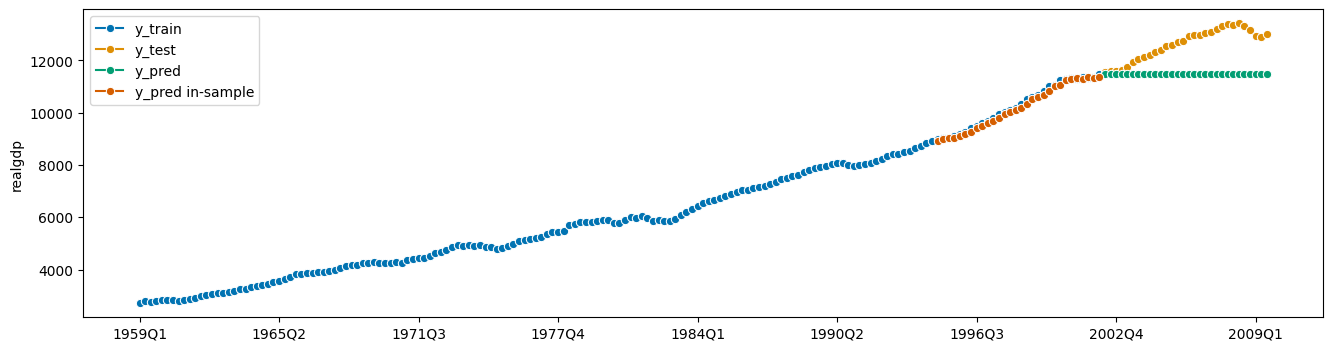

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
import seaborn as sns

#1 data
df = sm.datasets.macrodata.load_pandas()['data']

df['q_date'] = df.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
df['date'] = pd.PeriodIndex(df['q_date'], freq='Q').to_timestamp()
df = df.set_index('date').to_period("Q")

#creating lagged values for forecasting with exogenous variables
df.loc[:, 'realinv_lagged'] = df.loc[:, 'realinv'].shift()
df[['realinv_lagged']] = df[['realinv_lagged']].fillna(method='backfill')

#2 univariate without X
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster


y = df['realgdp']
y_train, y_test = temporal_train_test_split(y, test_size=30)

forecaster = NaiveForecaster()
forecaster.fit(y_train)
#y_pred = forecaster.predict(fh=1) #forecasting one step ahead
y_pred = forecaster.predict(fh=[1, 2]) #forecasting two step ahead
print(y_pred)

#3 ForecastingHorizon chk
#specific data points
fh_abs = ForecastingHorizon(y_test.index, is_relative=False)  
print(f"Absolute FH: {fh_abs}")

#last point in the training series
cutoff = pd.Period("2002-01-01", freq="Q")
fh_rel = fh_abs.to_relative(cutoff)
print(f"\nRelative FH ahead: {list(fh_rel)}")

#29 quarters after the last point in the training series
cutoff_insample = pd.Period("2009-09-01", freq="Q")
fh_rel_insample = fh_abs.to_relative(cutoff_insample)
print(f"\nRelative FH in-sample: {list(fh_rel_insample)}")

forecaster = NaiveForecaster().fit(y_train)
y_pred_rel = forecaster.predict(fh=fh_rel)
y_pred_rel_insample = forecaster.predict(fh=fh_rel_insample)

plot_series(y_train, y_test, y_pred_rel, y_pred_rel_insample, 
            labels=["y_train", "y_test", "y_pred", "y_pred in-sample"]);



In [17]:
df
y_train
y_test.index

PeriodIndex(['2002Q2', '2002Q3', '2002Q4', '2003Q1', '2003Q2', '2003Q3',
             '2003Q4', '2004Q1', '2004Q2', '2004Q3', '2004Q4', '2005Q1',
             '2005Q2', '2005Q3', '2005Q4', '2006Q1', '2006Q2', '2006Q3',
             '2006Q4', '2007Q1', '2007Q2', '2007Q3', '2007Q4', '2008Q1',
             '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date')

In [ ]:
#v1.0 testing ts_forecast_models

def date_parser(date_str):
    from dateutil import parser
    
    dt = parser.parse(date_str)
    
    date = dt.date()
    year = dt.year
    month = dt.month
    hour = dt.hour
    minute = dt.minute
    weekday = dt.weekday()
    time = dt.time()
    return date


def ts_forecast_period_index(ts, periods=36, freq="M"):
    
    last_index = ts.index.to_series().astype(str).values.tolist()[-1]
    
    from sktime.forecasting.base import ForecastingHorizon
    fh = ForecastingHorizon(
        pd.PeriodIndex(pd.date_range(last_index, periods=periods, freq=freq)), is_relative=False
    )
    fh = fh[1:] # drop last index
    return fh

#custom mape calculated on predictions with a ceiling
# def custom_mape(y: np.array, y_pred: np.array, multioutput: str):
#     metrics_dict = {'uniform_average': np.mean(np.abs((y - np.ceil(y_pred)) / y)),
#                     'raw_values': np.abs((y - np.ceil(y_pred)) / y)}
#     try:
#         return metrics_dict[multioutput]
#     except KeyError:
#         print("multioutput not specified correctly - "
#               "pick `raw_values` or `uniform_average`")

def custom_mape(y: np.array, y_pred: np.array):
    metrics_dict = {'score_mean': np.mean(np.abs((y - np.ceil(y_pred)) / y)),
                    'score_row': np.abs((y - np.ceil(y_pred)) / y)}
    return metrics_dict

def ts_forecast_models(data, target_col, index_col, feat_list, model_type, nested_params=None, train_type='TrainTest',
        forecast_period=5, freq='M', regression_window=10, cv_type='ExpandingWindowSplitter',
        pt_type='ForecastingRandomizedSearch', transformer_type='BoxCoxTransformer', PlotSeries=True):
    '''
    v1.1 Jan20,2023: added regression_window, cv_type, pt_type, forecasting score/CrossValidation
    v1.0 Jan18,2023: initial version
    ts_type: UniVariate/MultiVariate
    train_type: TrainTest/CrossValidation/GridSearch/RandomizedSearch
    freq: used to set index whern data is as df with date col
    regression_window: when regression models are used
    cv_type: used in cross_validation/GridSerach - ExpandingWindowSplitter/SlidingWindowSplitter
    pt_type: used in parameter tuning - ForecastingGridSearch/ForecastingRandomizedSearch
    
    Test issues
    Auto_Arima with cross_validation TypeError
    TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'float'>
    '''
    print('entry ts_forecast_models')
    
    #import libs
    import pandas as pd
    import numpy as np
    from sktime.forecasting.base import ForecastingHorizon
    from sktime.utils.plotting import plot_series
    from sktime.forecasting.compose import make_reduction
    from sktime.forecasting.model_selection import temporal_train_test_split
    
    print('#1 data chk/split and chk UniVariate/MultiVariate')
    print(f'data-typ:{type(data)}, data-shape:{data.shape}')
    if isinstance(data, pd.DataFrame):
        #set index
        #data[index_col] = pd.to_datetime(data[index_col]) #TBC
        if freq:
            #Note1: convert partial str date(yyyy-mm or yy-q) to complete date format(yyyy-mm-dd)
            data[index_col] = pd.PeriodIndex(data[index_col], freq=freq).to_timestamp()
            #Note2: convert complete date format(yyyy-mm-dd) to date index w.r.t freq (yyyyqq)
            data = data.set_index(index_col, drop=True).to_period(freq) #set index of 
        else:
            data.set_index(index_col, drop=True, inplace=True) # convert to series
            
            
        if feat_list:
            X = data[feat_list]
            y = data[target_col]
            y_train, y_valid, X_train, X_valid = temporal_train_test_split(y, X, test_size=30)
            ts_type = 'MultiVariate'
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, X_train:{X_train.shape}, X_valid:{X_valid.shape}')
        else:
            X = None
            y = data[target_col]
            y_train, y_valid = temporal_train_test_split(y, test_size=30)
            ts_type = 'UniVariate'
            print(f'df-srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
            
    elif isinstance(data, pd.Series):
        X = None
        y = data
        y_train, y_valid = temporal_train_test_split(y, test_size=30)
        ts_type = 'UniVariate'
        print(f'srs-y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    print('ts_type:', ts_type)
       
    print('target transformer')
    if transformer_type:
        if transformer_type == 'BoxCoxTransformer':
            from sktime.transformations.series.boxcox import BoxCoxTransformer
            transformer = BoxCoxTransformer(sp=4) #Box-Cox power transformation
        elif transformer_type == 'LogTransformer':
            from sktime.transformations.series.boxcox import LogTransformer
            transformer = LogTransformer()
        y_train = transformer.fit_transform(y_train)
        
    print('#create score dict')
    score_dict = {}
    score_dict['ts_type'] = ts_type
    score_dict['model_type'] = model_type
    
    print('#get ForecastingHorizon')
    fh_abs = ForecastingHorizon(y_valid.index, is_relative=False)
    print('fh_abs:',fh_abs) # y_valid index
    fh_re =[1,2,3] #next index forecast / not correct
    
    print(f'#executing:{model_type}')
    if model_type == 'NaiveForecaster':
        #Forecast based on naive assumptions about past trends continuing, supports univariate/multivariate
        from sktime.forecasting.naive import NaiveForecaster
        forecaster = NaiveForecaster()
    elif model_type == 'PolynomialTrend':
        #linear regression model with a 1st degree polynomial transformation of the feature.
        from sktime.forecasting.trend import PolynomialTrendForecaster
        forecaster = PolynomialTrendForecaster(degree=1)
    elif model_type == 'AutoArima':
        from sktime.forecasting.arima import AutoARIMA
        forecaster = AutoARIMA(sp=4)
    elif model_type == 'ThetaForecaster':
        #it's equivalent to simple exponential smoothing (SES) with drift/tested for seasonality
        from sktime.forecasting.theta import ThetaForecaster
        forecaster = ThetaForecaster()
        
    else:
        print(f'#executing Regression:{model_type}')
        if regression_window:
            forecaster = make_reduction(model_type, strategy="recursive", window_length= regression_window)
    
    print('#cv_type:', cv_type)
    from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter
    
    X_train = None if ts_type == 'UniVariate' else X_train # multivarite X_train will be used
    window_size = round(y_train.size/4) #TBC
    if cv_type == 'ExpandingWindowSplitter':
         #note: initial_window + fh shold be smaller than the length of y
        cv = ExpandingWindowSplitter(step_length=window_size, fh=list(range(1, window_size)), initial_window=window_size)
    elif cv_type == 'SlidingWindowSplitter':
        #note: initial_window must greater than `window_length`
        cv = SlidingWindowSplitter(initial_window=window_size*2, window_length=window_size)
        
        
    print('#train_type:',train_type, ts_type)
    print(f'y_train:{y_train.shape}, y_valid:{y_valid.shape}')
    if train_type == 'TrainTest':
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
            
        #score_dict update
        fs_score_dict = custom_mape(y_valid, y_pred)
        score_dict.update(fs_score_dict)
        score_dict['y_pred'] = y_pred
        
    elif train_type == 'CrossValidation':
        from sktime.forecasting.model_evaluation import evaluate
        pred_df = evaluate(forecaster=forecaster, X=X_train, y=y_train, cv=cv, strategy="refit", return_data=True)
        
        #score_dict update
        score_dict['pred_df'] = pred_df
        #y_pred TBC for PlotSeries
        
    elif train_type in ['GridSearch', 'RandomizedSearch']:
        from sktime.forecasting.model_selection import ForecastingGridSearchCV, ForecastingRandomizedSearchCV
        if train_type == 'GridSearch':
            forecaster = ForecastingGridSearchCV(forecaster, strategy="refit", cv=cv, param_grid=nested_params)
        elif train_type == 'RandomizedSearch':
            forecaster = ForecastingRandomizedSearchCV(forecaster, strategy="refit", cv=cv, 
                        param_distributions=nested_params, n_iter=1, random_state=42)
            
        if ts_type == 'UniVariate':
            forecaster.fit(y_train)
            y_pred = forecaster.predict(fh=fh_abs)
            #y_pred = forecaster.predict(np.arange(1, y_valid.size+1))
        elif ts_type == 'MultiVariate':
            print(f'X_train:{X_train.shape}, X_valid:{X_valid.shape}')
            forecaster.fit(y_train, X_train)
            y_pred = forecaster.predict(X=X_valid, fh=fh_abs)
        
        #score_dict update
        score_dict['y_pred'] = y_pred
    
    print('#performance_metrics - forecasting score')
    from sktime.performance_metrics.forecasting import make_forecasting_scorer
    
#     mape_changed = make_forecasting_scorer(func=custom_mape, multioutput = 'uniform_average')
#     mape_changed_per_row = make_forecasting_scorer(func=custom_mape, multioutput = 'raw_values')
#     mape_score = mape_changed(y_valid, y_pred)
#     mape_score_df = mape_changed_per_row(y_valid, y_pred)
        
    #PlotSeries = False # temp dueto train_type == 'CrossValidation'
    if PlotSeries:
        #if train_type == 'TrainTest':
        if train_type in ['TrainTest', 'GridSearch', 'RandomizedSearch']:
            print(f'df-y_train:{y_train.shape}, y_valid:{y_valid.shape}, y_pred:{y_pred.shape}')
            plot_series(y_train, y_valid, y_pred, labels=["y_train", "y_valid", "y_pred"]);
        elif train_type == 'CrossValidation':
            n_cv = cv_df.shape[0]
            plot_series(
                y, *[cv_df["y_pred"].iloc[x] for x in range(n_cv)],
                markers=["o", *["."]*n_cv],
                labels=["y_true"] + [f"cv: {x}" for x in range(n_cv)]
            );
        
    print('exit ts_forecast_models')
    return score_dict
        
import pandas as pd
import numpy as np

#1 univariate/series /done
# from sktime.datasets import load_airline
# data = load_airline()
# target_col = None
# index_col = None
# feat_list = None

#2 univariate/df / data issue
# data_path='D:\\timeseries\\'

# data = pd.read_csv(data_path+'shampoo-sales.csv')
# target_col = 'Sales'
# index_col = 'Month'
# feat_list = None
# data[index_col] = data[index_col].apply(lambda x:date_parser(x)) # convert date format

#3 univariate/df
# import statsmodels.api as sm
# data = sm.datasets.macrodata.load_pandas()['data']

# data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
#                                   + str(int(x['quarter'])), axis=1)
# target_col = 'realgdp'
# index_col = 'q_date'
# feat_list = None
# #train_type='TrainTest'
# train_type='CrossValidation'

#4 multivariate/df/done
import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas()['data']
data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
target_col = 'realgdp'
index_col = 'q_date'
feat_list = ['realgdp', 'realcons', 'realinv', 'realgovt'] 
freq='Q'
train_type_list = ['TrainTest', 'CrossValidation', 'GridSearch', 'RandomizedSearch']
train_type = train_type_list[2]
#cv_type = 'ExpandingWindowSplitter'
cv_type = 'SlidingWindowSplitter'
nested_params = {"window_length": list(range(2,21)), 
                 #"estimator__max_depth": list(range(5,16))
                }
param_grid = nested_params

#testing
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#regressor = GradientBoostingRegressor()
regressor = XGBRegressor()

model_list = ['PolynomialTrend','NaiveForecaster', 'AutoArima', 'ThetaForecaster', regressor]
model_type = model_list[4]

score_dict = ts_forecast_models(data, target_col, index_col, feat_list, model_type, nested_params=param_grid, train_type=train_type,
        forecast_period=5, freq=freq, regression_window=5, cv_type = cv_type, PlotSeries=True)
print('score_dict:', score_dict)

In [ ]:
gscv.best_params_

In [ ]:
# Multi-variate time series classification using a simple CNN/LSTM

#https://github.com/sktime/sktime/blob/main/examples/02a_classification_multivariate_cnn.ipynb

import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sktime.classification.deep_learning.cnn import CNNClassifier
from sktime.datasets import load_basic_motions

sns.set_style("whitegrid")

X_train, y_train = load_basic_motions(split="train", return_X_y=True)
X_test, y_test = load_basic_motions(split="test", return_X_y=True)
print(X_train.shape)
print(X_test.shape)
print(type(X_train.iloc[1, 1]))
X_train.head()

# The class labels
np.unique(y_train)

#Train a deep neural network classifier
network = CNNClassifier(n_epochs=200, verbose=True)
network.fit(X_train, y_train)
network.score(X_test, y_test)

#Grid Search
param_grid = {"kernel_size": [7, 9], "avg_pool_size": [3, 5]}
grid = GridSearchCV(network, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

#Train a LSTM-FCN
#https://github.com/sktime/sktime/blob/main/examples/02b_classification_multivariate_lstmfcn.ipynb

from sktime.classification.deep_learning.lstmfcn import LSTMFCNClassifier
network = LSTMFCNClassifier(n_epochs=200, verbose=0)
network.fit(X_train, y_train)
network.score(X_test, y_test)




In [ ]:
# sktime - feature_extraction
#https://github.com/sktime/sktime/blob/main/examples/feature_extraction_with_tsfresh.ipynb

#Feature extraction with tsfresh transformer
#!pip install --upgrade tsfresh

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sktime.datasets import load_arrow_head, load_basic_motions
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

#1 Univariate time series classification data
X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# tf = TsFreshTransformer()
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X_train)

#Using tsfresh with sktime
classifier = make_pipeline(
    TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False),
    RandomForestClassifier(),
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

#2 Multivariate time series classification data
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(X_train)

#Using tsfresh for forecasting
from sklearn.ensemble import RandomForestRegressor

from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split

y = load_airline()
y_train, y_test = temporal_train_test_split(y)

regressor = make_pipeline(
    TSFreshFeatureExtractor(show_warnings=False, disable_progressbar=True),
    RandomForestRegressor(),
)
forecaster = make_reduction(
    regressor, scitype="time-series-regressor", window_length=12
)
forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)

In [ ]:
#sktime-Probabilistic Forecasting

#https://github.com/sktime/sktime/blob/main/examples/01b_forecasting_proba.ipynb

from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA

# step 1: data specification
y = load_airline()
# step 2: specifying forecasting horizon
fh = [1, 2, 3]
# step 3: specifying the forecasting algorithm
forecaster = ARIMA()
# step 4: fitting the forecaster
forecaster.fit(y, fh=[1, 2, 3])
# step 5: querying predictions
y_pred = forecaster.predict()

# for probabilistic forecasting:
forecast_intervals = forecaster.predict_interval(coverage=0.9)
forecast_quantiles = forecaster.predict_quantiles(fh=None, X=None, alpha=[0.05, 0.95])
forecast_variance = forecaster.predict_var(fh=None, X=None, cov=False)
#forecast_distribution = forecaster.predict_proba(fh=None, X=None, marginal=True)

# does it support probabilistic predictions now?
forecaster.get_tag("capability:pred_int")

# from sktime.registry import all_estimators
# all_estimators(
#     "forecaster", filter_tags={"capability:pred_int": True}, as_dataframe=True
# )

In [ ]:
forecast_quantiles

In [ ]:
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

In [ ]:
#sktime pipeline component testing

from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import MinMaxScaler
from sktime.datasets import load_airline

from sktime.datasets import load_longley
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import ForecastingPipeline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.impute import Imputer
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.preprocessing import MinMaxScaler

#1 TabularToSeriesAdaptor-univariate
# y = load_airline()
# transformer = TabularToSeriesAdaptor(MinMaxScaler())
# y_hat = transformer.fit_transform(y)
# y

#https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.forecasting.compose.ForecastingPipeline.html

#2 ForecastingPipeline-string/estimator pairs/multivariate
# y, X = load_longley()
# y_train, _, X_train, X_test = temporal_train_test_split(y, X)
# fh = ForecastingHorizon(X_test.index, is_relative=False)

# pipe = ForecastingPipeline(steps=[
#     ("imputer", Imputer(method="mean")),
#     ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
#     ("forecaster", NaiveForecaster(strategy="drift")),
# ])
# pipe.fit(y_train, X_train)

# y_pred = pipe.predict(fh=fh, X=X_test)
# y_pred

#2 ForecastingPipeline-string/estimator pairs/uniivariate
y, X = load_longley()
X=None

pipe = ForecastingPipeline(steps=[
    ("imputer", Imputer(method="mean")),
    ("minmaxscaler", TabularToSeriesAdaptor(MinMaxScaler())),
    ("forecaster", NaiveForecaster(strategy="drift")),
])
pipe.fit(y, X)

y_pred = pipe.predict(fh=fh)
y_pred

#3 without strings
pipe = ForecastingPipeline([
    Imputer(method="mean"),
    TabularToSeriesAdaptor(MinMaxScaler()),
    NaiveForecaster(strategy="drift"),
])

#4a dunder method Note: * (= apply to y) has precedence over ** (= apply to X)
forecaster = NaiveForecaster(strategy="drift")
imputer = Imputer(method="mean")
pipe = (imputer * MinMaxScaler()) ** forecaster

#4b using the dunder method, alternative
pipe = imputer ** MinMaxScaler() ** forecaster


In [ ]:
# https://www.sktime.org/en/stable/get_started.html

#1 Time Series Classification
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# X, y = load_arrow_head()
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# classifier = TimeSeriesForestClassifier()
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# accuracy_score(y_test, y_pred)

#2 Time Series Clustering
from sklearn.model_selection import train_test_split
from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm
from sktime.datasets import load_arrow_head

X, y = load_arrow_head()
X_train, X_test, y_train, y_test = train_test_split(X, y)

k_means = TimeSeriesKMeans(n_clusters=5, init_algorithm="forgy", metric="dtw")
k_means.fit(X_train)
plot_cluster_algorithm(k_means, X_test, k_means.n_clusters)

#Time Series Annotation
from sktime.annotation.adapters import PyODAnnotator
from pyod.models.iforest import IForest
from sktime.datasets import load_airline
y = load_airline()
pyod_model = IForest()
pyod_sktime_annotator = PyODAnnotator(pyod_model)
pyod_sktime_annotator.fit(y)
annotated_series = pyod_sktime_annotator.predict(y)

In [ ]:
#multivariate VAR, VMA, VARMA, and VARMAX

# https://towardsdatascience.com/lets-forecast-your-time-series-using-classical-approaches-f84eb982212c
#1 VAR

# Import libraries
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# Generate a sample dataset with correlated variables
# data = list()
# for i in range(100):
#     v1 = i + random()
#     v2 = v1 + random()
#     row = [v1, v2]
#     data.append(row)

import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas()['data']
data['q_date'] = data.apply(lambda x: str(int(x['year'])) + '-Q' 
                                  + str(int(x['quarter'])), axis=1)
target_col = 'realgdp'
index_col = 'q_date'
feat_list = ['realgdp', 'realcons', 'realinv', 'realgovt'] 

X = data[feat_list]
y = data[target_col]

data1 = data [['realgdp', 'realcons', 'realinv', 'realgovt', 'realgdp']] # parallal forecasting

#1 VAR  
model = VAR(X)
model_fit = model.fit()
# make prediction
#yhat = model_fit.forecast(y, steps=1) #TBC

#2 VMA - generalized version of the moving average model, ‘p’ parameter as 0.
# model = VARMAX(X, order=(0, 1))
# model_fit = model.fit(disp=False)
# yhat = model_fit.forecast()

#3 VARMA - combination of VAR and VMA, requires ‘p’ and ‘q’ parameters
# model = VARMAX(X, order=(1, 1))
# model_fit = model.fit(disp=False)
# yhat = model_fit.forecast()

#4 SARIMA with Exogenous Variables (SARIMAX)
'''The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is
an extension of the SARIMA model.
Suitable for univariate time series with trend and/or seasonal components and exogenous variables.
'''
# data1 = X[0:100]
# data2 = X[100:]
# model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
# model_fit = model.fit(disp=False)
# # make prediction
# exog2 = [200 + random()]
# yhat = model_fit.predict(len(data1), len(data1), exog=[exog2])
#ValueError: The indices for endog and exog are not aligned

#5 VARMAX-extension of the VARMA model
#multivariate time series without trend and seasonal components with exogenous variables.

#model = VARMAX(data, exog=X, order=(1, 1))
# model_fit = model.fit(disp=False)
# data_exog2 = [[100]]
# yhat = model_fit.forecast(exog=data_exog2)
#ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#6 SimpleExpSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data = y
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

#7 Double Exponential Smoothing - seasonal=None
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data = y
model = ExponentialSmoothing(data, trend='add', seasonal=None, damped=True)
model_fit = model.fit()
yhat = model_fit.predict(len(data), len(data))

#8 Triple Exponential Smoothing - seasonal="add"
data = y
model = ExponentialSmoothing(data,trend="add", seasonal="add", seasonal_periods=12, damped=True)
model_fit = model.fit()
yhat = model_fit.predict(len(data), len(data))


In [ ]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml(
    "Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

df

In [ ]:
#https://medium.com/total-digital-factory/sktime-feature-importance-on-timeseriesforestclassifier-7cbf3d44e939

from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.pipeline import Pipeline

config = {
    "model_params": {
        "n_estimators": 5,
        "min_interval": 3,
    }
}

steps = [
  ('concatenate', ColumnConcatenator()),
  ('classify', TimeSeriesForestClassifier(**config['model_params']))
]
clf = Pipeline(steps)

# create normal df
time_series_dataframe = pd.DataFrame({
    "feature_0": [0., 0., 0., 1., 2., 3.],
    "feature_1": [10., 20., 30., 40., 50., 60.],
    "feature_2": [-4., -5., -6., -7., -8., -9.]
    },
    index=[
        "2022-01-01 00:00:00",
        "2022-01-01 01:00:00",
        "2022-01-01 02:00:00",
        "2022-01-01 03:00:00",
        "2022-01-01 04:00:00",
        "2022-01-01 05:00:00",
    ]
)

time_series_dataframe

# create windowed_chunk_time_series_dataframe
windowed_chunk_time_series_dataframe = pd.DataFrame({
    "dim_0": [
        pd.Series([0., 0., 0.]),
        pd.Series([1., 2., 3.])
    ],
    "dim_1": [
        pd.Series([10., 20., 30.]),
        pd.Series([40., 50., 60.])
    ],
    "dim_2": [
        pd.Series([-4., -5., -6.]),
        pd.Series([-7., -8., -9.])
    ],
},
    index=["frame_0", "frame_1"]
)


windowed_chunk_time_series_dataframe_label = pd.DataFrame({
        "y": [0, 1]
    },
    index=["frame_0", "frame_1"]
)

windowed_chunk_time_series_dataframe

#3 input_dataframe
input_dataframe = pd.DataFrame({
    "dim_0": [
        pd.Series([0., 0., 0.]),
        pd.Series([1., 2., 3.])
    ],
    "dim_1": [
        pd.Series([10., 20., 30.]),
        pd.Series([40., 50., 60.])
    ],
    "dim_2": [
        pd.Series([-4., -5., -6.]),
        pd.Series([-7., -8., -9.])
    ],
},
    index=["frame_0", "frame_1"]
)

input_dataframe

# ColumnConcatenator
concatenator = ColumnConcatenator()

output_dataframe = concatenator.fit_transform(input_dataframe)

expected_output_dataframe = pd.DataFrame({
    0: [
        pd.Series([0., 0., 0., 10., 20., 30., -4., -5., -6.]),
        pd.Series([1., 2., 3., 40., 50., 60., -7., -8., -9.])
    ]
},
    index=["frame_0", "frame_1"]
)
expected_output_dataframe.index.names = ["instances"]

pd.testing.assert_frame_equal(output_dataframe, expected_output_dataframe)

expected_output_dataframe

clf["classify"].fit(
    expected_output_dataframe, 
    windowed_chunk_time_series_dataframe_label.values.reshape(-1)
)
print(clf["classify"].intervals_)

In [ ]:
#testing Sktime transform time sequence to supervise - AutoARIMA
#https://mpatiparn-n.medium.com/xgboost-time-series-forcasting-with-sktime-ep-2-5a5525d902ab

def ts_forecast_period_index(ts, periods=36, freq="M"):
    
    last_index = ts.index.to_series().astype(str).values.tolist()[-1]
    
    from sktime.forecasting.base import ForecastingHorizon
    fh = ForecastingHorizon(
        pd.PeriodIndex(pd.date_range(last_index, periods=periods, freq=freq)), is_relative=False
    )
    fh = fh[1:] # drop last index
    return fh
    
#1 load the data- monthly - shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd
import numpy as np

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()
fh = ts_forecast_period_index(y, periods=36, freq="M")

#1 AutoARIMA
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)

forecaster.fit(y)
y_pred = forecaster.predict(fh)
#plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

#2 regression - transform the time series into tabular or panel data
from sktime.forecasting.compose import make_reduction
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

regressor = GradientBoostingRegressor()
forecaster = make_reduction(regressor, window_length=5, strategy="recursive")
forecaster.fit(y)
y_pred = forecaster.predict(fh)

#cross-validation
fh1 = ['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11']
fh2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
from sktime.forecasting.model_selection import ExpandingWindowSplitter
cv = ExpandingWindowSplitter(step_length=12, fh=fh2, initial_window=52)
#cv = ExpandingWindowSplitter(step_length=12, fh=fh1, initial_window=72)

window_length = 10
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, strategy="recursive", window_length= window_length)

results = evaluate(
    forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True
)
results

#GridSearchCV-ExpandingWindowSplitter
from sktime.forecasting.model_selection import (ForecastingGridSearchCV, SlidingWindowSplitter)

param_grid = {
    'estimator__max_depth': [3, 6, 10, 15],
    'estimator__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'estimator__colsample_bytree': np.arange(0.4, 1.0),
    'estimator__n_estimators': [100, 500, 1000]
}

regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster = make_reduction(regressor, strategy="recursive")

cv = ExpandingWindowSplitter(step_length=12, fh=fh2, initial_window=52)
gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=param_grid, strategy="refit"
)

gscv
#GridSearchCV-SlidingWindowSplitter

cv = SlidingWindowSplitter(
        initial_window=int(len(y_train) * 0.5),
        start_with_window=True,
    )
# cv = SlidingWindowSplitter(fh = 3, window_length=3, initial_window=3)
# cv = ExpandingWindowSplitter(fh = 1, window_length=5, initial_window=2, start_with_window=True)
MidForecasterGSCV = ForecastingGridSearchCV(MidForecaster, cv=cv, param_grid=param_grid, scoring=MetricFunctionWrapper(mean_absolute_error))

In [ ]:
#diff models of sktime
from sktime.forecasting.base import ForecastingHorizon

data_path='D:\\timeseries\\'
import pandas as pd
import numpy as np

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()

fh_abs = ForecastingHorizon(y.index, is_relative=False)

from sktime.forecasting.trend import PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
forecaster.fit(y)

y_pred = forecaster.predict(fh=[1,2,3])
#y_pred = forecaster.predict(fh=fh_abs)
y_pred


In [ ]:
# from sktime.registry import all_estimators

# all_estimators(
#     "forecaster", as_dataframe=True, return_tags=["scitype:y", "requires-fh-in-fit"]
# )

In [ ]:
from dateutil import parser
dt1 = parser.parse("06 April, 2019")
dt2 = parser.parse("1960-08") #year month
dt3 = parser.parse("1960") #year
dt4 = parser.parse("3-12") #year

date = dt1.date()
year = dt1.year
month = dt1.month
hour = dt1.hour
minute = dt1.minute
weekday = dt1.weekday()
time = dt1.time()

print(f'dt1:{dt1}, dt2:{dt2}, dt3:{dt3}, dt4:{dt4}')
print(f'year:{year}, month:{month}, date:{date}, hour:{hour}, minute:{minute}, weekday:{weekday}, time:{time}')

In [ ]:
y_pred.shape, y_test.shape

In [ ]:
import numpy as np
y = y_test
y_hat = y_pred
np.mean(np.abs((y - np.ceil(y_hat)) / y))

np.abs((y - np.ceil(y_hat)) / y)

metrics_dict = {'uniform_average': np.mean(np.abs((y - np.ceil(y_hat)) / y)),
                    'raw_values': np.abs((y - np.ceil(y_hat)) / y)}
multioutput = 'uniform_average'
metrics_dict[multioutput]
metrics_dict

In [ ]:
#pipeline testing

#https://www.kaggle.com/code/forward469/sktime-baseline
model = Pipeline(steps=[
    ('polyfeatures', PolynomialFeatures(degree=1)),
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=2, p=1)),
])

LowForecaster = ReducedForecaster(model, scitype="regressor", strategy='direct', window_length=3)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# regressor = KNeighborsRegressor(n_neighbors=3)

# forecaster = make_reduction(regressor, strategy="recursive", window_length= window_length)
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)

from sktime.forecasting.compose import make_reduction
from sktime.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
y = load_airline()
regressor = GradientBoostingRegressor()
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
forecaster.fit(y)

y_pred = forecaster.predict(fh=[1,2,3])

y_pred

In [ ]:
#testing Sktime transform time sequence to supervise - AutoARIMA

#https://mpatiparn-n.medium.com/xgboost-time-series-forcasting-with-sktime-ep-2-5a5525d902ab

#1 load the data- monthly - shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd
import numpy as np

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()

#!pip install sktime
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)

last_index = y.index.to_series().astype(str).values.tolist()[-1]

from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh = fh[1:] # drop last index

forecaster.fit(y)
y_pred = forecaster.predict(fh)
#plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

y_pred

In [ ]:
#date features
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour

In [ ]:
#testing sktime

#https://www.sktime.org/en/stable/examples/01_forecasting.html
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

y = load_airline()

# plotting for visualization
plot_series(y)



In [ ]:
y

In [ ]:
#testing Smoothing methods for Time Series Forecasting and ACF/PACF

#https://medium.com/@manuktiwary/time-series-forecasting-concepts-and-methods-with-implementation-examples-edaf40dceee5
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#1 load the data- monthly - shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd
import numpy as np

df = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
value_col = 'Sales'
target_col = 'Target'
df = df.set_index(index_col)

# Restructure the data
df[target_col] = df[value_col].shift(-1).values
df.dropna(inplace=True)

y = df[target_col]
X = df.drop(target_col, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
      train_test_split(X, y, test_size = 0.12, \
                       random_state = 0, shuffle=False)

import statsmodels.api as sm
acf = sm.tsa.acf(X)
pacf = sm.tsa.pacf(X)

#plot the ACF/PACF
# sm.graphics.tsa.plot_acf(acf)
# sm.graphics.tsa.plot_pacf(pacf)

#2 load the data- yearly
data = sm.datasets.sunspots.load_pandas().data
index_col = 'YEAR'
value_col = 'SUNACTIVITY'
target_col = 'Target'
data = data.set_index(index_col)

#1 Simple moving average (SMA)
window_size=3
smoothed_data = data.rolling(window_size).mean()

#2 Weighted moving average (WMA)
weights = np.arange(1, 6) # weights for ast 5 time steps
window_size=5
smoothed_data = data.rolling(window_size).apply(lambda x: np.average(x, weights=weights))

#3. Exponential smoothing
alpha = 0.5
smoothed_data = data.ewm(alpha).mean()

#4 Holt’s Exponential Smoothing
model = sm.tsa.Holt(data).fit()
forecast = model.forecast(steps=10)

#5 Holt-Winters exponential smoothing
model = ExponentialSmoothing(data[value_col], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(steps=10)
forecast

In [ ]:
#TS as supervised problem

def tt_cv_pt_regression(X, y, X_train, y_train, X_valid, y_valid, X_test, y_test, model, param_grid, cv=2, train_type='TrainTest',
            test_type='XYZ'):
    '''
    ver 1.4 Oct01,2022 : updated rmse/mse
    ver 1.3 Sep14,2022 : added train_type / test_type/pred_df check
    ver 1.2 Sep12,2022 : added tt/cv/pt optionl
    ver 1.1 : added mape_mean
    ver 1.0
    '''
    print('entry tt_cv_pt_regression')
    from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, \
            mean_squared_log_error
    from sklearn.metrics import median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
    
    from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
    from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

    from numpy import argmax, sqrt
    import numpy as np
    import pandas as pd
    from imblearn.pipeline import Pipeline, make_pipeline
    #from sklearn.pipeline import Pipeline, make_pipeline
    
    #1 get model name
    if type(model) == Pipeline:
        model_name = model['model'].__class__.__name__
        print('if model: pipeline:', model_name)
    else:
        model_name = model.__class__.__name__
        print('else model: direct model:', model_name)  
        
    print('model/pipeline start:', model)
    #2 n_features
    if X_train is not None:
        n_features = X_train.shape[1]
    else:
        n_features = X.shape[1]
    
    #3 call train_test / cross_val / grid_search
    if train_type == 'TrainTest':
        print('2 entry TrainTest')
        print(f'X_train:{X_train.shape}, y_train:{y_train.shape}, X:{X.shape}, y:{y.shape}')
        model.fit(X_train, y_train)
        
        trained_model = model # if pipeline passed then it's trained_pipeline
        
        y_preds = model.predict(X_valid)
        y_actual = y_valid
        #print(f'y_actual:{set(y_actual)}')
        print('2 exit TrainTest')

    elif (train_type == 'CrossValid') | (train_type == 'NestedCV'):
        print('2 entry CrossValid / NestedCV')
        # default cv does not work; ValueError: Cannot predict random effects from singular covariance structure.
        trained_model = model #for prediction
        X_valid = X
        y_actual = y
        #print('model-CrossValid:', model)
        y_preds = cross_val_predict(model, X, y, cv=cv)
        print('2 exit CrossValid')
        
    elif (train_type == 'RandomSearch') | (train_type == 'GridSearch'):
        print('2 entry GridSearch')
        if train_type == 'GridSearch':
            estimator = GridSearchCV(model, param_grid=param_grid, cv=cv)
        else:
            estimator = RandomizedSearchCV(model, param_distributions=param_grid, cv=cv)
            
        print('get_params:', estimator.get_params().keys())
        # estimator.fit(X, y)
        estimator.fit(X_train, y_train)
        best_score = estimator.best_score_
        best_params = estimator.best_params_
        best_estimator = estimator.best_estimator_
        cv_results = estimator.cv_results_
        gs_result_df = pd.DataFrame(cv_results)
        
        trained_model = best_estimator #for prediction
        y_preds = best_estimator.predict(X_valid)
        y_actual = y_valid
        #print(f'y_actual:{set(y_actual)}')
        print('2 exit GridSearch')
        
    #4 predcit df
    pred_df = X_valid.copy()
    if isinstance(pred_df, pd.DataFrame):
        pass
    elif isinstance(pred_df, (np.ndarray, np.generic)):
        pred_df = pd.DataFrame(pred_df)
        
    pred_df['target'] = y_actual
    pred_df['pred'] = y_preds
    
    #5 score
    #mse = round(mean_squared_error(y_actual, y_preds), 2) # does not work for nan
    #rmse = round(sqrt(mse), 2)
    
    mse = round(mean_squared_error(y_actual, y_preds, squared=True), 2)
    rmse = round(mean_squared_error(y_actual, y_preds, squared=False), 2)
    
    mae = round(mean_absolute_error(y_actual, y_preds), 2)
    mdae = round(median_absolute_error(y_actual, y_preds), 2)
    mape_mean = round(mean_absolute_percentage_error(y_actual, y_preds), 2)
    error_max = round(max_error(y_actual, y_preds), 2)
    #error_log = round(mean_squared_log_error(y_actual, y_preds), 2)

    variance_score = round(explained_variance_score(y_actual, y_preds), 2)
    r2_score = round(r2_score(y_actual, y_preds), 2)
    Adjst_R_Squre = round(1 - ((1 - r2_score) * (len(y_actual) - 1) / (len(y_actual) - n_features - 1)), 2)
    
    #5 save result_val in dict
    report_dict = dict()
    # report_dict['tweedie_deviance_mean'] = tweedie_deviance_mean
    report_dict['model'] = model_name
    report_dict['test_type'] = test_type
    report_dict['train_type'] = train_type
    
    report_dict['mse'] = mse # does not work for nan
    report_dict['rmse_mean'] = rmse
    report_dict['mae_mean'] = mae
    report_dict['mae_median'] = mdae
    #report_dict['mape_mean'] = mape_mean
    report_dict['error_max'] = error_max
    #report_dict['error_log'] = error_log

    report_dict['variance_score'] = variance_score
    report_dict['r2_score'] = r2_score
    report_dict['Adjst_R_Squre'] = Adjst_R_Squre

    print('exit tt_cv_pt_regression')
    return report_dict, pred_df, trained_model

#1 data shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd

df = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
target_shift_col = 'Sales'
target_col = 'Target'
df = df.set_index(index_col)

# Restructure the data
df[target_col] = df[target_shift_col].shift(-1).values
df.dropna(inplace=True)

y = df[target_col]
X = df.drop(target_col, axis=1)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
      train_test_split(X, y, test_size = 0.12, \
                       random_state = 0, shuffle=False)
import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train)

predictions_xgb = reg.predict(X_test)

model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
param_grid = {}
report_dict, pred_df, trained_model = tt_cv_pt_regression(X, y, X_train, y_train, X_valid, y_valid,
        X_test, y_test, model, param_grid, cv=2, train_type='TrainTest', test_type='XYZ')

report_dict

In [ ]:
#https://www.kaggle.com/code/tanmay111999/gdmbdf-ar-ma-arma-arima-sarima#Dataset-Information
def SARIMA_regression(train_ts=None, test_ts=None, n_lags=7, trend='c', seasonal=False, p=2,
           d=3, q=4, s=2, ts_type='AR'):
    '''
    ver 1.2 Jan13,2023 TBA simple exponential smoothing, Holt-Winters exponential smoothing
    ver 1.1 Jan12,2023 added prediction and score
    ver 1.0 Jan10,2023 initial ver
    
    ARIMA model is a combination of 3 models :(p,d,q) is known as the order of the ARIMA model.
    AR (p) : Auto Regressive
    I (d) : Integrated
    MA (q) : Moving Average

    p : Number of auto regressive terms.
    d : Number of differencing orders required to make the time series stationary.
    q : Number of lagged forecast errors in the prediction equation.
    s : seasonality used in SARIMA
    '''
    
    data = train_ts.copy()
    print('entry SARIMA_regression')
    from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, \
            mean_squared_log_error
    from sklearn.metrics import median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
    
    from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
    from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

    from numpy import argmax, sqrt
    import numpy as np
    import pandas as pd
    
    from statsmodels.tsa.ar_model import AutoReg
    from statsmodels.tsa.arima.model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    
    if ts_type=='AR':
        d=0; q=0
        model = ARIMA(endog = data, order = (p, d, q))
    elif ts_type=='AR1':
        model = AutoReg(endog = data, \
                   lags = n_lags, \
                   trend=trend, \
                   seasonal = seasonal, \
                   exog = None, \
                   hold_back = None, \
                   period = None, \
                   missing = 'none')
        
    elif ts_type=='MA':
        p=0; d=0
        model = ARIMA(endog = data, order=(p, d, q))
        
    elif ts_type=='ARMA':
        d=0
        model = ARIMA(endog = data, order=(p, d, q))
    
    elif ts_type=='ARIMA':
        model = ARIMA(endog = data, order=(p, d, q))
        
    elif ts_type=='SARIMA':
        #p=0; d=0; q=0
        #model = SARIMAX(endog = data, order = (p, d, q), seasonal_order=(p, d, q, s))
        model = SARIMAX(endog = data, order = (0, 0, 0), seasonal_order=(p, d, q, s))
        
    elif ts_type=='ExponentialSmoothing':
        from statsmodels.tsa.holtwinters import ExponentialSmoothing
        model = ExponentialSmoothing(endog=data, \
                                        trend='add', \
                                        seasonal='add', \
                                        seasonal_periods=12, \
                                        damped=True)
    elif ts_type=='AutoArima':
        from pmdarima.arima import auto_arima
        model = auto_arima(y = data, seasonal=False, stepwise=True)
        
    elif ts_type=='prophet':
        #TBC
        #from fbprophet import Prophet
        model = Prophet( \
                           interval_width = 0.95, \
                           growth = "linear", \
                           daily_seasonality = False, \
                           weekly_seasonality = False, \
                           yearly_seasonality = False, \
                           seasonality_mode = "multiplicative")
        
    if ts_type in ['ExponentialSmoothing']:
        model_fit = model.fit()
        trained_model = model_fit
        predictions = model_fit.predict(start=len(train_ts), end=len(train_ts)+len(test_ts)-1)
    elif ts_type in ['AutoArima']:
        trained_model = model
        predictions = model.predict(n_periods=len(test_ts), X=None, return_conf_int=False, alpha=0.05)#array
        predictions = pd.Series(predictions) # array to series
    else:
        model_fit = model.fit()
        trained_model = model_fit
        predictions = model_fit.predict(start=len(train_ts), end=len(train_ts)+len(test_ts)-1, dynamic=False)
    
    predictions.name = "Predictions"
    
    # predcit df
    pred_df = test_ts.copy()
    if isinstance(pred_df, pd.DataFrame):
        pred_df['pred'] = predictions.values
    elif isinstance(pred_df, (np.ndarray, np.generic, pd.Series)):
        pred_df.name = 'target'
        pred_df = pd.DataFrame(pred_df)
        pred_df['pred'] = predictions.values
        
    #5 score
    #mse = round(mean_squared_error(y_actual, y_preds), 2) # does not work for nan
    #rmse = round(sqrt(mse), 2)
    y_actual = test_ts.values
    y_preds = predictions.values
    n_features = 1
    
    mse = round(mean_squared_error(y_actual, y_preds, squared=True), 2)
    rmse = round(mean_squared_error(y_actual, y_preds, squared=False), 2)
    
    mae = round(mean_absolute_error(y_actual, y_preds), 2)
    mdae = round(median_absolute_error(y_actual, y_preds), 2)
    mape_mean = round(mean_absolute_percentage_error(y_actual, y_preds), 2)
    error_max = round(max_error(y_actual, y_preds), 2)
    #error_log = round(mean_squared_log_error(y_actual, y_preds), 2)

    variance_score = round(explained_variance_score(y_actual, y_preds), 2)
    r2_score = round(r2_score(y_actual, y_preds), 2)
    Adjst_R_Squre = round(1 - ((1 - r2_score) * (len(y_actual) - 1) / (len(y_actual) - n_features - 1)), 2)
    
    #5 save result_val in dict
    report_dict = dict()
    # report_dict['tweedie_deviance_mean'] = tweedie_deviance_mean
    report_dict['model'] = ts_type
    report_dict['test_type'] = 'test_type' #TBC
    report_dict['train_type'] = 'train_type' #TBC
    
    report_dict['mse'] = mse # does not work for nan
    report_dict['rmse_mean'] = rmse
    report_dict['mae_mean'] = mae
    report_dict['mae_median'] = mdae
    #report_dict['mape_mean'] = mape_mean
    report_dict['error_max'] = error_max
    #report_dict['error_log'] = error_log

    report_dict['variance_score'] = variance_score
    report_dict['r2_score'] = r2_score
    report_dict['Adjst_R_Squre'] = Adjst_R_Squre

    print('exit SARIMA_regression')
    return report_dict, pred_df, trained_model
    

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#1 data shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd

df = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
target_col = 'Sales'
df = df.set_index(index_col)
target_ts = df[target_col]
total_data = df[target_col].count()

#split = (df.shape[0] * 0.90).astype(np.int32)
split = (total_data * 0.90).astype(np.int32)
train = df[0:split] 
test = df[split:]
df1 = test.copy(deep = True)

test = test['Sales']
report_dict, pred_df, trained_model = SARIMA_regression(train_ts=train, test_ts=test, n_lags=7, trend='c', seasonal=False,
                   p=2, d=3, q=4, s=2, ts_type='ExponentialSmoothing')
report_dict

In [ ]:
#testing ARIMA

#1 data shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd

df = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
target_col = 'Sales'
df = df.set_index(index_col)
target_ts = df[target_col]
total_data = df[target_col].count()

#split = (df.shape[0] * 0.90).astype(np.int32)
split = (total_data * 0.90).astype(np.int32)
train = df[0:split] 
test = df[split:]
df1 = test.copy(deep = True)

p=2; d=1; q=1; s=2;
#model = SARIMAX(endog = data, order = (0, 0, 0), seasonal_order=(p, d, q, s))
model = ARIMA(endog = train, order=(p, d, q))
model_fit = model.fit()
train_ts = train; test_ts=test
#predictions = model_fit.predict(start=len(train_ts), end=len(train_ts)+len(test_ts)-1, dynamic=False)
#predictions = model_fit.forecast(steps=4) # same as above

# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# model = ExponentialSmoothing(endog=data, \
#                                 trend='add', \
#                                 seasonal='add', \
#                                 seasonal_periods=12, \
#                                 damped=True)
#predictions = model_fit.predict(start=len(train_ts), end=len(train_ts)+len(test_ts)-1)
#predictions = model_fit.forecast(steps=4)


# from pmdarima.arima import auto_arima
# model = auto_arima(y = data, seasonal=False, stepwise=True)

# predictions = model.predict(n_periods=len(test_ts), \
#                                         X=None, \
#                                         return_conf_int=False, \
#                                         alpha=0.05)

predictions

In [ ]:
dir(model_fit)
model_fit.forecast(steps=4)

In [ ]:
data = np.array(['a', 'b', 'c', 'd', 'e'])
data

In [21]:
def date_features(df, fldname, drop_date=True, drop_year=True, state_col='ca'):
    '''
    1.3 : commented df1[targ_pre + '_' + 'Is_weekend'] / TBC
    1.2 : added target col / rename to target
    1.1 : added holiday option
    ver1.0: initial
    
    '''
    import re
    import datetime
    import numpy as np
    from datetime import datetime as dt

    #import holidays
    #holidays = holidays.UnitedStates(state=state)
    df1 = df.copy()

    fld = df1[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df1[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
              'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
              'Is_year_start'):
        df1[targ_pre + '_' + n] = getattr(fld.dt, n.lower())
    #df1[targ_pre + '_' + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9

    df1['months_old'] = df1[fldname].apply(lambda x: (dt.today().year - x.year) * 12 + (dt.today().month - x.month))

    # add other features
    # df1[targ_pre+'_'+'Is_holiday'] = df1[fldname].apply(lambda x: 1 if holidays.get(x) is not None else 0)
#     df1[targ_pre + '_' + 'Is_holiday'] = df1.apply(
#         lambda x: 1 if holidays.UnitedStates(state=x[state_col]).get(x[fldname]) is not None else 0, axis=1)
    
    df1[targ_pre + '_' + 'quarter'] = df1[fldname].dt.quarter
    df1[targ_pre + '_' + 'semester'] = np.where(df1[targ_pre + '_' + 'quarter'].isin([1, 2]), 1, 2)
    
    # convert binary features
    start_end_cols = [d for d in df1.columns if 'start' in d] + [d for d in df1.columns if 'end' in d]
    bl_map = {True: 1, False: 0}

    for col in start_end_cols:
        df1[col] = df1[col].map(bl_map)

    if drop_date: df1.drop(fldname, axis=1, inplace=True)
    if drop_year: df1.drop(fldname + '_' + 'Year', axis=1, inplace=True)
        
    df1[targ_pre + '_' + 'Is_weekend'] = np.where(df1[targ_pre + '_' + 'Dayofweek'].isin([5, 6]), 1, 0) # shifted from top
    return df1

#1 data shampoo-sales.csv
data_path='D:\\timeseries\\'
import pandas as pd

df = pd.read_csv(data_path+'shampoo-sales.csv')
index_col = 'Month'
target_col = 'Sales'

fldname = index_col
date_col_to_force = index_col
#df_date = date_features(df, fldname, drop_date=True, drop_year=True, state_col='ca')

#pd.to_datetime(date_col_to_force, errors = 'coerce')

df[index_col] = df[index_col].apply(lambda x: pd.Period(x, freq='ms'))

#df_date = date_features(df, fldname, drop_date=True, drop_year=True, state_col='ca')

fld = df[fldname]
#pd.to_datetime(fld, infer_datetime_format=True)

#pd.to_datetime(fld, errors = 'coerce')

#df[fldname]

In [ ]:
import pandas as pd
BOMoffset = pd.tseries.offsets.MonthBegin()
BOMoffset

pd.Timestamp.min,  pd.Timestamp.max

import pandas as pd

#create date range
some_dates = ['1/1/2000', '1/1/2150', '1/1/2300']

#convert date range to datetime and automatically coerce errors
some_dates = pd.to_datetime(some_dates, errors = 'coerce')

#show datetimes
print(some_dates)


In [ ]:
history_f = [x for x in df['Sales']]
f1 = []
for t in range(len(df1)):
    
    model = ARIMA(history_f, order = (0,0,0)) # AR
    model = ARIMA(history_f, order = (0,0,0)) # MA
    model = ARIMA(history_f,order = (0,0,0)) # ARMA
    model = ARIMA(history_f, order = (0,1,0)) # ARIMA
    #model = sm.tsa.statespace.SARIMAX(history_f,order = (0,1,0),seasonal_order = (0,1,0,12)) # SARIMA
    model_fit = model.fit()
    
    output = model_fit.forecast()[0]
    
    history_f.append(output)
    f1.append(output)

df1['forecast'] = 0
for i in range(len(f1)):
    df1.iloc[i, 1] = f1[i]

df1

In [ ]:
#https://cprosenjit.medium.com/10-time-series-forecasting-methods-we-should-know-291037d2e285

data_path='D:\\timeseries\\'
import pandas as pd

dataset = pd.read_csv(data_path+'shampoo-sales.csv')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

total_data = dataset["Month"].count()
split = (total_data * 0.90).astype(np.int32)

train = dataset[0:split] 
test = dataset[split:]
plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Train Test Split")
plt.show()


print('\n #1. Naïve Approach')
'''
1. Naïve Approach
This is one of the simplest methods. It says that the forecast for any period equals the last observed value.
If the time series data contain seasonality, it’ll be better to take forecasts equal to the value from last season. 
'''
predictions_nv = test.copy()
# Copy the last observed Sales from training data
predictions_nv["Predictions"] = train.tail(1).iloc[0]["Sales"]
print (predictions_nv)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Sales"], \
                               predictions_nv["Predictions"]))
print("Naive Mean Square Error (RMSE): %.3f" % rmse)

plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.plot(predictions_nv.Month, predictions_nv.Predictions, label='Prediction')
plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Predictions by Naive model")
plt.show()


print('\n #2 AR Model')
'''
2. AR (AutoRegressive)
Autoregressive AR-X(p) model follows linear regression. It makes one prediction at a time and feed the output back
into the model. Here, p specifies the order of the model e.g, AR(1) i.e. first-order Autoregression model.
The output variable depends linearly on its previous values (called lags or orders) at previous time steps i.e.
regression with self-values. The lag length must be specified when creating the model.
'''
from statsmodels.tsa.ar_model import AutoReg
model_ag = AutoReg(endog = train["Sales"], \
                   lags = 7, \
                   trend='c', \
                   seasonal = False, \
                   exog = None, \
                   hold_back = None, \
                   period = None, \
                   missing = 'none')
# endog: dependent variable, response variable or y (endogenous)
# exog: independent variable, explanatory variable or x (exogenous)
# lags: the no. of lags to include in the model
#       [1, 4] will only include lags 1 and 4 
#       while lags=4 will include lags 1, 2, 3, and 4
# trend: trend to include in the model
#        {‘n’, ‘c’, ‘t’, ‘ct’}
#        ‘n’ - No trend.
#        ‘c’ - Constant only.
#        ‘t’ - Time trend only.
#        ‘ct’ - Constant and time trend.
# seasonal: whether to include seasonal dummies in the model
fit_ag = model_ag.fit()
print("Coefficients:\n%s" % fit_ag.params)

predictions = fit_ag.predict(start=len(train), \
                             end=len(train)+len(test)-1, \
                             dynamic=False)
predictions.name = "Predictions"
result  = pd.concat([test, predictions], axis=1).reindex(test.index)
print (result)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Sales"], predictions))
print("AR - Root Mean Square Error (RMSE): %.3f" % rmse)

plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.plot(result.Month, result.Predictions, label='Prediction')
plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Predictions by AutoRegressive (AR) model")
plt.show()


print('\n 3. MA (Moving Average)')
'''
Moving Average process is an approach to model univariate time series. This is used to remove any seasonal trend in time series
to allow us to see any trend in data. This is represented as MA(q) where q specifies the order of the model
e.g., MA(2) i.e. second-order Moving Average model.
'''
from statsmodels.tsa.arima.model import ARIMA
model_ma = ARIMA(endog = train["Sales"], \
                   order=(0, 0, 2))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_ma = model_ma.fit()
print("Coefficients:\n%s" % fit_ma.params)

predictions_ma = fit_ma.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)
predictions_ma.name = "Predictions"
result_ma  = pd.concat([test, predictions_ma], axis=1).reindex(test.index)
print (result_ma)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_ma = sqrt(mean_squared_error(test["Sales"], predictions_ma))
print("MA - Root Mean Square Error (RMSE): %.3f" % rmse_ma)


print('\n 4. AutoRegressive Moving Average (ARMA)')
'''
ARMA process combines both AutoRegression (AR) and Moving Average (MA) models. This is usually referred to as the
ARMA(p,q) model where p is the order of the AR part and q is the order of the MA part.
'''
from statsmodels.tsa.arima.model import ARIMA
model_arma = ARIMA(endog = train["Sales"], \
                   order = (2, 0, 1))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arma = model_arma.fit()
print("Coefficients:\n%s" % fit_arma.params)

predictions_arma = fit_arma.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)
predictions_arma.name = "Predictions"
result_arma  = pd.concat([test, predictions_arma], axis=1).reindex(test.index)
print (result_arma)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arma = sqrt(mean_squared_error(test["Sales"], predictions_arma))
print("ARMA - Root Mean Square Error (RMSE): %.3f" % rmse_arma)


print('\n 5. AutoRegressive Integrated Moving Average (ARIMA)')
'''ARIMA model has three components:
(i) Auto regressive component, AR(p) i.e. linear regression on its previous values or lags(p).
(ii) Integrated component (I) indicates that the data have been replaced with the difference
    between the current observation and the previous time step.
(iii) Moving average, MA(q) i.e. consider moving average with order of q.
This model is represented as ARIMA(p, d, q) where p, d and q specifies the order of the AR(p), I(d) and MA(q)
        models respectively.'''

from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(endog = train["Sales"], \
                   order = (1, 1, 1))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
fit_arima = model_arima.fit()
print("Coefficients:\n%s" % fit_arima.params)

predictions_arima = fit_arima.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)
predictions_arima.name = "Predictions"
result_arima  = pd.concat([test, predictions_arima], axis=1).reindex(test.index)
print (result_arima)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(test["Sales"], predictions_arima))
print("ARIMA - Root Mean Square Error (RMSE): %.3f" % rmse_arima)


print('\n 6. Seasonal AutoRegressive Integrated Moving Average (SARIMA)')
'''SARIMA extends the ARIMA model with the ability to perform the same AR, I, and MA modeling at the seasonal level.
Seasonal ARIMA models are denoted as ARIMA(p,d,q)(P,D,Q)m, where m refers to the number of periods in each season and
P, D, Q (uppercase) refer to the autoregressive, differencing, and moving average terms for the seasonal part of the
ARIMA model respectively.'''

from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarima = SARIMAX(endog = train["Sales"], \
                        order = (1, 1, 1), \
                        seasonal_order=(0, 0, 0, 0))
# endog: dependent variable, response variable or y (endogenous)
# order: order of the model for the autoregressive, 
#        differences & moving average components.
# seasonal_order: (P,D,Q,s) order of the seasonal component of 
#     the model for the AR parameters, differences, 
#     MA parameters, and periodicity. s is the periodicity 
#     (number of periods in season), often it is 4 for 
#     quarterly data or 12 for monthly data (default, no 
#     seasonal effect).
fit_sarima = model_sarima.fit()
print("Coefficients:\n%s" % fit_sarima.params)

predictions_sarima = fit_sarima.predict(start = len(train), \
                                end = len(train)+len(test)-1, \
                                dynamic = False)
predictions_sarima.name = "Predictions"
result_sarima  = pd.concat([test, predictions_sarima], axis=1) \
                   .reindex(test.index)
print (result_sarima)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_sarima = sqrt(mean_squared_error(test["Sales"], \
                                      predictions_sarima))
print("SARIMA - Root Mean Square Error (RMSE): %.3f" % rmse_sarima)


print('\n 7. Auto ARIMA')
'''Automatically discover the optimal order for an ARIMA model. The auto-ARIMA process seeks to identify the most
optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the
commonly-used R function, forecast::auto.arima
Pmdarima wraps statsmodels under the hood. This can be installed from PyPI.'''

from pmdarima.arima import auto_arima
model_aarima = auto_arima (y = train["Sales"], \
                           seasonal=False, \
                           stepwise=True)
# seasonal : default=True, whether to fit 
#            a seasonal ARIMA.
# stepwise : default=True, the auto_arima 
#            function has two modes: stepwise 
#            & parallelized (slower)

predictions_aarima = model_aarima.predict(n_periods=test["Month"].size, \
                                        X=None, \
                                        return_conf_int=False, \
                                        alpha=0.05)
predictions_aarimaDf = pd.DataFrame({'Predictions': \
                                     predictions_aarima})
result_aarima = pd.concat([test.reset_index(drop=True), \
                           predictions_aarimaDf], axis=1)
print (result_aarima)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_aarima = sqrt(mean_squared_error(test["Sales"], \
                                      predictions_aarima))
print("Auto ARIMA - Root Mean Square Error (RMSE): %.3f" % rmse_aarima)


print('\n 8. Prophet')
'''Prophet is a time series forecasting procedure developed by Facebook. This can handle the following scenarios:
hourly, daily, or weekly observations with at least a few months (preferably a year) of history
strong multiple “human-scale” seasonalities: day of week and time of year
important holidays that occur at irregular intervals that are known in advance (e.g. the Super Bowl)
a reasonable number of missing observations or large outliers
historical trend changes, for instance due to product launches or logging changes
trends that are non-linear growth curves, where a trend hits a natural limit or saturates
The input to Prophet is always a dataframe with two columns: ds (datestamp, either YYYY-MM-DD or YYYY-MM-DD HH:MM:SS formats) and y (numeric, represents the measurement we wish to forecast).
Prophet can be installed from CRAN and PyPI.'''

from fbprophet import Prophet
# instantiate the model and set parameters
model_fb = Prophet( \
                   interval_width = 0.95, \
                   growth = "linear", \
                   daily_seasonality = False, \
                   weekly_seasonality = False, \
                   yearly_seasonality = False, \
                   seasonality_mode = "multiplicative"
)
train_fb = train.copy()
train_fb.columns = ["y", "ds"]
# fit the model to historical data
model_fb.fit(train_fb)

future_pd = model_fb.make_future_dataframe(
    periods = 6,
    freq = 'm',
    include_history=True
)
# predict over the dataset
predictions_fb = model_fb.predict(future_pd)

predict_fig = model_fb.plot(predictions_fb, \
                            xlabel='Month', \
                            ylabel='Sales')


print('\n 9. XGBoost')
'''
XGBoost (Extreme Gradient Boosting) is an implementation of gradient boosting for classification and regression problems.
This can be used for time series forecasting by restructuring the input dataset to look like a supervised learning problem.'''

dataXGB = dataset.copy()
# Restructure the data
dataXGB["Target"] = dataXGB.Sales.shift(-1)
# Drop the last null column because of shifting
dataXGB.dropna(inplace=True)
# Extract features & labels
X = dataXGB.iloc[:,0:1].values
y = dataXGB.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size = 0.12, \
                       random_state = 0, shuffle=False)
import xgboost
reg = xgboost.XGBRegressor(objective='reg:squarederror', \
                           n_estimators=1000)
reg.fit(X_train, y_train)

predictions_xgb = reg.predict(X_test)
predictions_xgb = pd.DataFrame({'Predictions': \
                                     predictions_xgb})
result_xgb = pd.concat( \
                       [dataXGB.tail(len(X_test)) \
                               .reset_index(drop=True), \
                        predictions_xgb], axis=1)
print (result_xgb)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_xgb = sqrt(mean_squared_error(y_test, predictions_xgb))
print("XGBoost - Root Mean Square Error (RMSE): %.3f" % rmse_xgb)


print('#\n 9. TBATS')
'''
BATS and TBATS are time series forecasting algorithms and work well with multiple seasonal periods.
TBATS is preferred where seasonality is complex. TBATS is the acronym for:
Trigonometric seasonality
Box-Cox transformation
ARMA error
Trend
Seasonal components
'''

from tbats import TBATS
# /databricks/python/bin/pip install tbats==1.1.0
model_tbats = TBATS(seasonal_periods=(12, 28),\
              use_arma_errors=False,\
              use_box_cox=False,\
              n_jobs=1,\
              use_trend=None,\
              use_damped_trend=None)\
          .fit(train.Sales)

predictions_tbats = model_tbats.forecast(steps=4)
predictions_tbatsDF = pd.DataFrame()
predictions_tbatsDF["Predictions"] = predictions_tbats.tolist()
result_tbats = pd.concat([test.reset_index(drop=True), \
                           predictions_tbatsDF], axis=1)
print (result_tbats)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_tbats = sqrt(mean_squared_error(test["Sales"], \
                                      predictions_tbatsDF))
print("TBATS - Root Mean Square Error (RMSE): %.3f" % rmse_tbats)

plt.figure(figsize=(12,8))
plt.plot(train.Month, train.Sales, label='Train')
plt.plot(test.Month, test.Sales, label='Test')
plt.plot(test.Month, predictions_tbatsDF.Predictions, label='Prediction')
plt.xticks(dataset["Month"], dataset["Month"], rotation='vertical')
plt.legend(loc='best')
plt.title("Predictions by TBATS model")
plt.show()


print('\n 10. ETS')
'''ETS (Error, Trend, Seasonality) are exponential smoothing state space models (a general family of forecasting models)
for univariate time series analysis. Unlike the simple moving average where the past observations are weighted equally,
exponential functions are used in ETS models to assign exponentially decreasing weights over time.
In this blog we’ll use statsmodels library for python implementation. statsmodels implements all combinations of additive &
multiplicative error model, additive & multiplicative trend, possibly dampened — additive & multiplicative seasonality.
Refer here for the available models. Here, we’ll use the Holt-Winters’ seasonal method which can incorporate a trend and
a seasonal component.'''

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(endog=train["Sales"], \
                                trend='add', \
                                seasonal='add', \
                                seasonal_periods=12, \
                                damped=True)
# Parameters
# endog : The time series to model.
# trend : Type of trend component (optional); 
#         options: "add", "mul", "additive", 
#                  "multiplicative", None
# seasonal : Type of seasonal component (optional); 
#         options: "add", "mul", "additive", 
#                  "multiplicative", None
# damped_trend : Should the trend component 
#                be damped (optional)

fit_es = model_es.fit(optimized=True, \
                      use_boxcox=False, \
                      remove_bias=False)
predictions_es = fit_es.predict(start=test.index[0], \
                                end=test.index[-1])
predictions_es.name = "Predictions"
result_es  = pd.concat([test, predictions_es], axis=1) \
                   .reindex(test.index)
print (result_es)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_es = sqrt(mean_squared_error(test["Sales"], \
                                      predictions_es))
print("Exponential Smoothing - Root Mean Square Error (RMSE): %.3f" % rmse_es)



In [ ]:
def evaluate_arima_model(train, test, order, maxlags=8, ic='aic'):
    # feature Scaling
    stdsc = StandardScaler()
    train_std = stdsc.fit_transform(train.values.reshape(-1, 1))
    test_std = stdsc.transform(test.values.reshape(-1, 1))
    # prepare training dataset
    history = [x for x in train_std]
    # make predictions
    predictions = list()
    # rolling forecasts
    for t in range(len(test_std)):
        # predict
        model = ARIMA(history, order=order)
        model_fit = model.fit(maxlags=maxlags, ic=ic, disp=0)
        yhat = model_fit.forecast()[0]
        # invert transformed prediction
        predictions.append(yhat)
        # observation
        history.append(test_std[t])
    # inverse transform
    predictions = stdsc.inverse_transform(np.array(predictions).reshape((-1)))
    # calculate mse
    mse = mean_squared_error(test, predictions)
    return predictions, mse

def evaluate_arima_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    pdq = list(itertools.product(p_values, d_values, q_values))
    for order in pdq:
        try:
            predictions, mse = evaluate_arima_model(train, test, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print('Model(%s) mse=%.3f' % (order,mse))
        except:
            continue
    print('Best Model(%s) mse=%.3f' % (best_cfg, best_score)) 
    return best_cfg

def predict_arima_model(train, period, order, maxlags=8, ic='aic'):
    # Feature Scaling
    stdsc = StandardScaler()
    train_std = stdsc.fit_transform(train.values.reshape(-1, 1))
    # fit model
    model = ARIMA(train_std, order=order)
    model_fit = model.fit(maxlags=maxlags, ic=ic, disp=0)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + period -1, typ='levels')
    # inverse transform
    yhat = stdsc.inverse_transform(np.array(yhat).flatten())
    return yhat

model_name='AR Model'
# evaluate parameters
p_values = range(1, 4)
d_values = [0]
q_values = [0]

model_name='MA Model'
# evaluate parameters
p_values = [0]
d_values = [0]
q_values = range(1, 4)

model_name='ARMA Model'
# evaluate parameters
p_values = range(0, 1, 2)
d_values = [0]
q_values = range(0, 1, 2)

model_name='ARIMA Model'
# evaluate parameters
p_values = [1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(1, 3)

